In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [10]:
review = pd.read_json('../data/user_reviews.json', orient='split')
print(review)

ValueError: Expected object or value

In [2]:
games = pd.concat([pd.read_csv('../data/steam_games_cleaned_1.csv'), pd.read_csv('../data/steam_games_cleaned_2.csv'), pd.read_csv('../data/steam_games_cleaned_3.csv')], axis=0)
print(games.shape)
games.head()

(56733, 506)


appid                       name   genre         developer publisher  \
0     10             Counter-Strike  Action             Valve     Valve   
1     20      Team Fortress Classic  Action             Valve     Valve   
2     30              Day of Defeat  Action             Valve     Valve   
3     40         Deathmatch Classic  Action             Valve     Valve   
4     50  Half-Life: Opposing Force  Action  Gearbox Software     Valve   

                  owners  average_forever  median_forever  pos_rating_pct  \
0  10,000,000-20,000,000            11666             244        0.974693   
1    2,000,000-5,000,000               91              18        0.857002   
2   5,000,000-10,000,000              403              26        0.900055   
3   5,000,000-10,000,000               33               6        0.816689   
4   5,000,000-10,000,000              322             127        0.951749   

   total_ratings  price                                          languages  \
0         189081   9.99  English, French, German, Italian, Spanish - Sp...   
1           6105   4.99  English, French, German, Italian, Spanish - Sp...   
2           5423   4.99  English, French, German, Italian, Spanish - Spain   
3           2193   4.99  English, French, German, Italian, Spanish - Sp...   
4          13119   4.99                    English, French, German, Korean   

                                                tags  languages_Arabic  \
0  Action, FPS, Multiplayer, Shooter, Classic, Te...                 0   
1  Action, FPS, Multiplayer, Classic, Hero Shoote...                 0   
2  FPS, World War II, Multiplayer, Shooter, Actio...                 0   
3  Action, FPS, Classic, Multiplayer, Shooter, Fi...                 0   
4  FPS, Action, Classic, Sci-fi, Singleplayer, Sh...                 0   

   languages_Bulgarian  languages_Czech  languages_Danish  languages_Dutch  \
0                    0                0                 0                0   
1                    0                0                 0                0   
2                    0                0                 0                0   
3                    0                0                 0                0   
4                    0                0                 0                0   

   languages_English  languages_Finnish  languages_French  languages_German  \
0                  1                  0                 1                 1   
1                  1                  0                 1                 1   
2                  1                  0                 1                 1   
3                  1                  0                 1                 1   
4                  1                  0                 1                 1   

   languages_Greek  languages_Hungarian  languages_Italian  \
0                0                    0                  1   
1                0                    0                  1   
2                0                    0                  1   
3                0                    0                  1   
4                0                    0                  0   

   languages_Japanese  languages_Korean  languages_Norwegian  \
0                   0                 1                    0   
1                   0                 1                    0   
2                   0                 0                    0   
3                   0                 1                    0   
4                   0                 1                    0   

   languages_Not supported  languages_Polish  languages_Portuguese  \
0                        0                 0                     0   
1                        0                 0                     0   
2                        0                 0                     0   
3                        0                 0                     0   
4                        0                 0                     0   

   languages_Romanian  languages_Russian  languages_

In [3]:
games.isna().sum().sum()

np.int64(8456)

In [4]:
def generate_top_values(series, xlabel = '', ylabel = '', title = '', x_rot = 0, max_bars = 15):
    #visualization color pallete
    primary_background_color = '#171a21'
    secondary_background_color = '#1b2838'
    bar_color = '#66c0f4'
    secondary_bar_color = '#2a475e'
    text_color = '#c7d5e0'
    
    x_vals = series.value_counts().sort_values(ascending=False).index
    y_vals = series.value_counts().sort_values(ascending=False).values
    max_val = min(max_bars, len(x_vals))
    
    fig = plt.figure(figsize=(20,12))
    fig.patch.set_facecolor(secondary_background_color)

    ax = fig.add_subplot(1,1,1)
    ax.set_facecolor(primary_background_color)
    ax.bar(x_vals[:max_val], y_vals[:max_val], color = bar_color)


    plt.xticks(rotation = x_rot, color=text_color)
    plt.xlabel(xlabel, color=text_color, fontdict = {'fontsize': 20})
    plt.yticks(color=text_color)
    plt.ylabel(ylabel, color=text_color, fontdict = {'fontsize': 20})
    plt.title(title, color=text_color, fontdict = {'fontsize': 28});

In [5]:
def generate_hist(series, xlabel = '', ylabel = '', title = '', x_rot = 0):
    #visualization color pallete
    primary_background_color = '#171a21'
    secondary_background_color = '#1b2838'
    bar_color = '#66c0f4'
    secondary_bar_color = '#2a475e'
    text_color = '#c7d5e0'
    
    fig = plt.figure(figsize=(20,12))
    fig.patch.set_facecolor(secondary_background_color)

    ax = fig.add_subplot(1,1,1)
    ax.set_facecolor(primary_background_color)
    ax.hist(series, color = bar_color)


    plt.xticks(rotation = x_rot, color=text_color)
    plt.xlabel(xlabel, color=text_color, fontdict = {'fontsize': 20})
    plt.yticks(color=text_color)
    plt.ylabel(ylabel, color=text_color, fontdict = {'fontsize': 20})
    plt.title(title, color=text_color, fontdict = {'fontsize': 28});

In [6]:
games['owners'].value_counts().sort_values(ascending=False)

owners
0-20,000                   42094
20,000-50,000               5979
50,000-100,000              2993
100,000-200,000             2103
200,000-500,000             1865
500,000-1,000,000            812
1,000,000-2,000,000          457
2,000,000-5,000,000          298
5,000,000-10,000,000          75
10,000,000-20,000,000         37
20,000,000-50,000,000         16
50,000,000-100,000,000         3
100,000,000-200,000,000        1
Name: count, dtype: int64

In [7]:
#visualization color pallete
primary_background_color = '#171a21'
secondary_background_color = '#1b2838'
bar_color = '#66c0f4'
secondary_bar_color = '#2a475e'
text_color = '#c7d5e0'

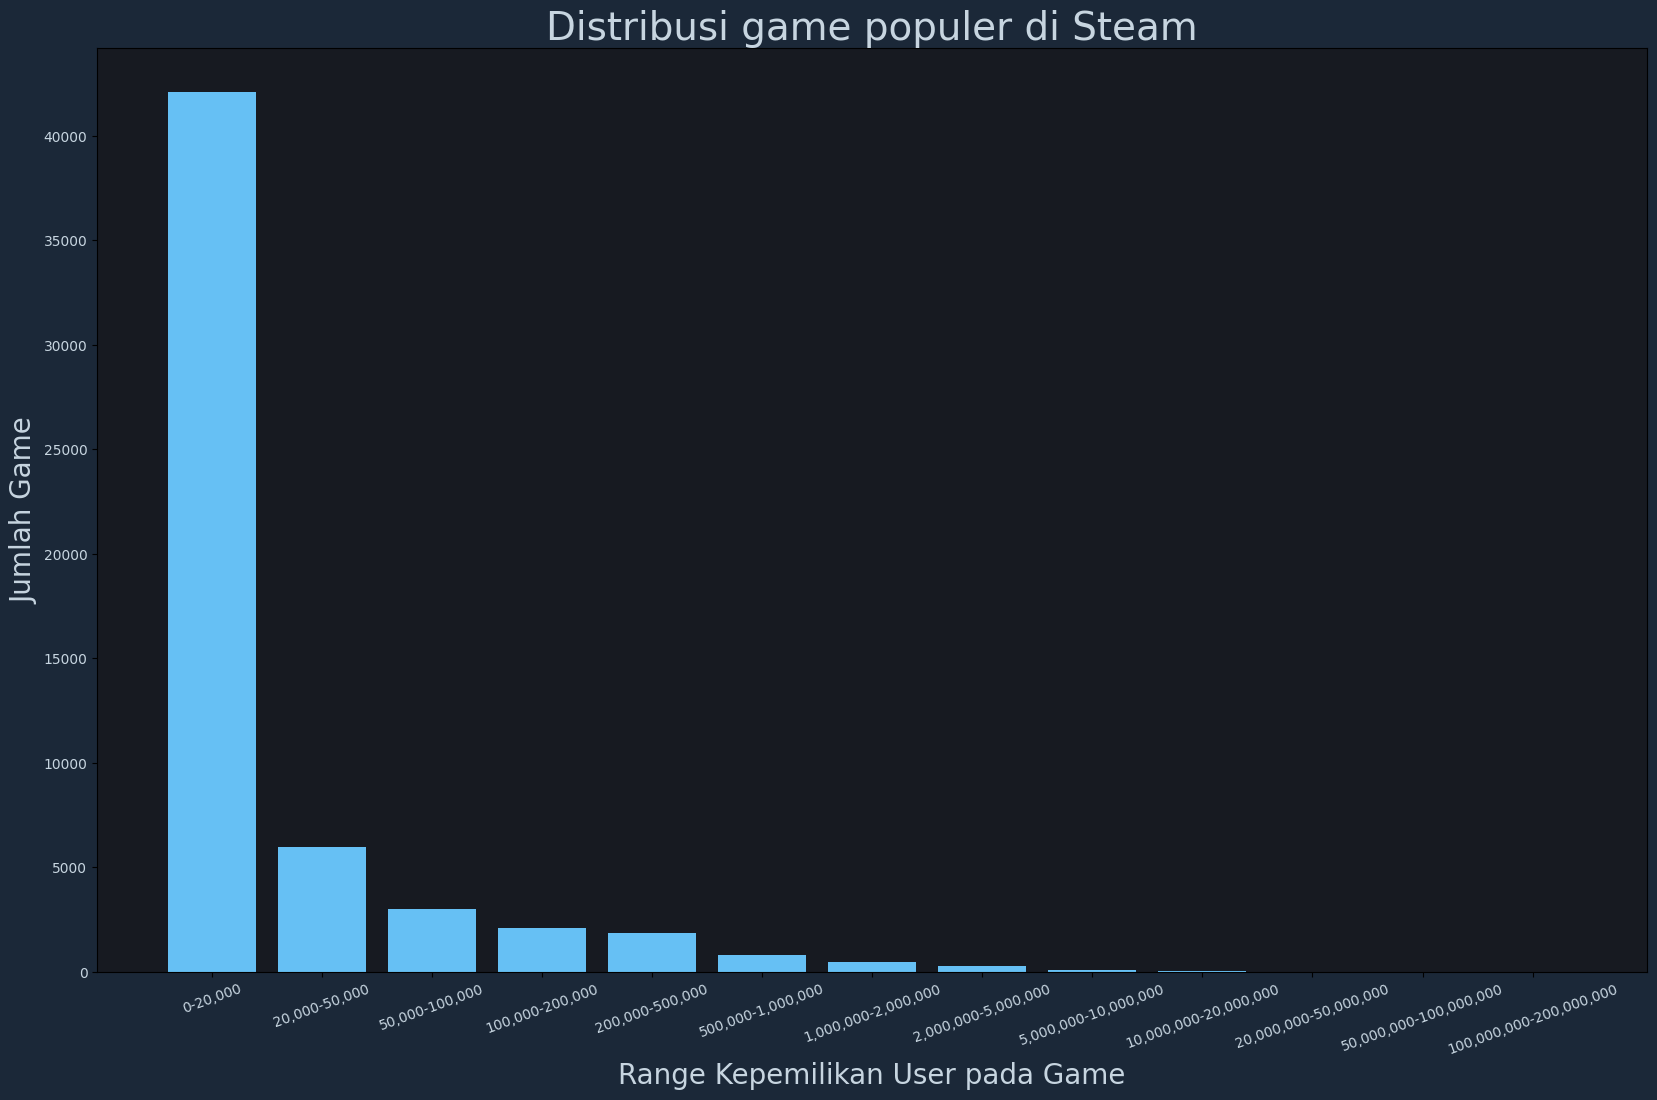

In [8]:
generate_top_values(games['owners'], xlabel = 'Range Kepemilikan User pada Game', ylabel = 'Jumlah Game', title = 'Distribusi game populer di Steam', x_rot = 20)
plt.savefig('../slide_images/popularity_dist.png')

In [9]:
# Game dengan kepemilikan user terbanyak
games[games['owners'] == '100,000,000-200,000,000']

appid    name                           genre developer publisher  \
23    570  Dota 2  Action, Free to Play, Strategy     Valve     Valve   

                     owners  average_forever  median_forever  pos_rating_pct  \
23  100,000,000-200,000,000            35423            1051        0.837654   

    total_ratings  price                                          languages  \
23        1607911    0.0  English, Bulgarian, Czech, Danish, Dutch, Finn...   

                                                 tags  languages_Arabic  \
23  Free to Play, MOBA, Multiplayer, Strategy, e-s...                 0   

    languages_Bulgarian  languages_Czech  languages_Danish  languages_Dutch  \
23                    1                1                 1                1   

    languages_English  languages_Finnish  languages_French  languages_German  \
23                  1                  1                 1                 1   

    languages_Greek  languages_Hungarian  languages_Italian  \
23                1                    1                  1   

    languages_Japanese  languages_Korean  languages_Norwegian  \
23                   1                 1                    1   

    languages_Not supported  languages_Polish  languages_Portuguese  \
23                        0                 1                     1   

    languages_Romanian  languages_Russian  languages_Simplified Chinese  \
23                   1                  1                             1   

    languages_Slovakian  languages_Spanish  languages_Swedish  languages_Thai  \
23                    0                  1                  1               1   

    languages_Traditional Chinese  languages_Turkish  languages_Ukrainian  \
23                              1                  1                    1   

    languages_Vietnamese  genre_360 V  genre_Accounting  genre_Action  \
23                     0            0                 0             1   

    genre_Action Games  genre_Adventure  genre_Animation & Modeling  \
23                   0                0                           0   

    genre_Audio Production  genre_Casual  genre_Design & Illustration  \
23                       0             0                            0   

    genre_Documentary  genre_Early Access  genre_Education  genre_Episodic  \
23                  0                   0                0               0   

    genre_Free to Play  genre_Game Development  genre_Gore  genre_Indie  \
23                   1                       0           0            0   

    genre_Massively Multiplayer  genre_Movie  genre_Nudity  \
23                            0            0             0   

    genre_Photo Editing  genre_RPG  genre_Racing  genre_Sexual Content  \
23                    0          0             0                     0   

    genre_Short  genre_Simulation  genre_Software Training  genre_Sports  \
23            0                 0                        0             0   

    genre_Strategy  genre_Tutorial  genre_Utilities  genre_Video Production  \
23               1               0                0                       0   

    genre_Violent  genre_Web Publishing  1980s  1990's  2.5D   2D  2D Fighter  \
23              0                     0    0.0     0.0   0.0  0.0         0.0   

    2D Platformer  360 Video   3D  3D Fighter  3D Platformer  3D Vision  \
23            0.0        0.0  0.0         0.0            0.0        0.0   

    4 Player Local   4X  6DOF  8-bit Music  ATV  Abstract    Action  \
23             0.0  0.0   0.0          0.0  0.0       0.0  0.129804   

    Action RPG  Action RTS  Action Roguelike  Action-Adventure  Addictive  \
23     0.03869         0.0               0.0               0.0        0.0   

    Adventure  Agriculture  Aliens  Alternate History  Ambient  America  \
23        0.0          0.0     0.0                0.0      0.0      0.0   

    Animation & Modeling  Anime  Arcade  Archery  Arena Shooter  \
23                   0.0    0.0    

In [10]:
# top 20 developer dengan game terbanyak di steam
games['developer'].value_counts().sort_values(ascending=False)[:20]

developer
Choice of Games               135
Laush Dmitriy Sergeevich      104
Creobit                       102
KOEI TECMO GAMES CO., LTD.     92
Sokpop Collective              88
Boogygames Studios             86
Hosted Games                   76
Blender Games                  71
Elephant Games                 69
RewindApp                      62
Ripknot Systems                62
AMAX Interactive               59
Individual Software            59
Somer Games                    57
SEGA                           55
Eipix Entertainment            54
Nikita "Ghost_RUS"             51
William at Oxford              50
ImperiumGame                   45
Snkl Studio                    41
Name: count, dtype: int64

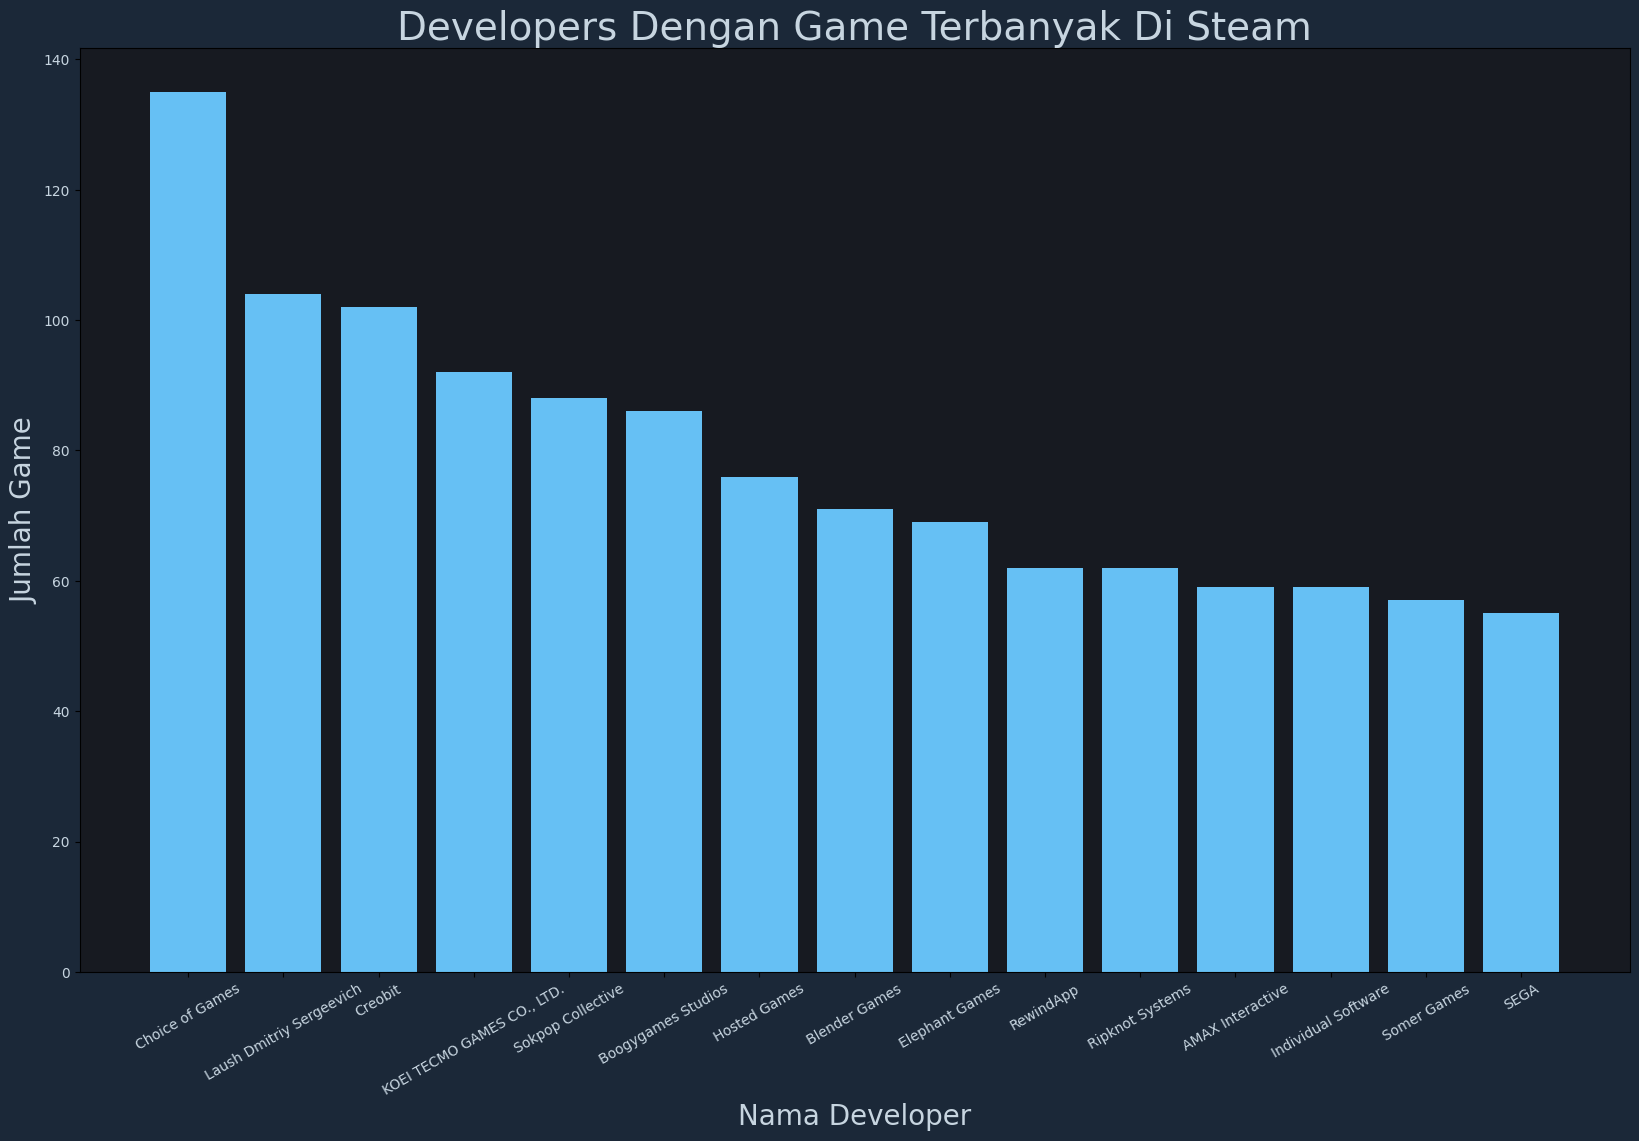

In [11]:
generate_top_values(games['developer'], xlabel = 'Nama Developer', ylabel = 'Jumlah Game', title = 'Developers dengan game terbanyak di Steam'.title(), x_rot = 30)
plt.savefig('../slide_images/top_devs.png')

In [12]:
valve_games = games[games['developer'] == 'Valve']
print(len(valve_games))
valve_games

33


appid                            name  \
0           10                  Counter-Strike   
1           20           Team Fortress Classic   
2           30                   Day of Defeat   
3           40              Deathmatch Classic   
5           60                        Ricochet   
6           70                       Half-Life   
7           80  Counter-Strike: Condition Zero   
8          100  Counter-Strike: Condition Zero   
10         220                     Half-Life 2   
11         240          Counter-Strike: Source   
12         280               Half-Life: Source   
13         300           Day of Defeat: Source   
14         320         Half-Life 2: Deathmatch   
15         340         Half-Life 2: Lost Coast   
16         360    Half-Life Deathmatch: Source   
17         380        Half-Life 2: Episode One   
18         400                          Portal   
19         420        Half-Life 2: Episode Two   
20         440                 Team Fortress 2   
21         500                     Left 4 Dead   
22         550                   Left 4 Dead 2   
23         570                          Dota 2   
24         620                        Portal 2   
25         630                     Alien Swarm   
26         659                        Portal 2   
44        1840                Source Filmmaker   
1084     52003                          Portal   
4279    323910        SteamVR Performance Test   
9029    450390                         The Lab   
12395   546560                 Half-Life: Alyx   
13834   583950                        Artifact   
13299  1046930                 Dota Underlords   
3591   1269260                Artifact Foundry   

                                        genre developer  publisher  \
0                                      Action     Valve      Valve   
1                                      Action     Valve      Valve   
2                                      Action     Valve      Valve   
3                                      Action     Valve      Valve   
5                                      Action     Valve      Valve   
6                                      Action     Valve      Valve   
7                                      Action     Valve      Valve   
8                                      Action     Valve      Valve   
10                                     Action     Valve      Valve   
11                                     Action     Valve      Valve   
12                                     Action     Valve      Valve   
13                                     Action     Valve      Valve   
14                                     Action     Valve      Valve   
15                                     Action     Valve      Valve   
16                                     Action     Valve      Valve   
17                                     Action     Valve      Valve   
18                                     Action     Valve      Valve   
19                                     Action     Valve      Valve   
20                       Action, Free to Play     Valve      Valve   
21                                     Action     Valve      Valve   
22                                     Action     Valve      Valve   
23             Action, Free to Play, Strategy     Valve      Valve   
24                          Action, Adventure     Valve      Valve   
25                                     Action     Valve      Valve   
26                          Action, Adventure     Valve      Valve   
44     Animation & Modeling, Video Production     Valve      Valve   
1084                                   Action     Valve      Valve   
4279                                Utilities     Valve  DNVR Prod   
9029                             Free to Play     Valve      Valve   
12395                       Action, Adventure     Valve      Valve   
13834                                Strategy     Valve      Valve   
13299          Casual, Free to Play, Strategy     Valve      Valve  

In [13]:
# top 20 publishers dengan game terbanyak di steam
games['publisher'].value_counts().sort_values(ascending=False)[:20]

publisher
Big Fish Games                413
8floor                        160
Strategy First                156
SEGA                          140
Choice of Games               135
Square Enix                   134
Sekai Project                 131
Ubisoft                       125
HH-Games                      123
Laush Studio                  123
THQ Nordic                    117
Plug In Digital               115
1C Entertainment              109
Ziggurat                      107
Degica                        103
Slitherine Ltd.                99
Alawar Entertainment           98
KOEI TECMO GAMES CO., LTD.     93
Devolver Digital               93
Sokpop Collective              90
Name: count, dtype: int64

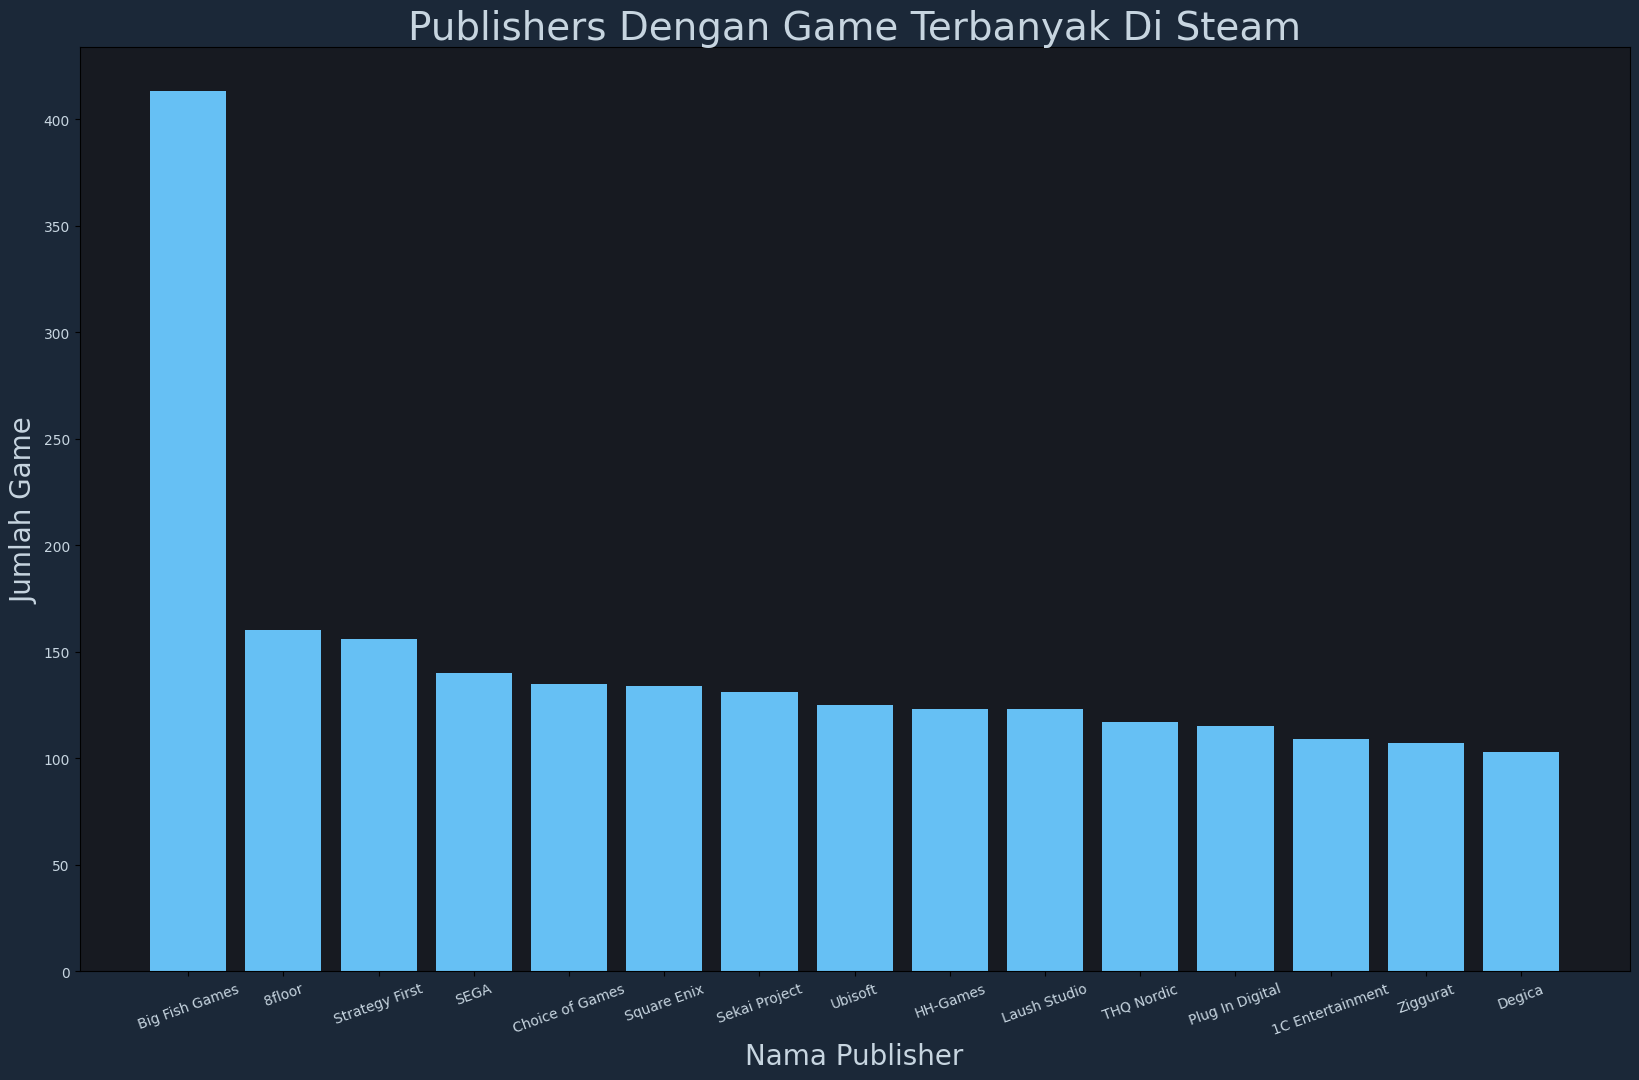

In [14]:
generate_top_values(games['publisher'], xlabel = 'Nama Publisher', ylabel = 'Jumlah Game', title = 'publishers dengan game terbanyak di Steam'.title(), x_rot = 20)
plt.savefig('../slide_images/top_pubs.png')

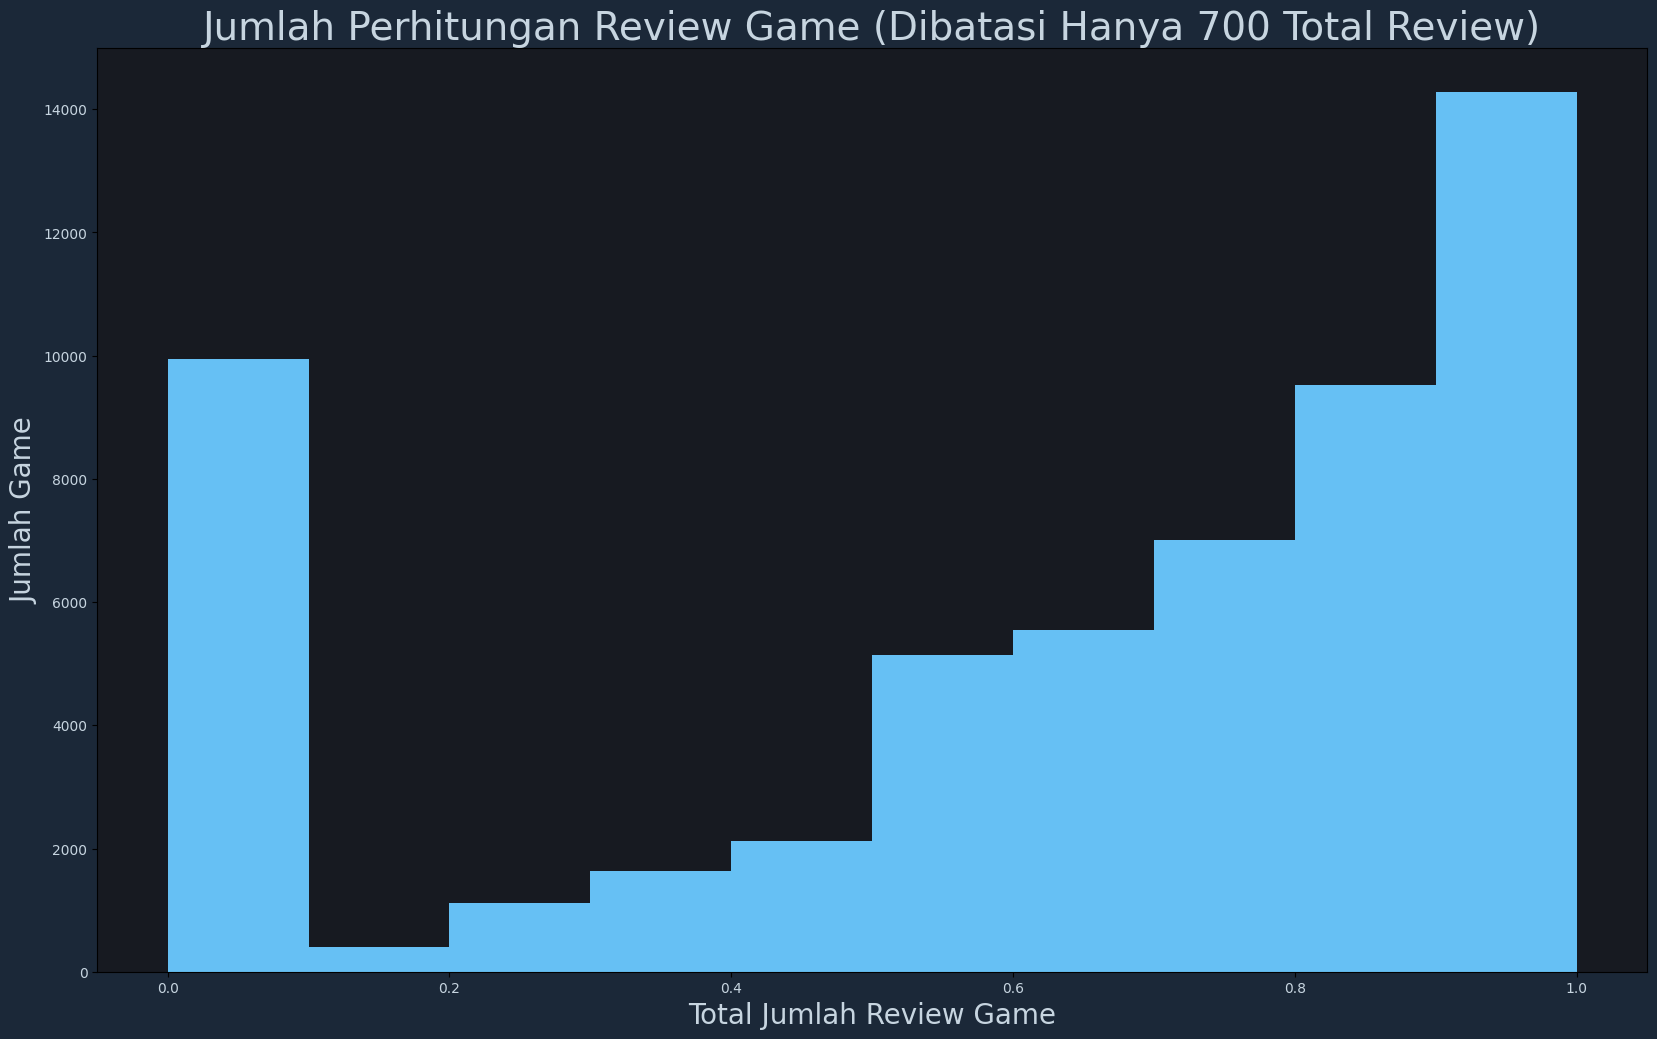

In [15]:
generate_hist(games['pos_rating_pct'], xlabel = 'Total Jumlah Review Game', ylabel = 'Jumlah Game', title = 'Jumlah perhitungan Review game (dibatasi hanya 700 total review)'.title())

In [16]:
len(games[games['total_ratings'] < 700]['total_ratings'])/len(games)

0.9005693335448505

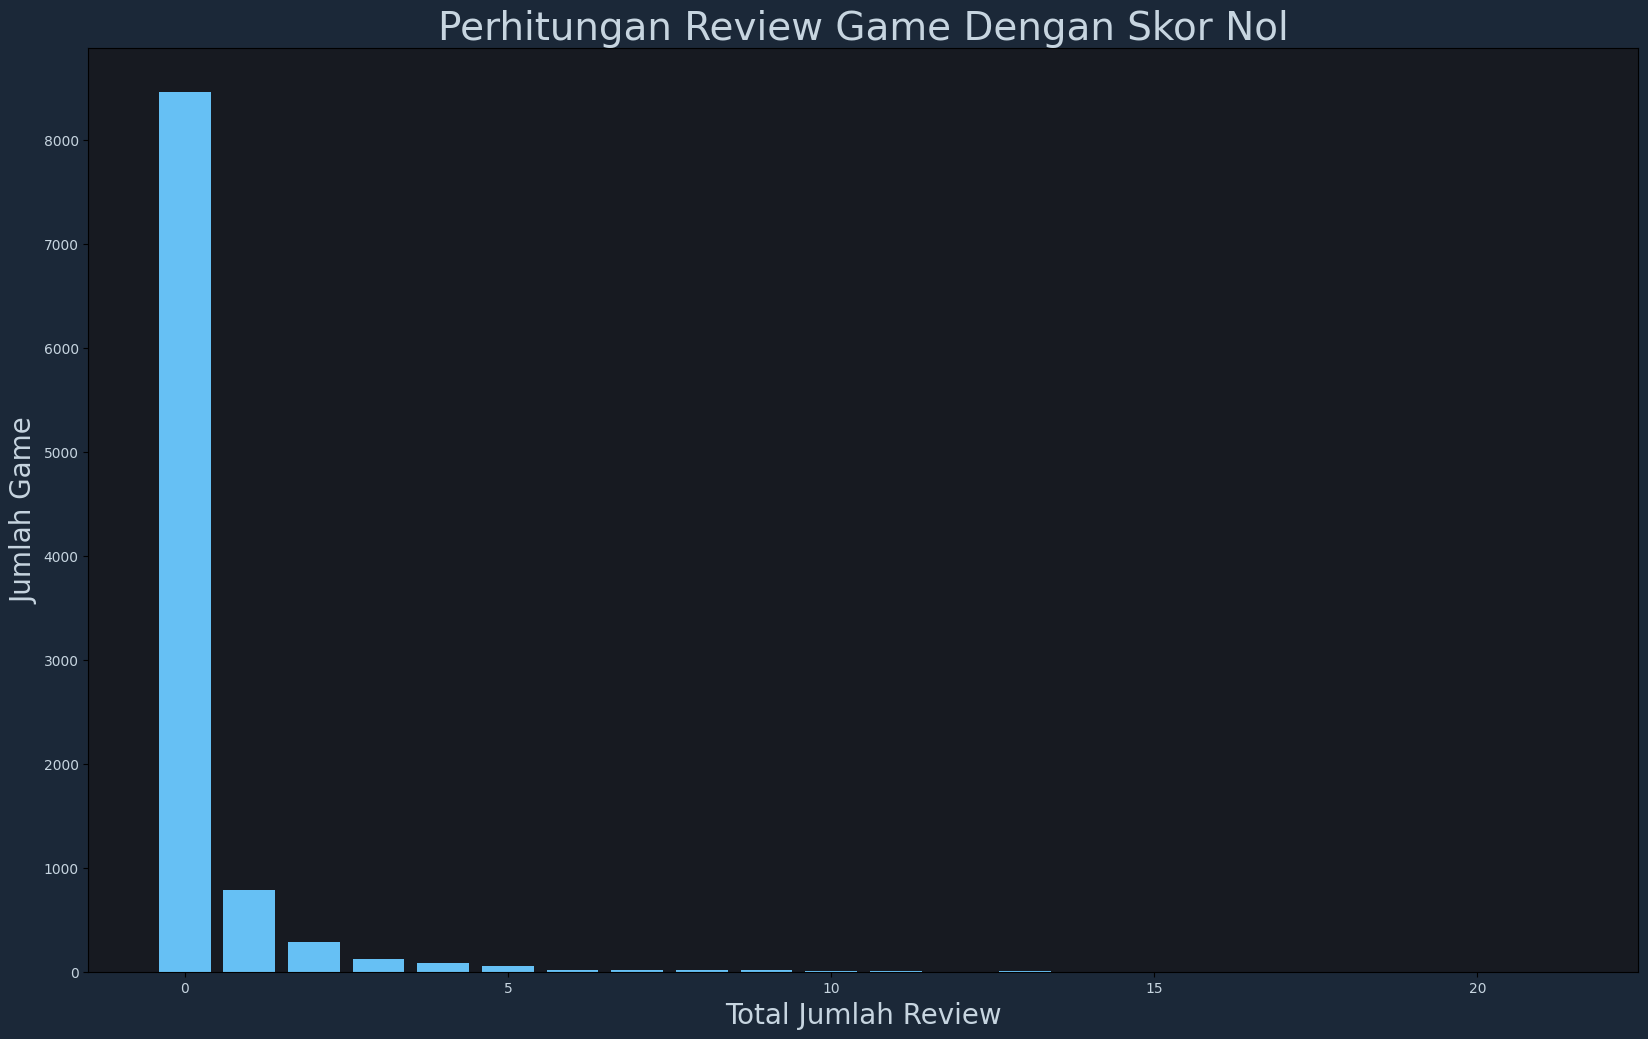

In [17]:
generate_top_values(games[games['pos_rating_pct'] == 0]['total_ratings'], xlabel = 'Total Jumlah Review', ylabel = 'Jumlah Game', title = 'Perhitungan review game dengan skor nol'.title(), max_bars=-1)

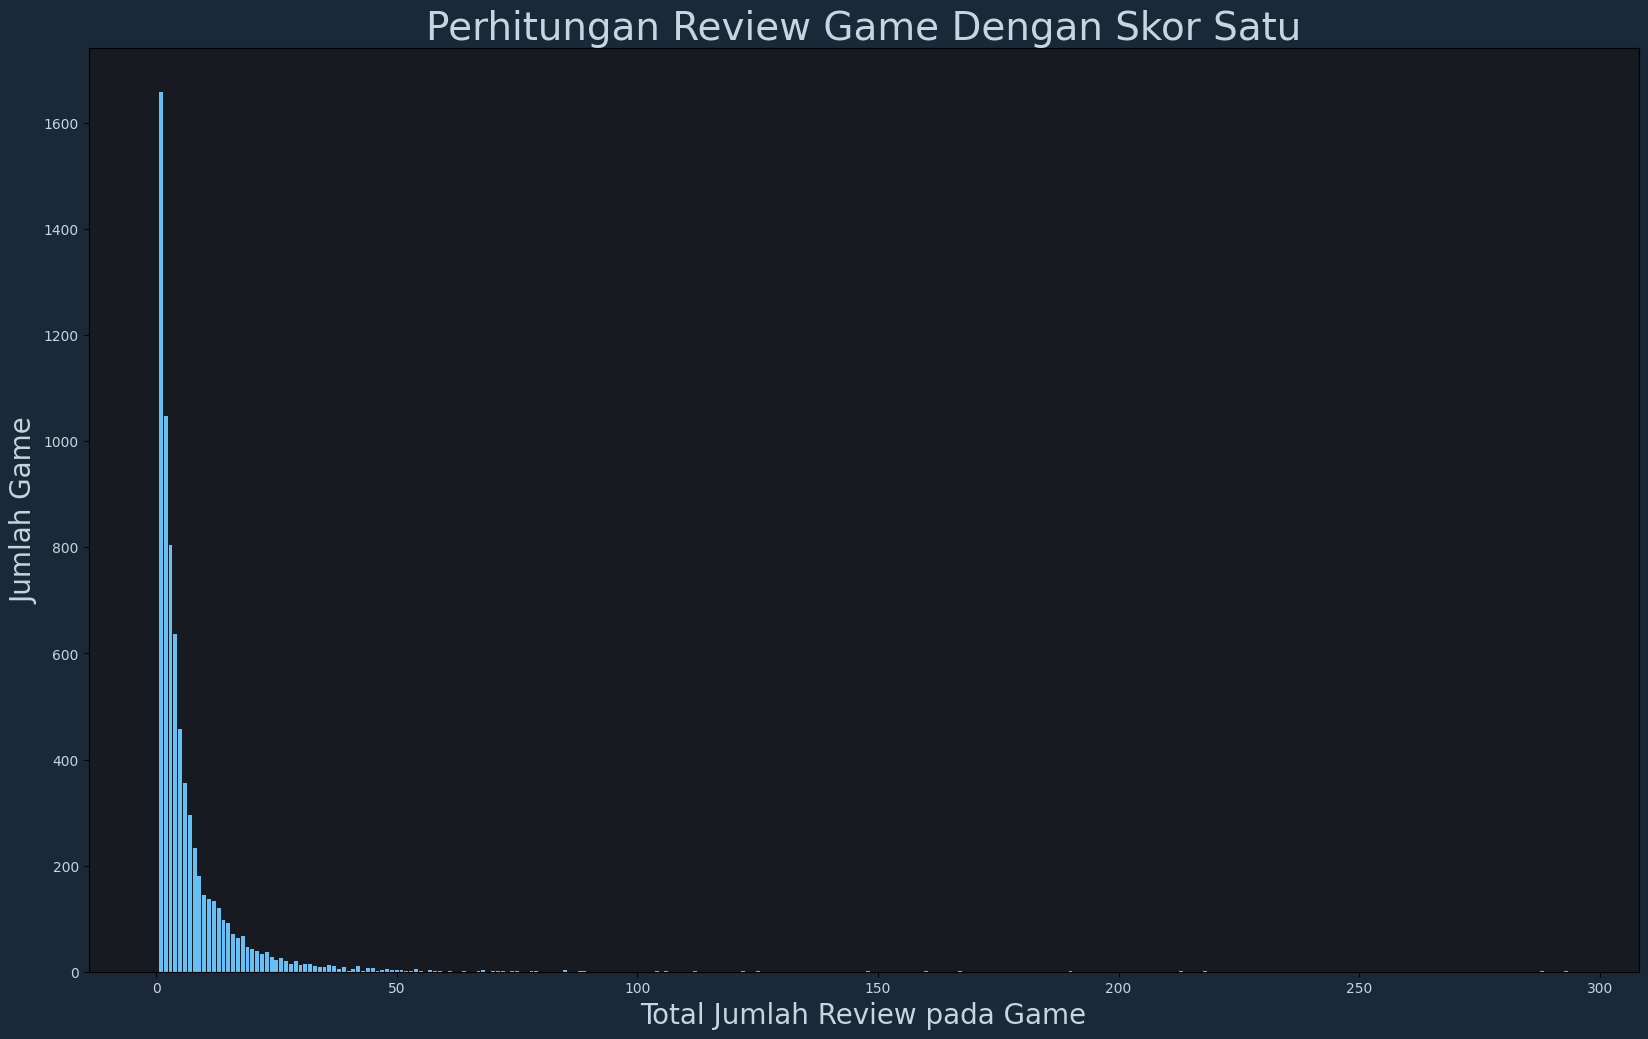

In [18]:
generate_top_values(games[games['pos_rating_pct'] == 1]['total_ratings'], xlabel = 'Total Jumlah Review pada Game', ylabel = 'Jumlah Game', title = 'Perhitungan review game dengan skor satu'.title(), max_bars=-1)

In [19]:
for i in range(5):
    print(f'percentage of games with at least {10**i} reviews: ',len(games[games['total_ratings'] > 10**i])/len(games))

percentage of games with at least 1 reviews:  0.8075723124107662
percentage of games with at least 10 reviews:  0.5912608182186735
percentage of games with at least 100 reviews:  0.25753970352352246
percentage of games with at least 1000 reviews:  0.0819276258967444
percentage of games with at least 10000 reviews:  0.01841961468633776


In [20]:
len(games['total_ratings'])

56733

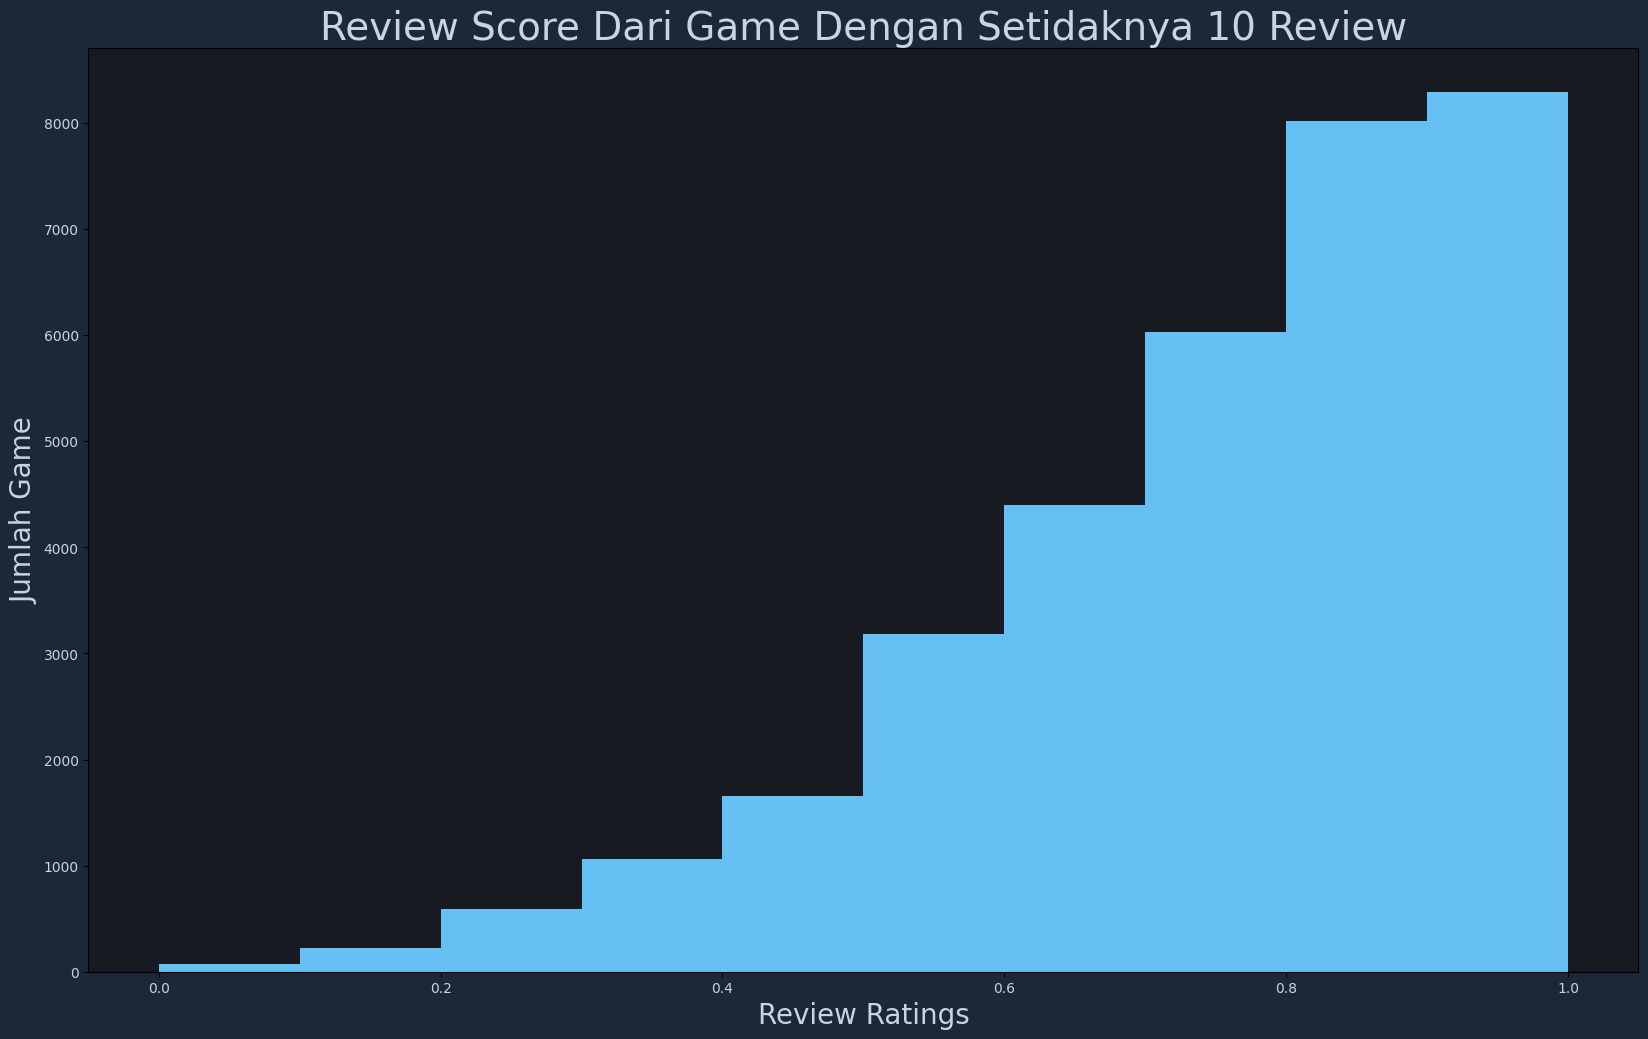

In [21]:
generate_hist(games[games['total_ratings'] > 10]['pos_rating_pct'], xlabel = 'Review Ratings', ylabel = 'Jumlah Game', title = 'Review score dari game dengan setidaknya 10 review'.title())

In [22]:
popular_tags = games.loc[:,'1980s':'e-sports'].sum().sort_values(ascending=False)
popular_tags[:35]

Indie              25939.272951
Action             18391.615286
Casual             17436.704686
Adventure          16064.473841
Singleplayer        8599.736913
Strategy            8400.652689
Simulation          8143.072110
RPG                 7109.733701
2D                  5892.778638
Puzzle              4609.336867
Early Access        4322.801243
Atmospheric         3507.071172
Pixel Graphics      3077.298002
Arcade              2997.099842
Free to Play        2990.890596
Story Rich          2942.246003
3D                  2855.481715
Colorful            2747.838907
Multiplayer         2725.664659
Exploration         2707.937790
Cute                2633.519540
Platformer          2577.763189
First-Person        2511.221882
Shooter             2447.660147
Horror              2368.238599
Anime               2329.480537
Funny               2256.368685
VR                  2254.288749
Fantasy             2224.491158
Sports              2102.790084
Retro               2066.600836
Sci-fi  

In [23]:
games.loc[:,'1980s':'e-sports'].replace(0,np.nan).count().sort_values(ascending=False)

Indie           32734
Action          21830
Singleplayer    21137
Casual          20765
Adventure       20117
                ...  
Reboot             12
Hardware           10
8-bit Music         8
Boss Rush           8
Batman              1
Length: 430, dtype: int64

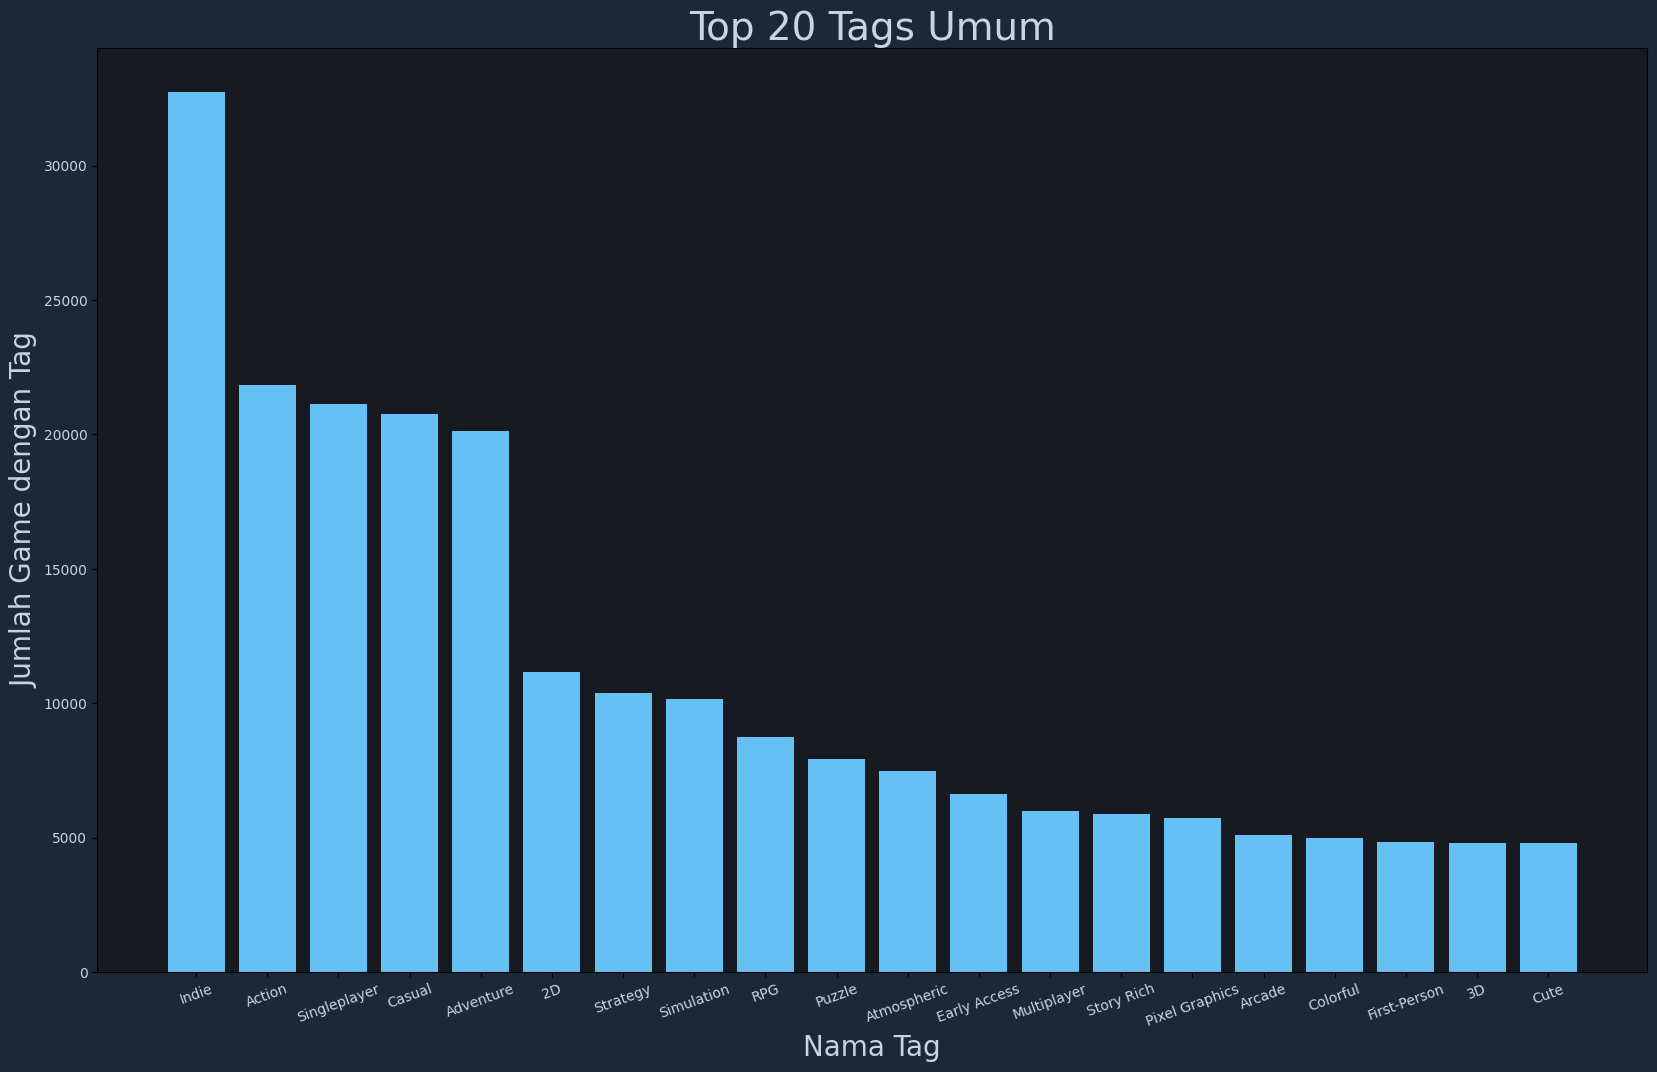

In [24]:
primary_background_color = '#171a21'
secondary_background_color = '#1b2838'
bar_color = '#66c0f4'
secondary_bar_color = '#2a475e'
text_color = '#c7d5e0'
    
x_vals = games.loc[:,'1980s':'e-sports'].replace(0,np.nan).count().sort_values(ascending=False).index
y_vals = games.loc[:,'1980s':'e-sports'].replace(0,np.nan).count().sort_values(ascending=False).values
    
fig = plt.figure(figsize=(20,12))
fig.patch.set_facecolor(secondary_background_color)

ax = fig.add_subplot(1,1,1)
ax.set_facecolor(primary_background_color)
ax.bar(x_vals[:20], y_vals[:20], color = bar_color)


plt.xticks(rotation = 20, color=text_color)
plt.xlabel('Nama Tag', color=text_color, fontdict = {'fontsize': 20})
plt.yticks(color=text_color)
plt.ylabel('Jumlah Game dengan Tag', color=text_color, fontdict = {'fontsize': 20})
plt.title('Top 20 Tags Umum', color=text_color, fontdict = {'fontsize': 28})
plt.savefig('../slide_images/top_tags.png')

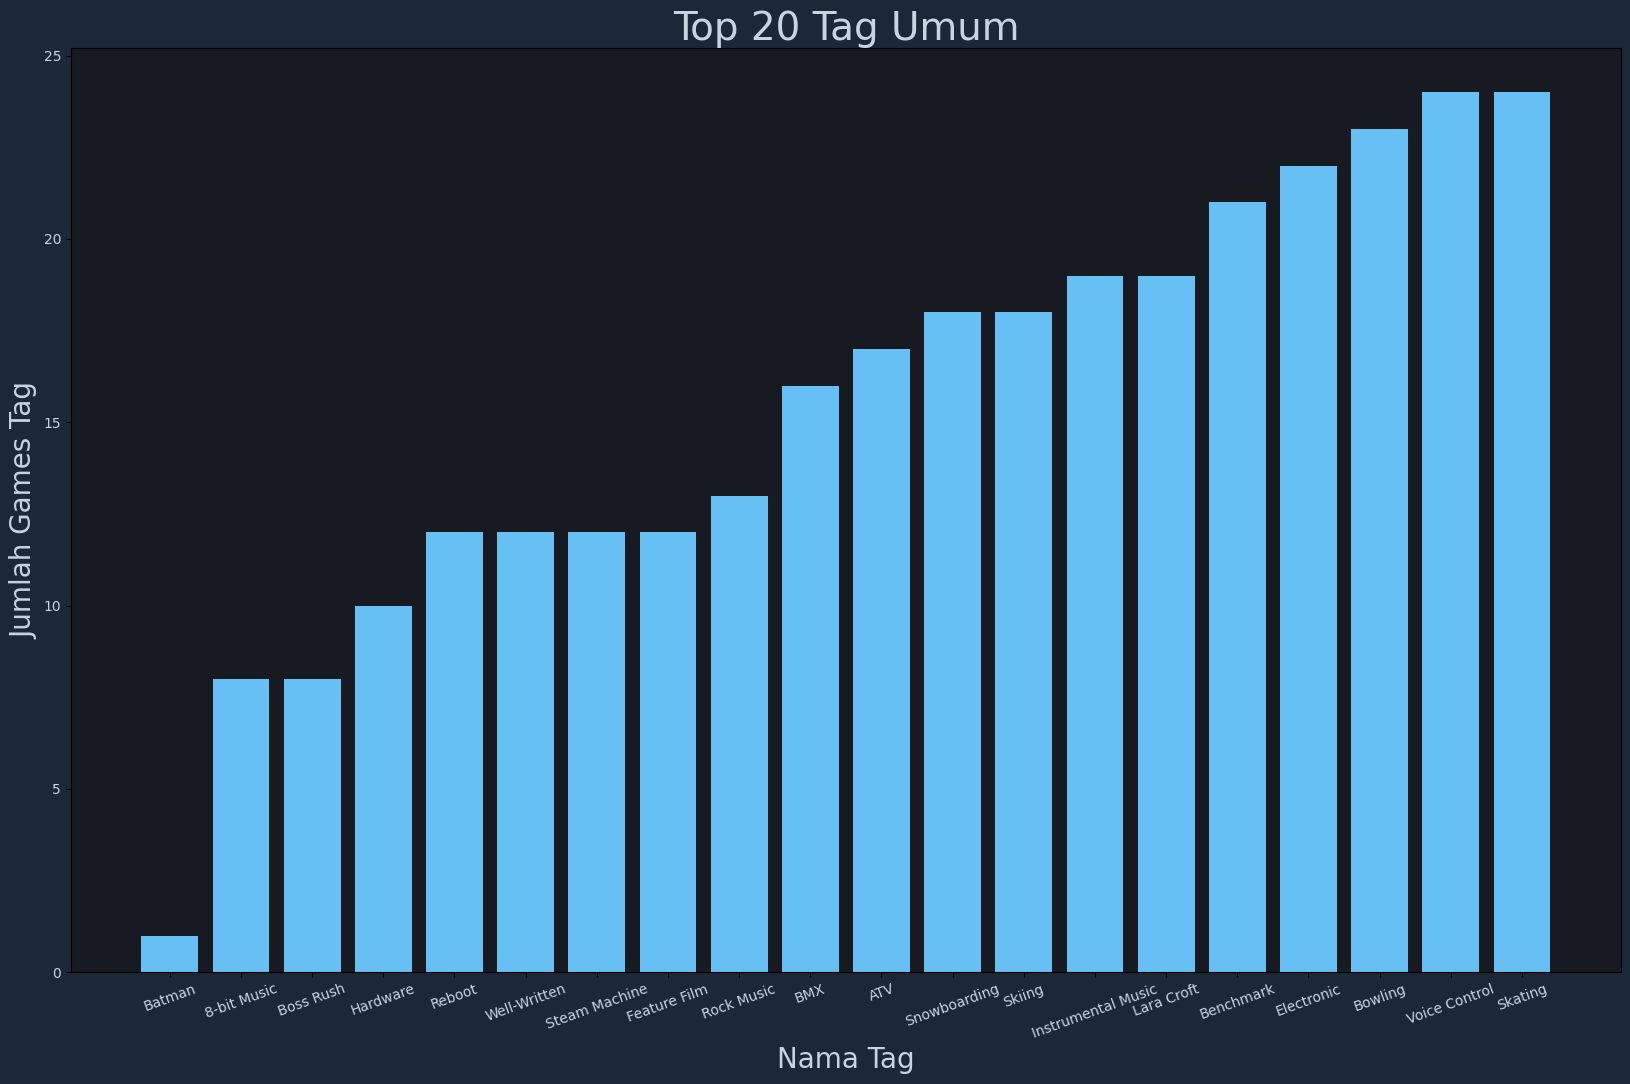

In [25]:
x_vals = games.loc[:,'1980s':'e-sports'].replace(0,np.nan).count().sort_values(ascending=True).index
y_vals = games.loc[:,'1980s':'e-sports'].replace(0,np.nan).count().sort_values(ascending=True).values
    
fig = plt.figure(figsize=(20,12))
fig.patch.set_facecolor(secondary_background_color)

ax = fig.add_subplot(1,1,1)
ax.set_facecolor(primary_background_color)
ax.bar(x_vals[:20], y_vals[:20], color = bar_color)


plt.xticks(rotation = 20, color=text_color)
plt.xlabel('Nama Tag', color=text_color, fontdict = {'fontsize': 20})
plt.yticks(color=text_color)
plt.ylabel('Jumlah Games Tag', color=text_color, fontdict = {'fontsize': 20})
plt.title('Top 20 Tag Umum', color=text_color, fontdict = {'fontsize': 28});

In [26]:
games.loc[ : , 'languages_Arabic':'languages_Vietnamese'].sum().sort_values(ascending=False)[:20]

languages_English                56126
languages_German                 13812
languages_French                 13221
languages_Russian                13009
languages_Spanish                12706
languages_Simplified Chinese     12429
languages_Japanese                9955
languages_Italian                 9334
languages_Portuguese              8161
languages_Korean                  6188
languages_Traditional Chinese     5996
languages_Polish                  5526
languages_Turkish                 3560
languages_Dutch                   3061
languages_Czech                   2385
languages_Swedish                 2090
languages_Ukrainian               1957
languages_Hungarian               1942
languages_Arabic                  1870
languages_Danish                  1756
dtype: int64

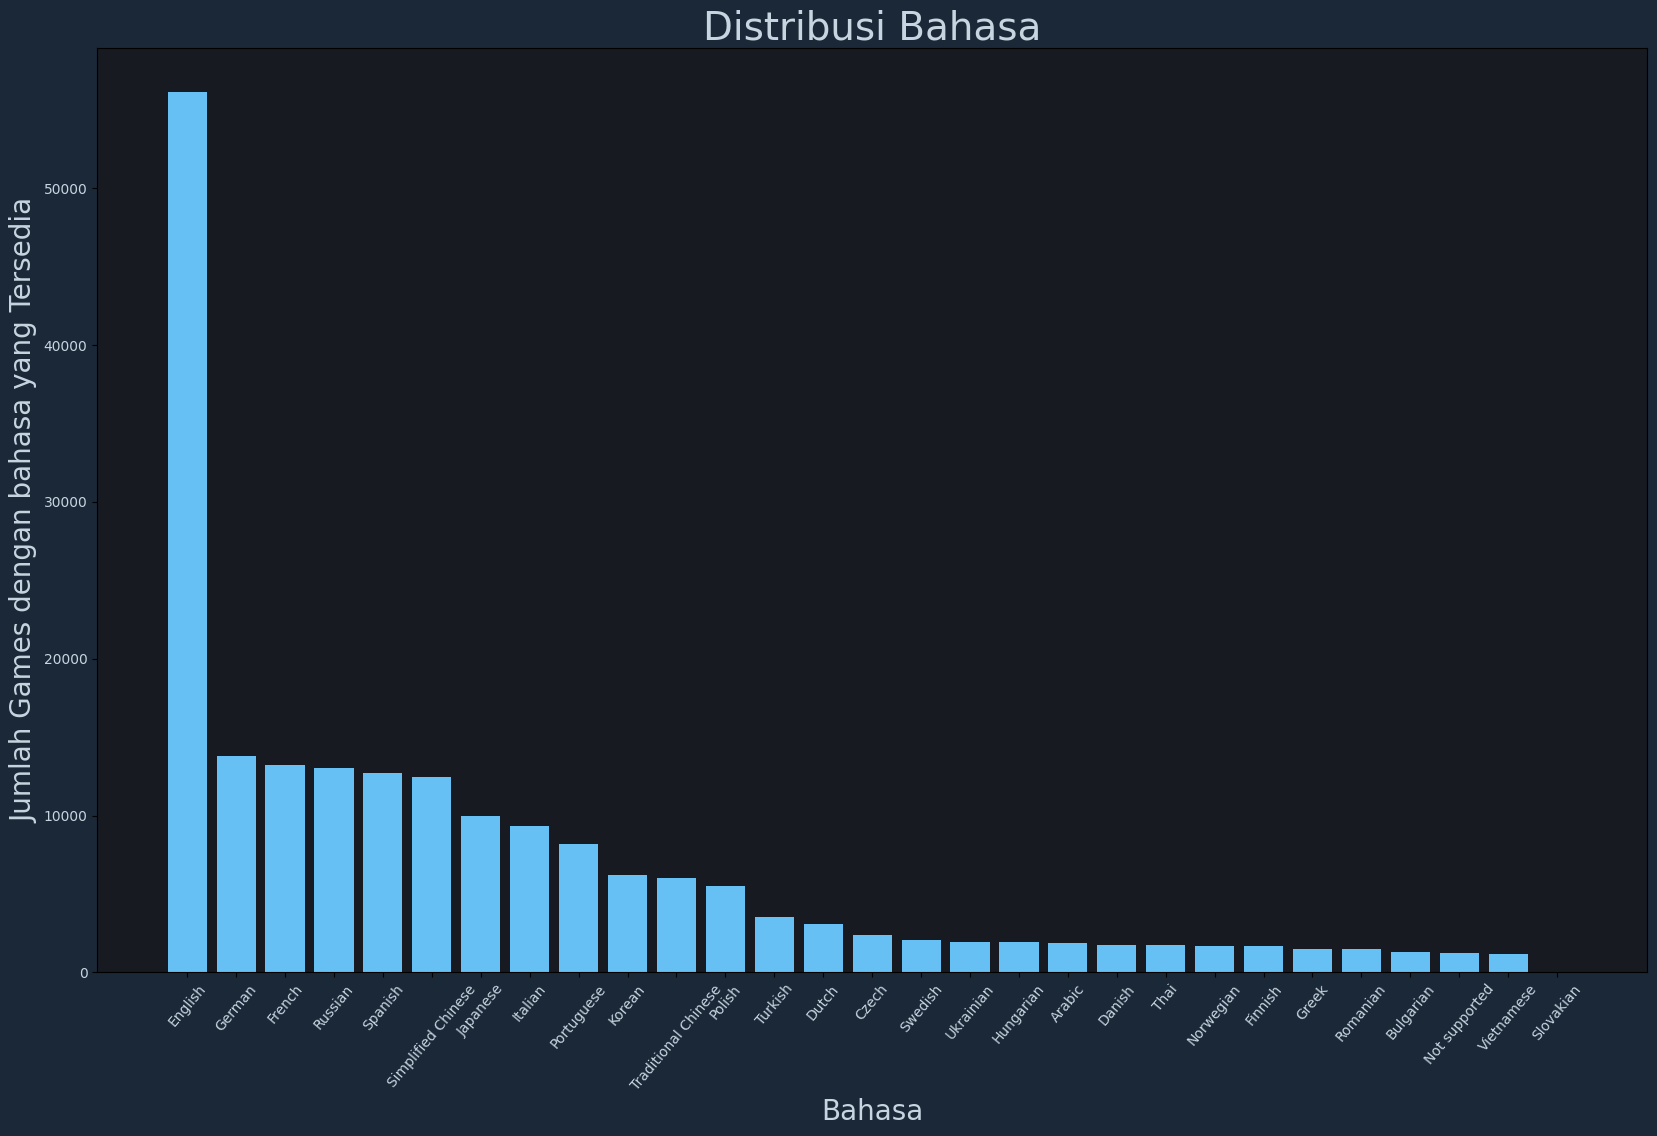

In [27]:
x_vals = games.loc[:,'languages_Arabic':'languages_Vietnamese'].sum().sort_values(ascending=False).index
y_vals = games.loc[:,'languages_Arabic':'languages_Vietnamese'].sum().sort_values(ascending=False).values
x_vals = [str(lang)[10:] for lang in x_vals]
    
fig = plt.figure(figsize=(20,12))
fig.patch.set_facecolor(secondary_background_color)

ax = fig.add_subplot(1,1,1)
ax.set_facecolor(primary_background_color)
ax.bar(x_vals, y_vals, color = bar_color)


plt.xticks(rotation = 50, color=text_color)
plt.xlabel('Bahasa', color=text_color, fontdict = {'fontsize': 20})
plt.yticks(color=text_color)
plt.ylabel('Jumlah Games dengan bahasa yang Tersedia', color=text_color, fontdict = {'fontsize': 20})
plt.title('Distribusi Bahasa', color=text_color, fontdict = {'fontsize': 28});

In [28]:
games.loc[ : , 'genre_360 V' : 'genre_Web Publishing'].sum().sort_values(ascending=False)

genre_Indie                    40696
genre_Action                   24226
genre_Casual                   22270
genre_Adventure                21940
genre_Simulation               11300
genre_Strategy                 10942
genre_RPG                      10016
genre_Early Access              6474
genre_Free to Play              3705
genre_Sports                    2644
genre_Racing                    2088
genre_Massively Multiplayer     1567
genre_Utilities                  676
genre_Design & Illustration      395
genre_Education                  320
genre_Animation & Modeling       313
genre_Video Production           225
genre_Audio Production           175
genre_Software Training          163
genre_Game Development           150
genre_Violent                    125
genre_Photo Editing               95
genre_Web Publishing              91
genre_Gore                        71
genre_Sexual Content              35
genre_Nudity                      30
genre_Accounting                  23
g

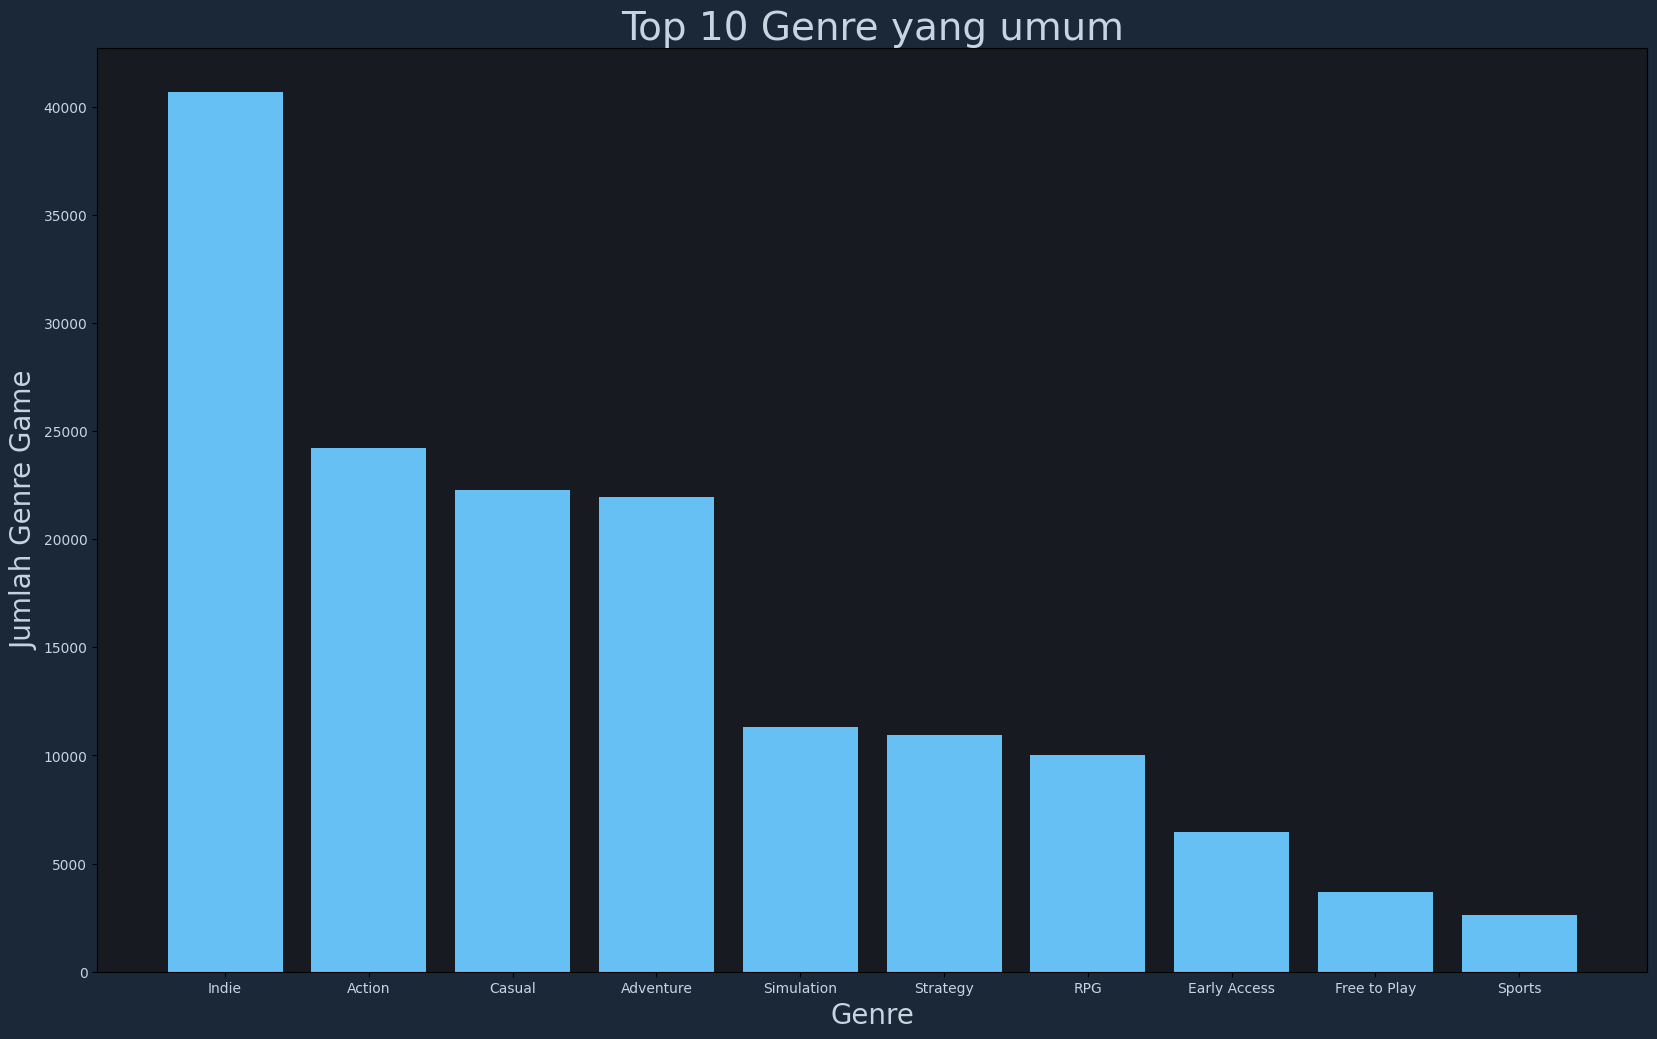

In [29]:
x_vals = games.loc[:,'genre_360 V' : 'genre_Web Publishing'].sum().sort_values(ascending=False).index
y_vals = games.loc[:,'genre_360 V' : 'genre_Web Publishing'].sum().sort_values(ascending=False).values
x_vals = [str(lang)[6:] for lang in x_vals]
    
fig = plt.figure(figsize=(20,12))
fig.patch.set_facecolor(secondary_background_color)

ax = fig.add_subplot(1,1,1)
ax.set_facecolor(primary_background_color)
ax.bar(x_vals[:10], y_vals[:10], color = bar_color)


plt.xticks(color=text_color)
plt.xlabel('Genre', color=text_color, fontdict = {'fontsize': 20})
plt.yticks(color=text_color)
plt.ylabel('Jumlah Genre Game', color=text_color, fontdict = {'fontsize': 20})
plt.title('Top 10 Genre yang umum', color=text_color, fontdict = {'fontsize': 28})
plt.savefig('../slide_images/top_genres.png');

C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_10368\3595579422.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(20,12))


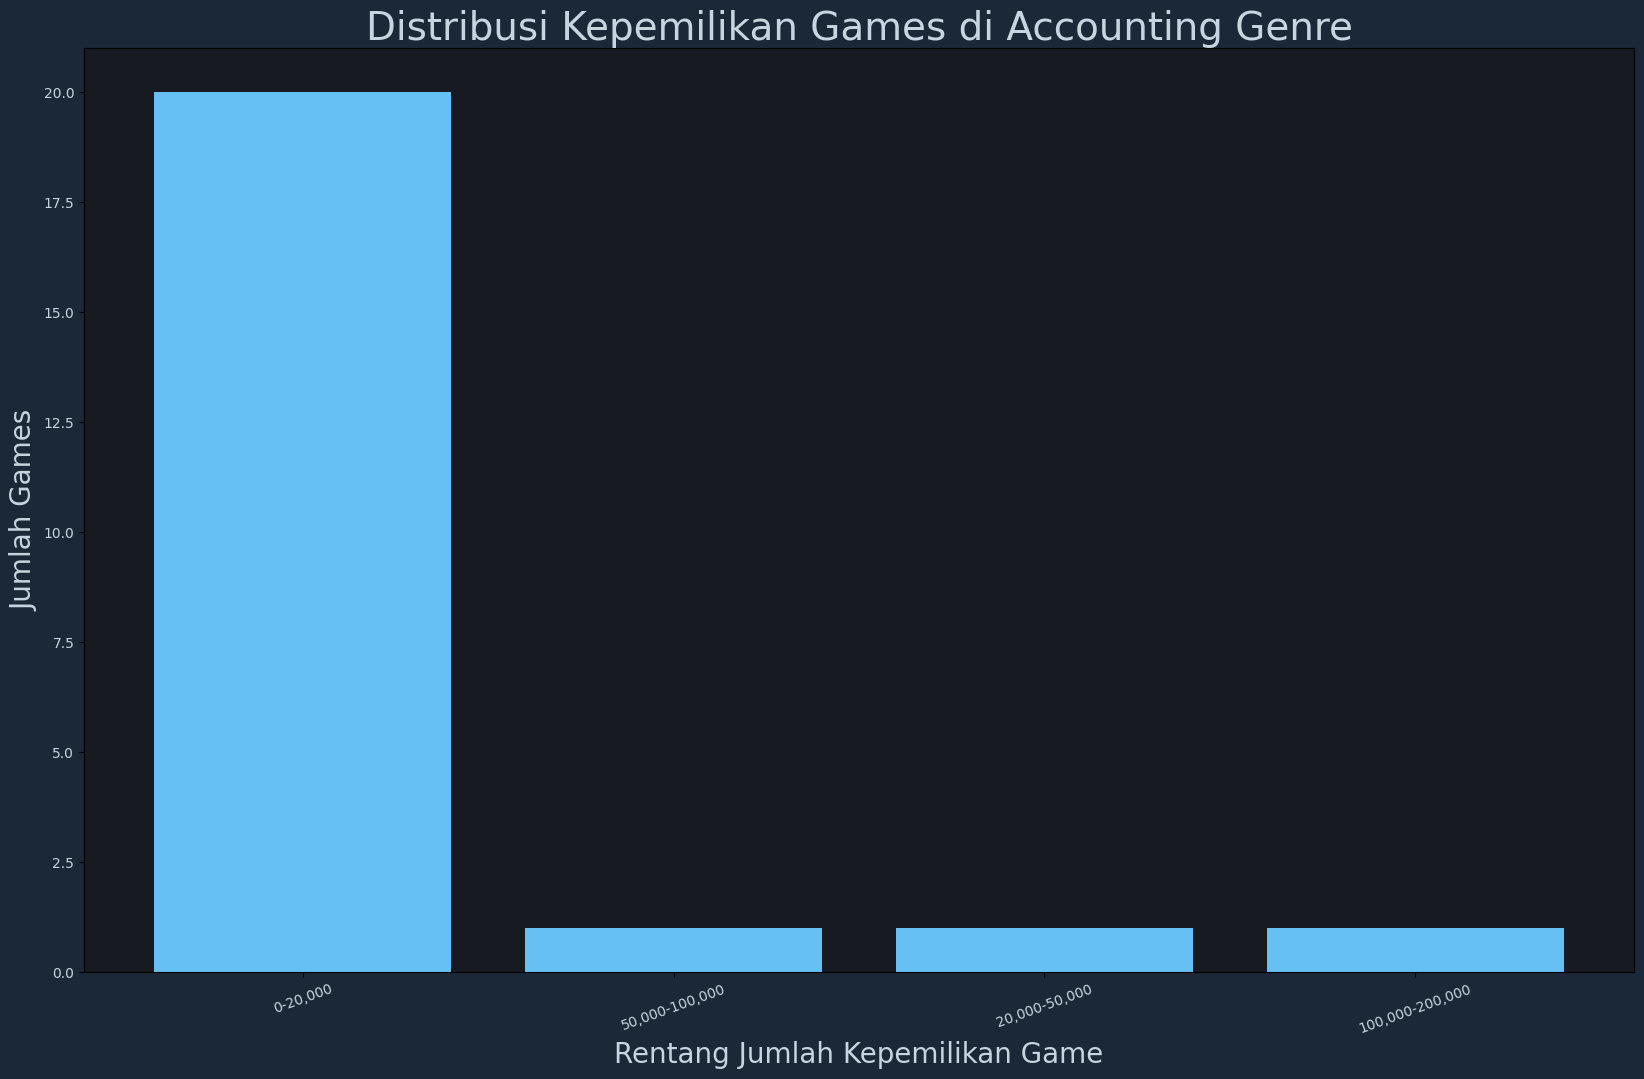

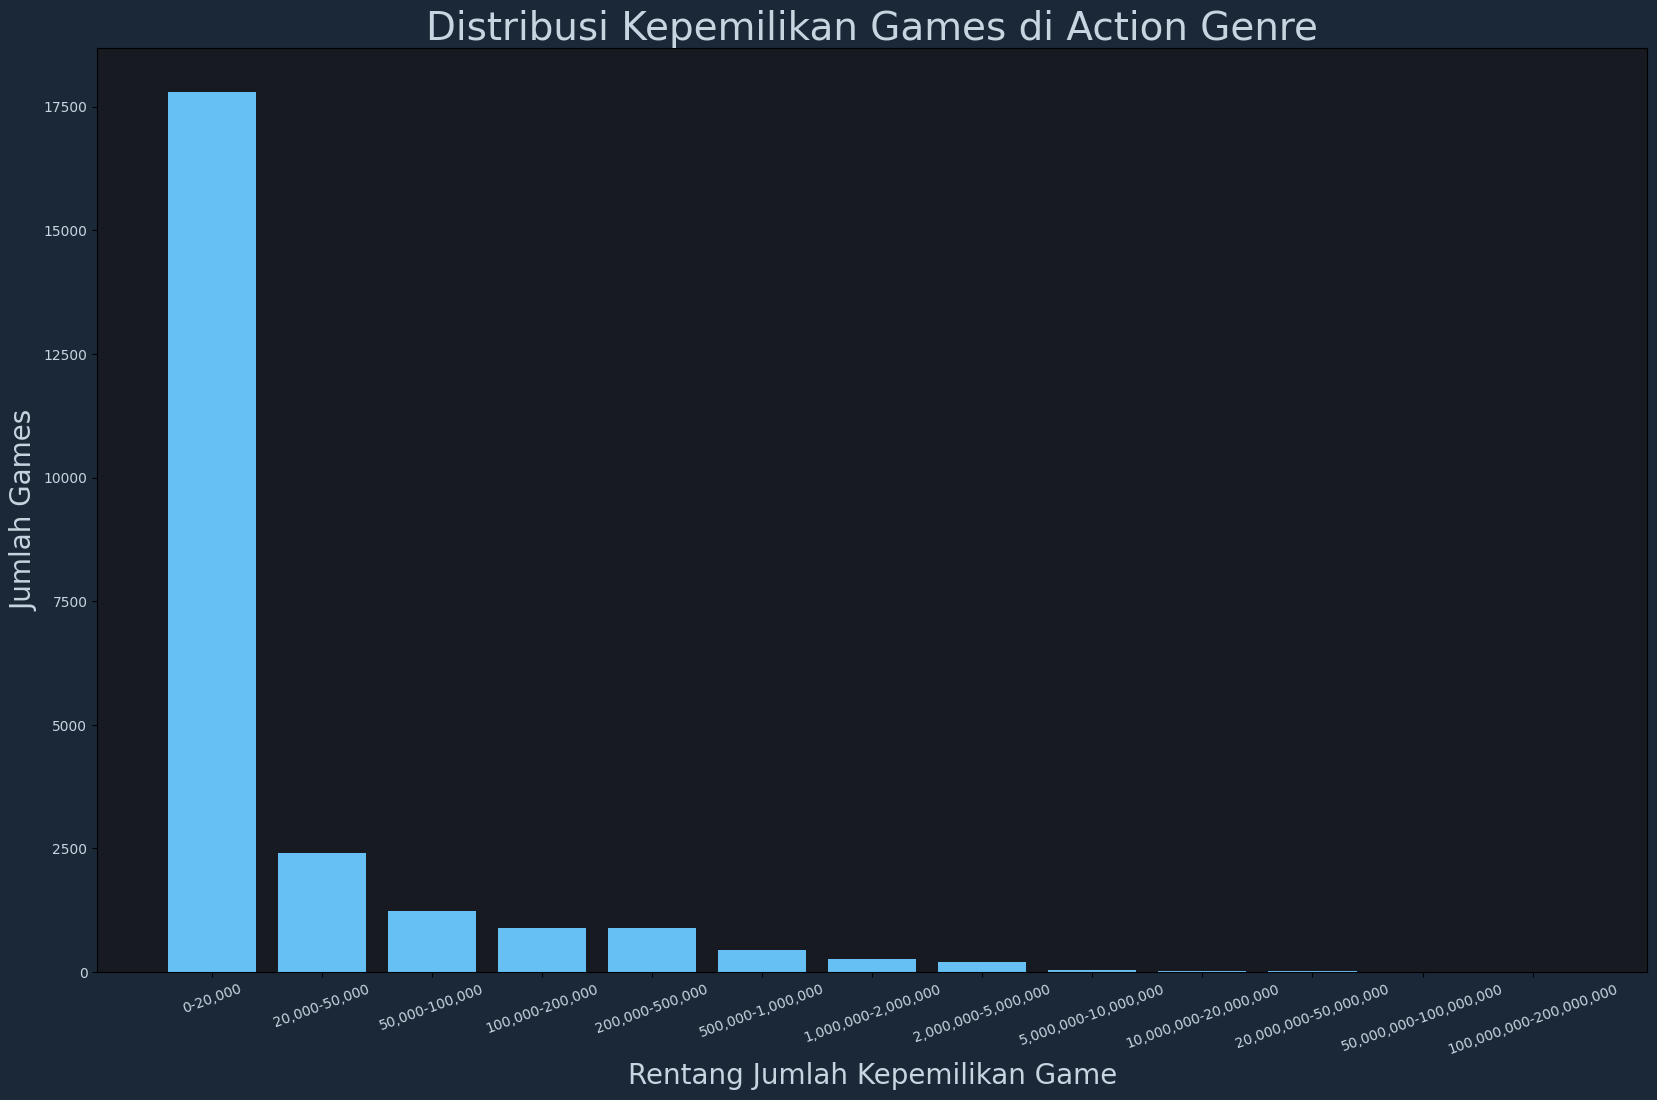

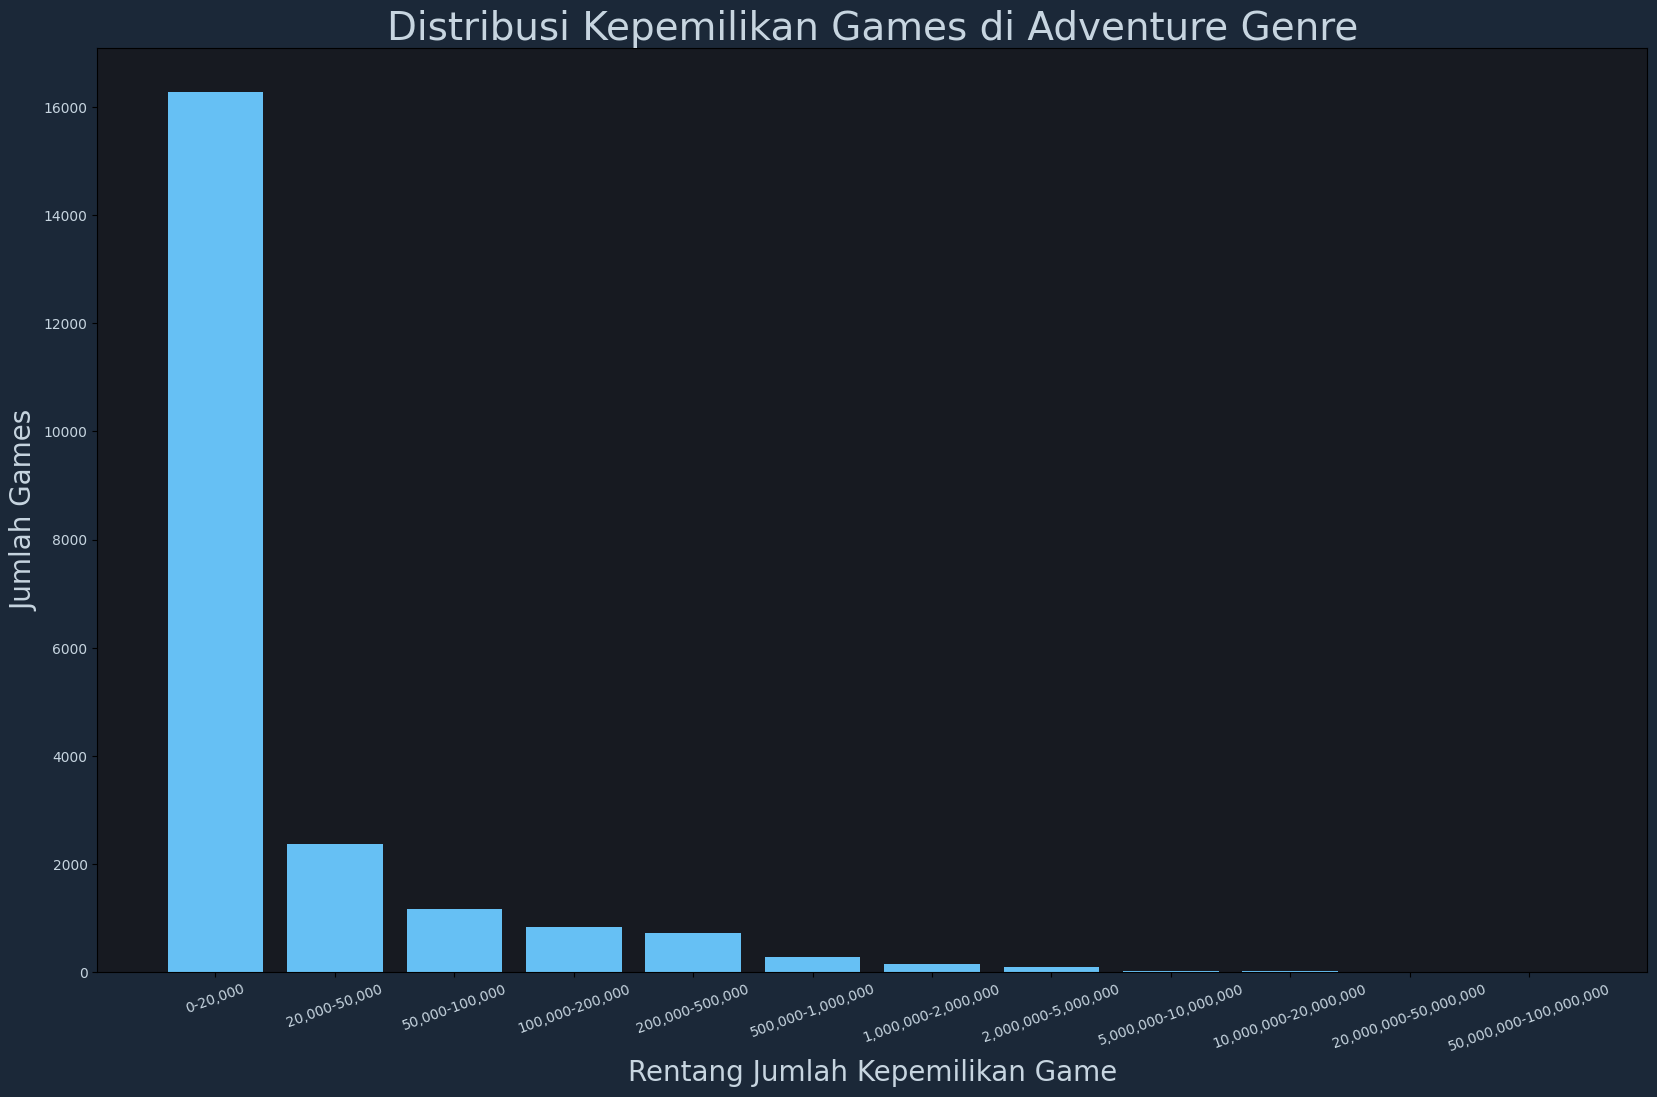

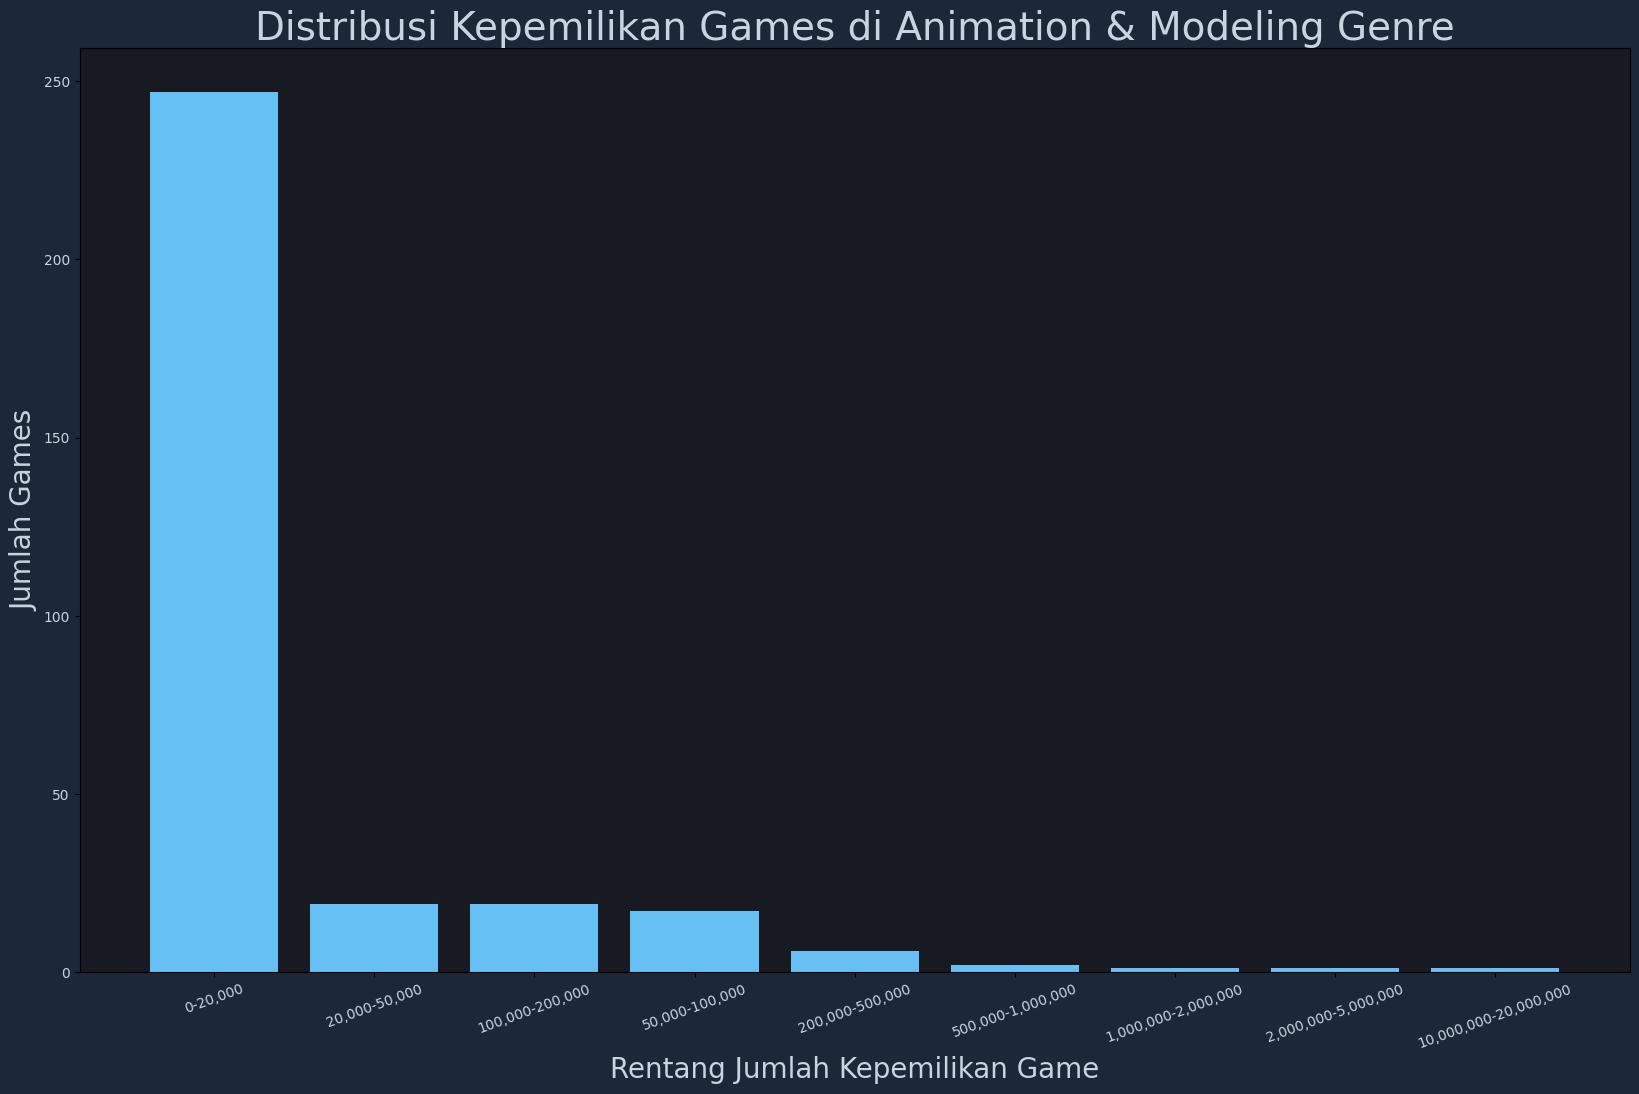

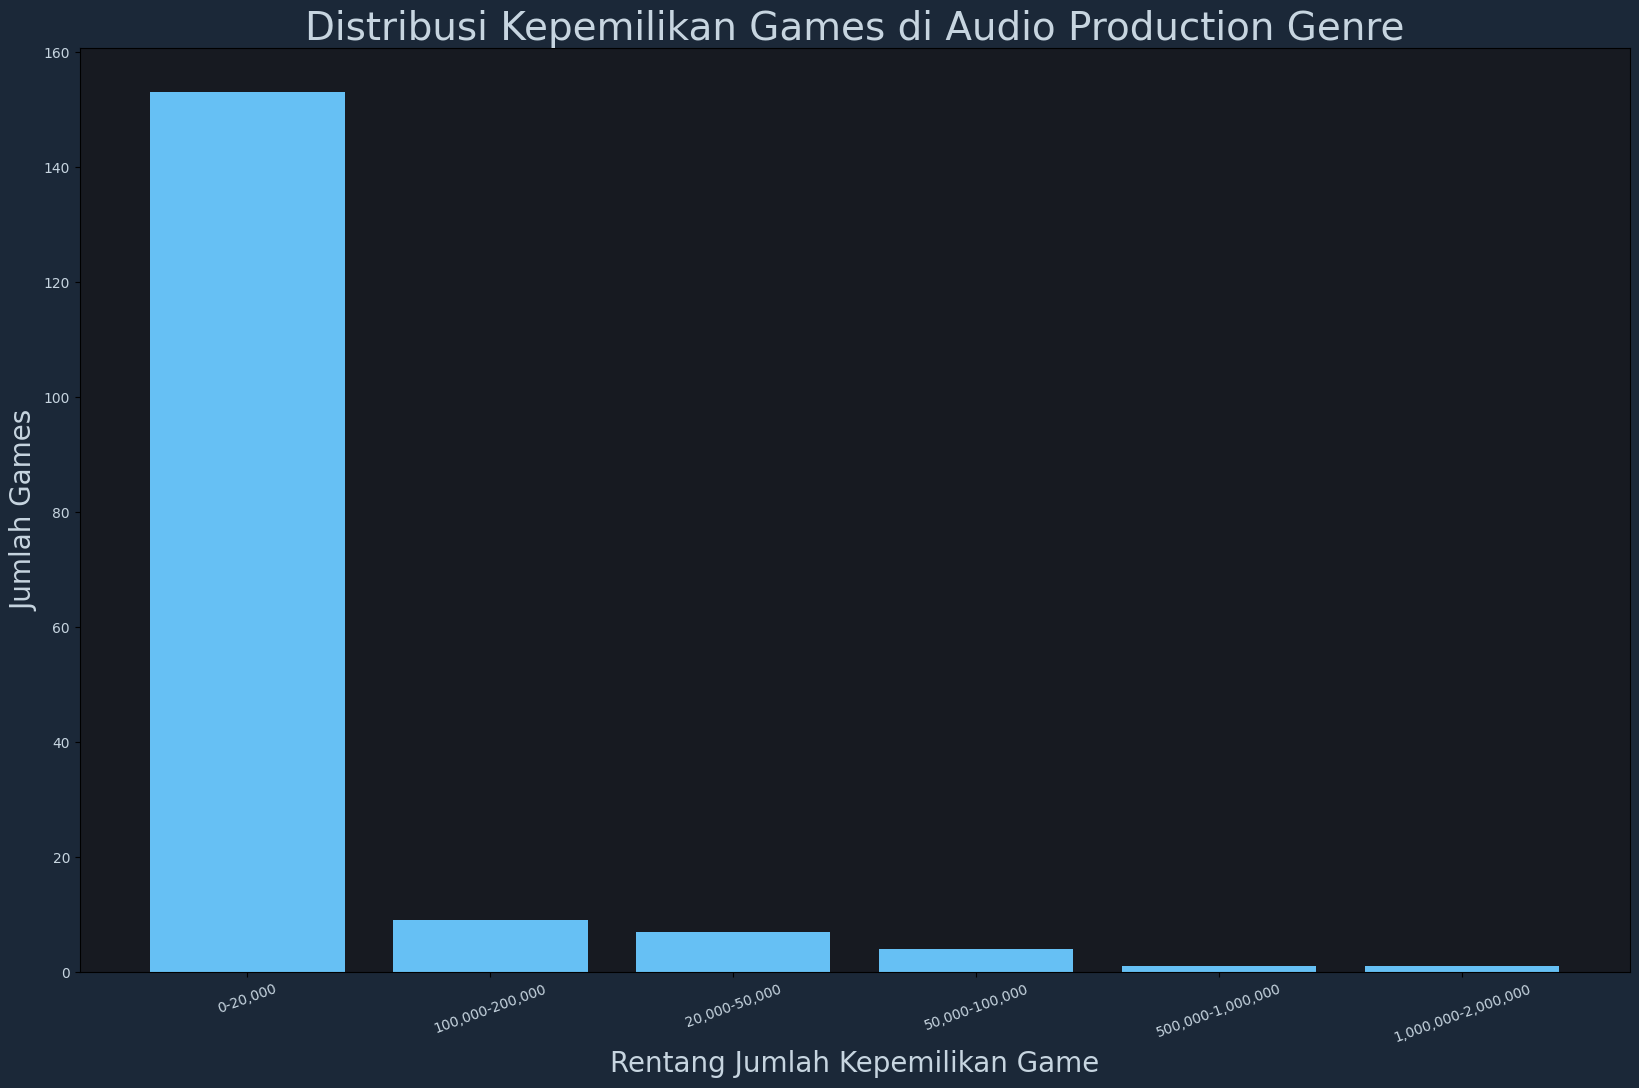

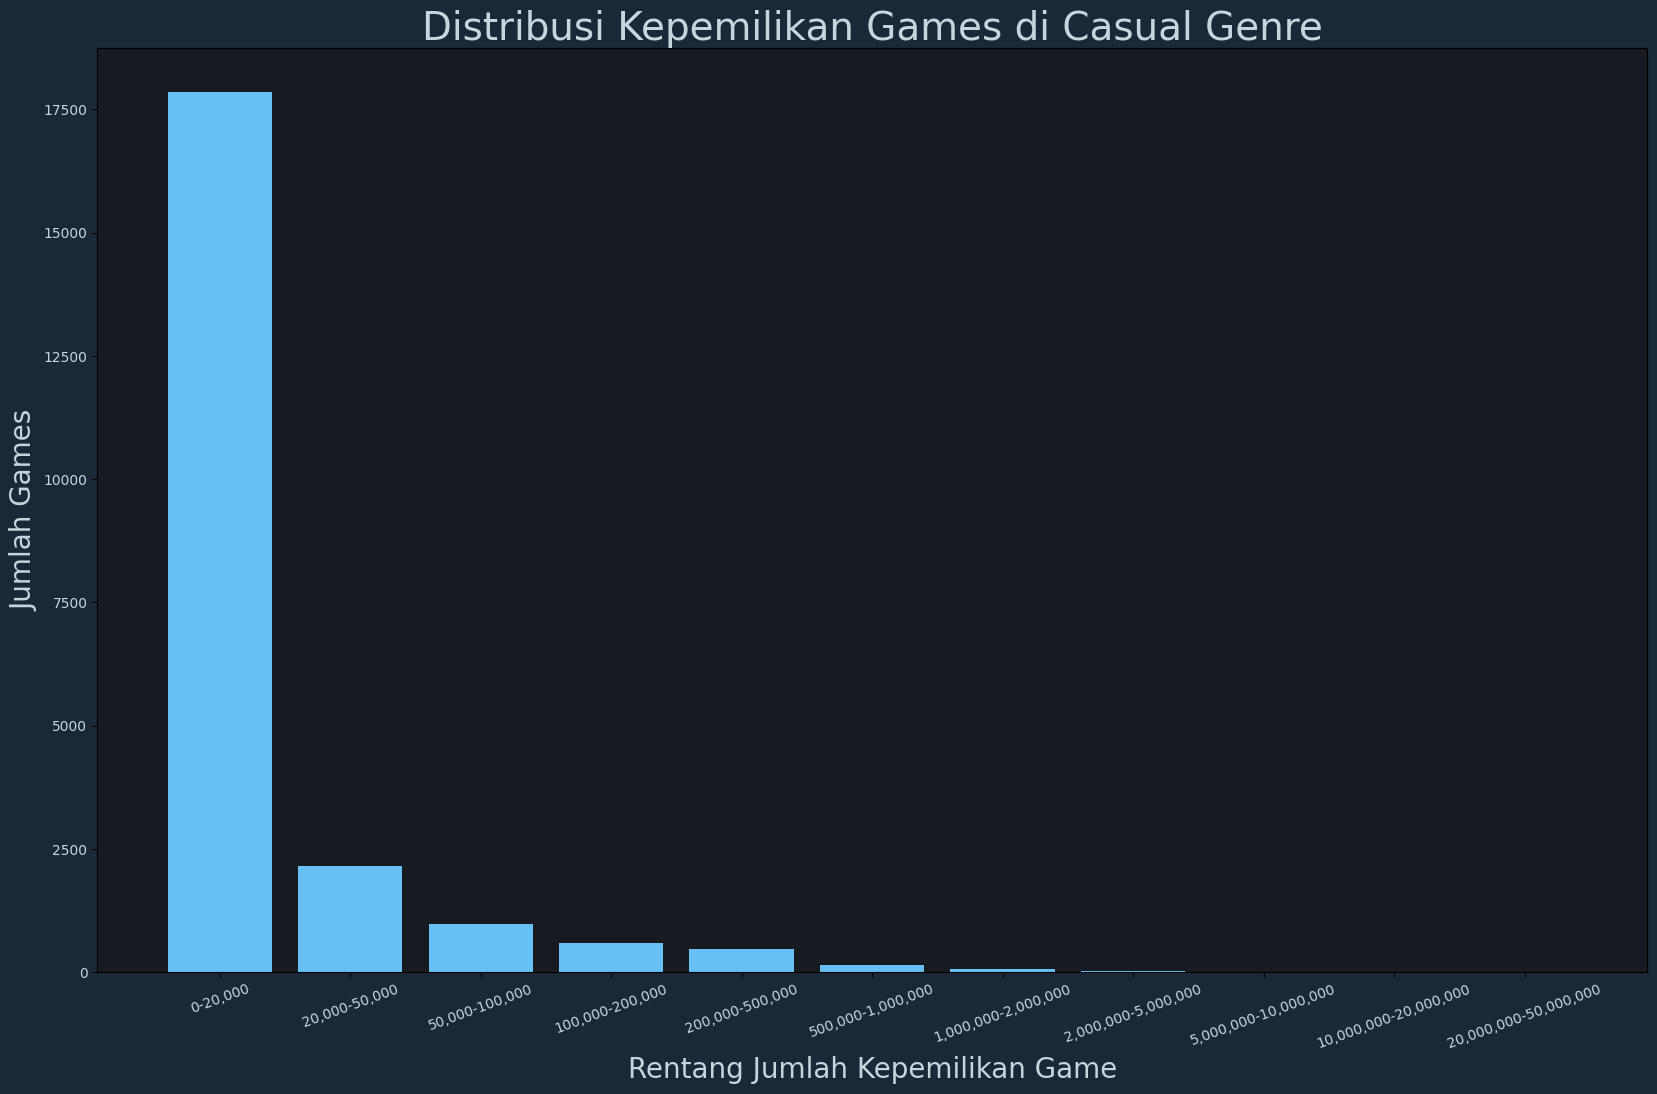

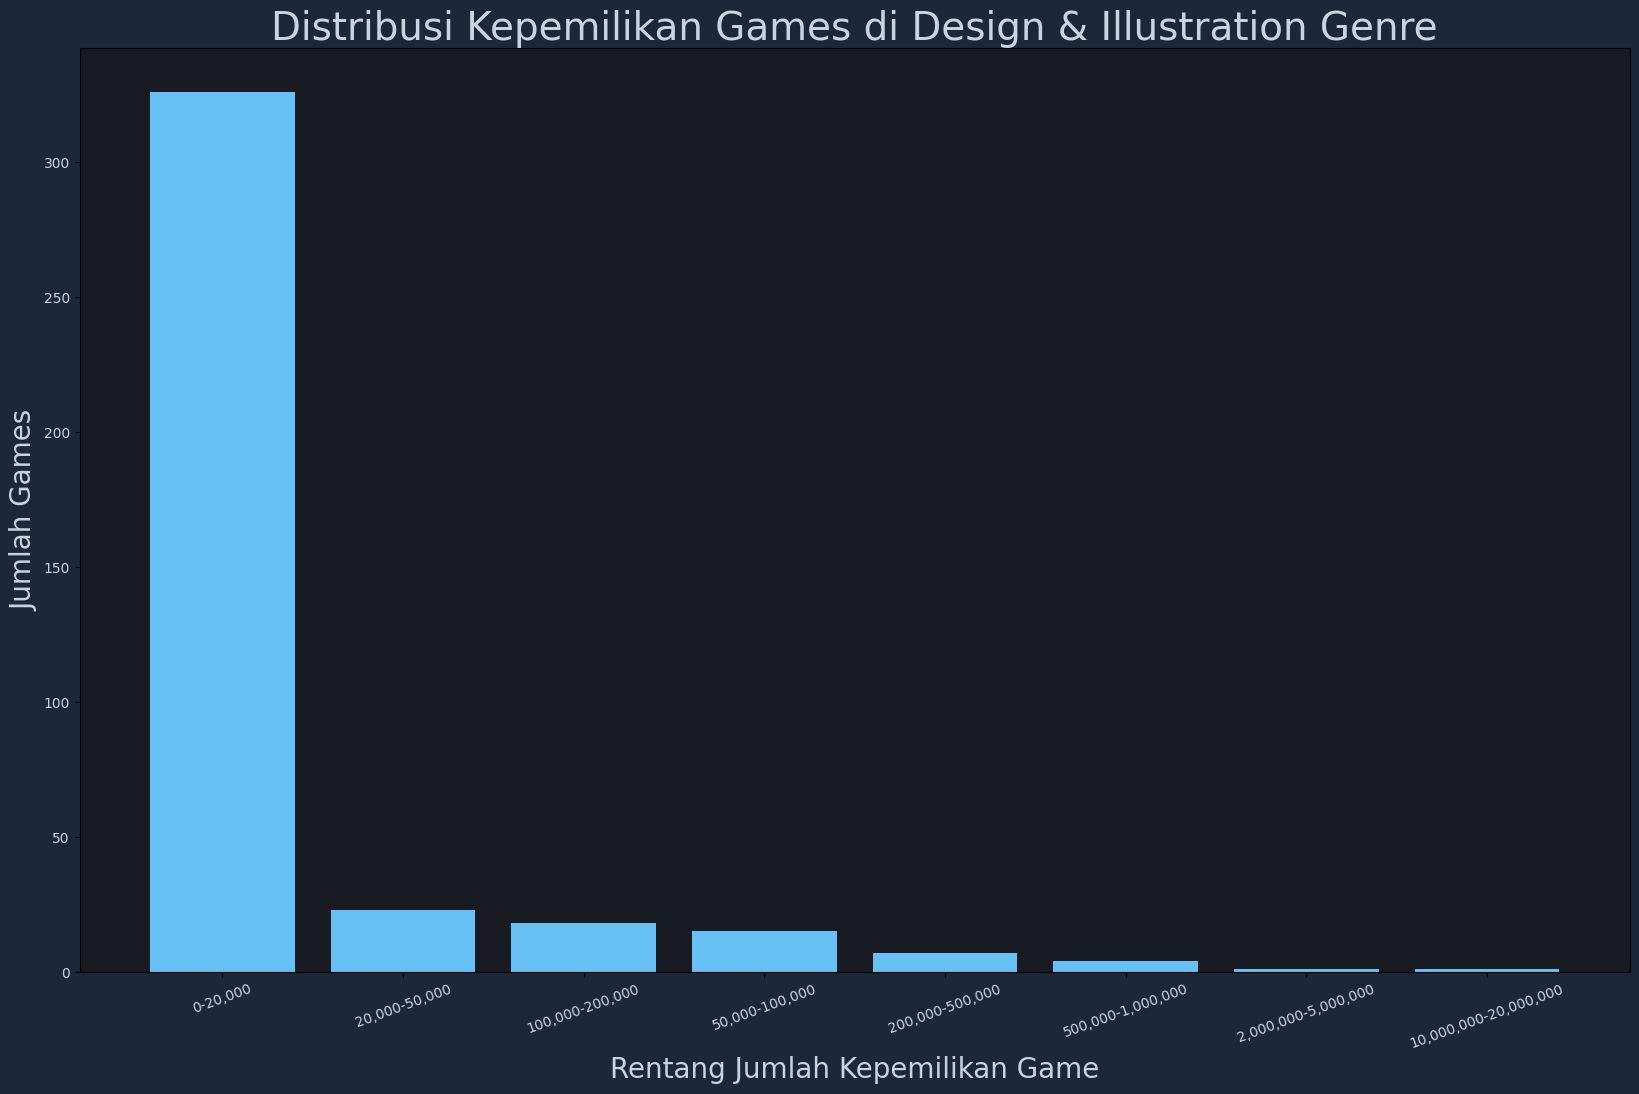

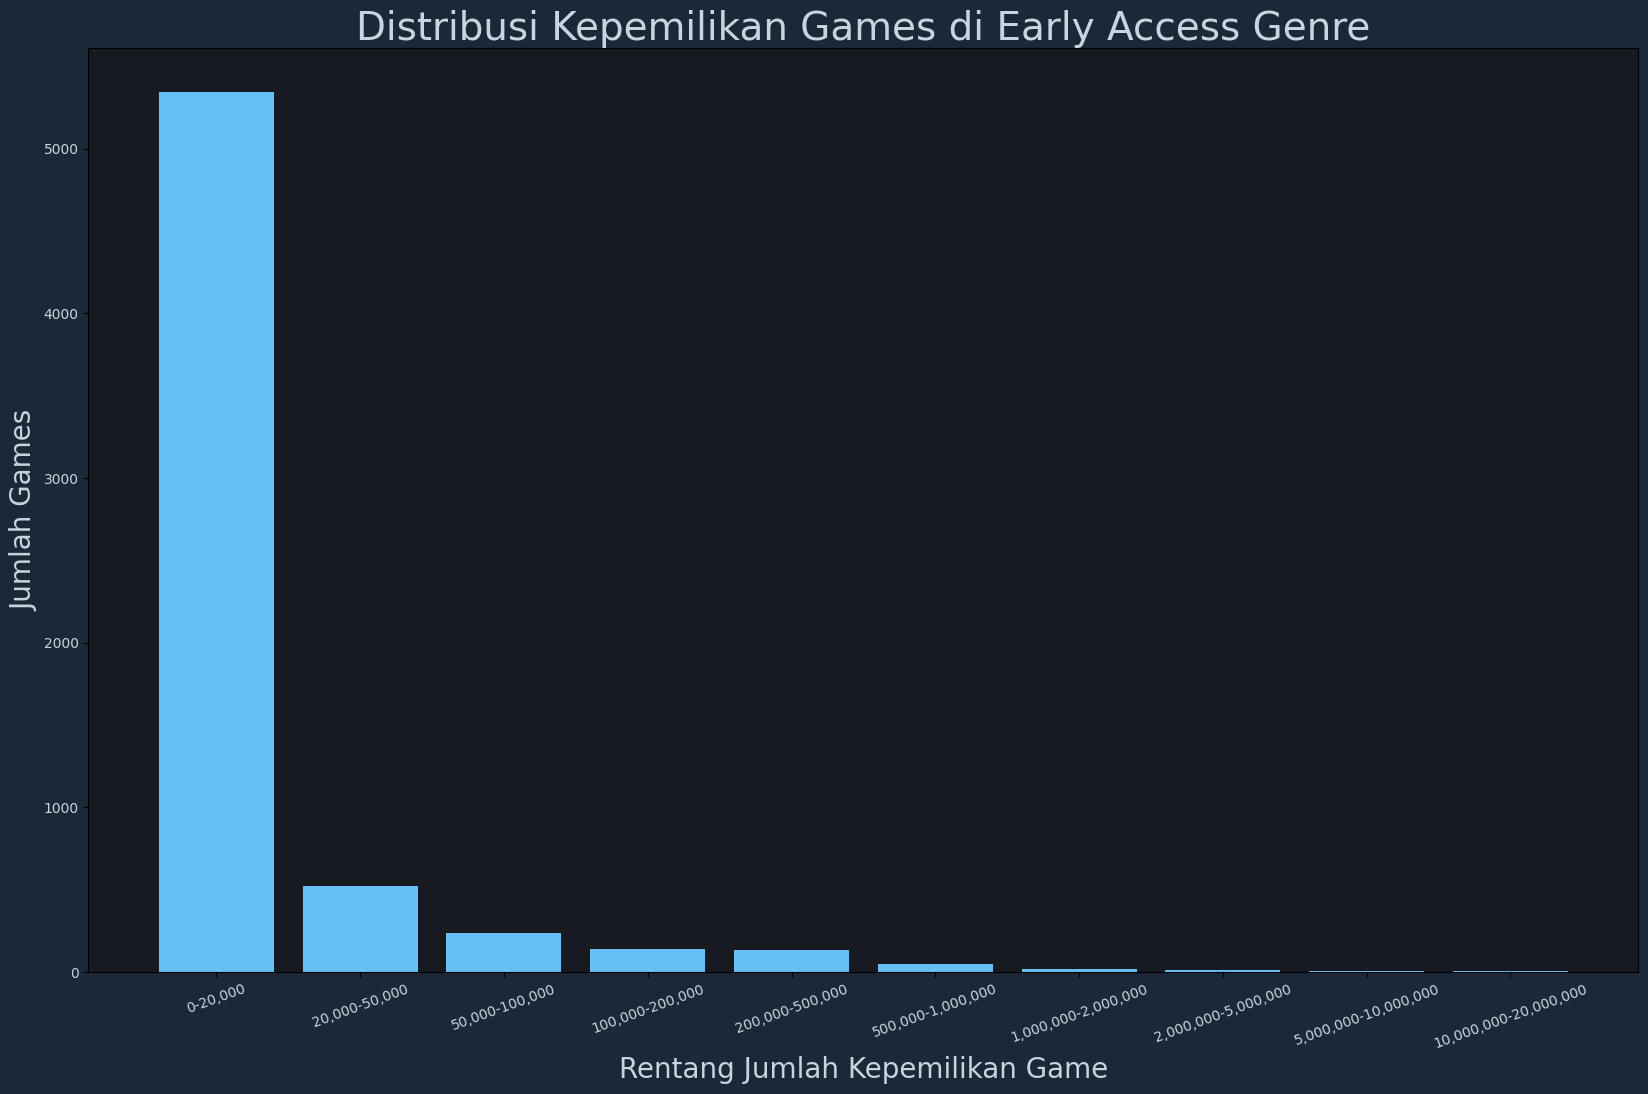

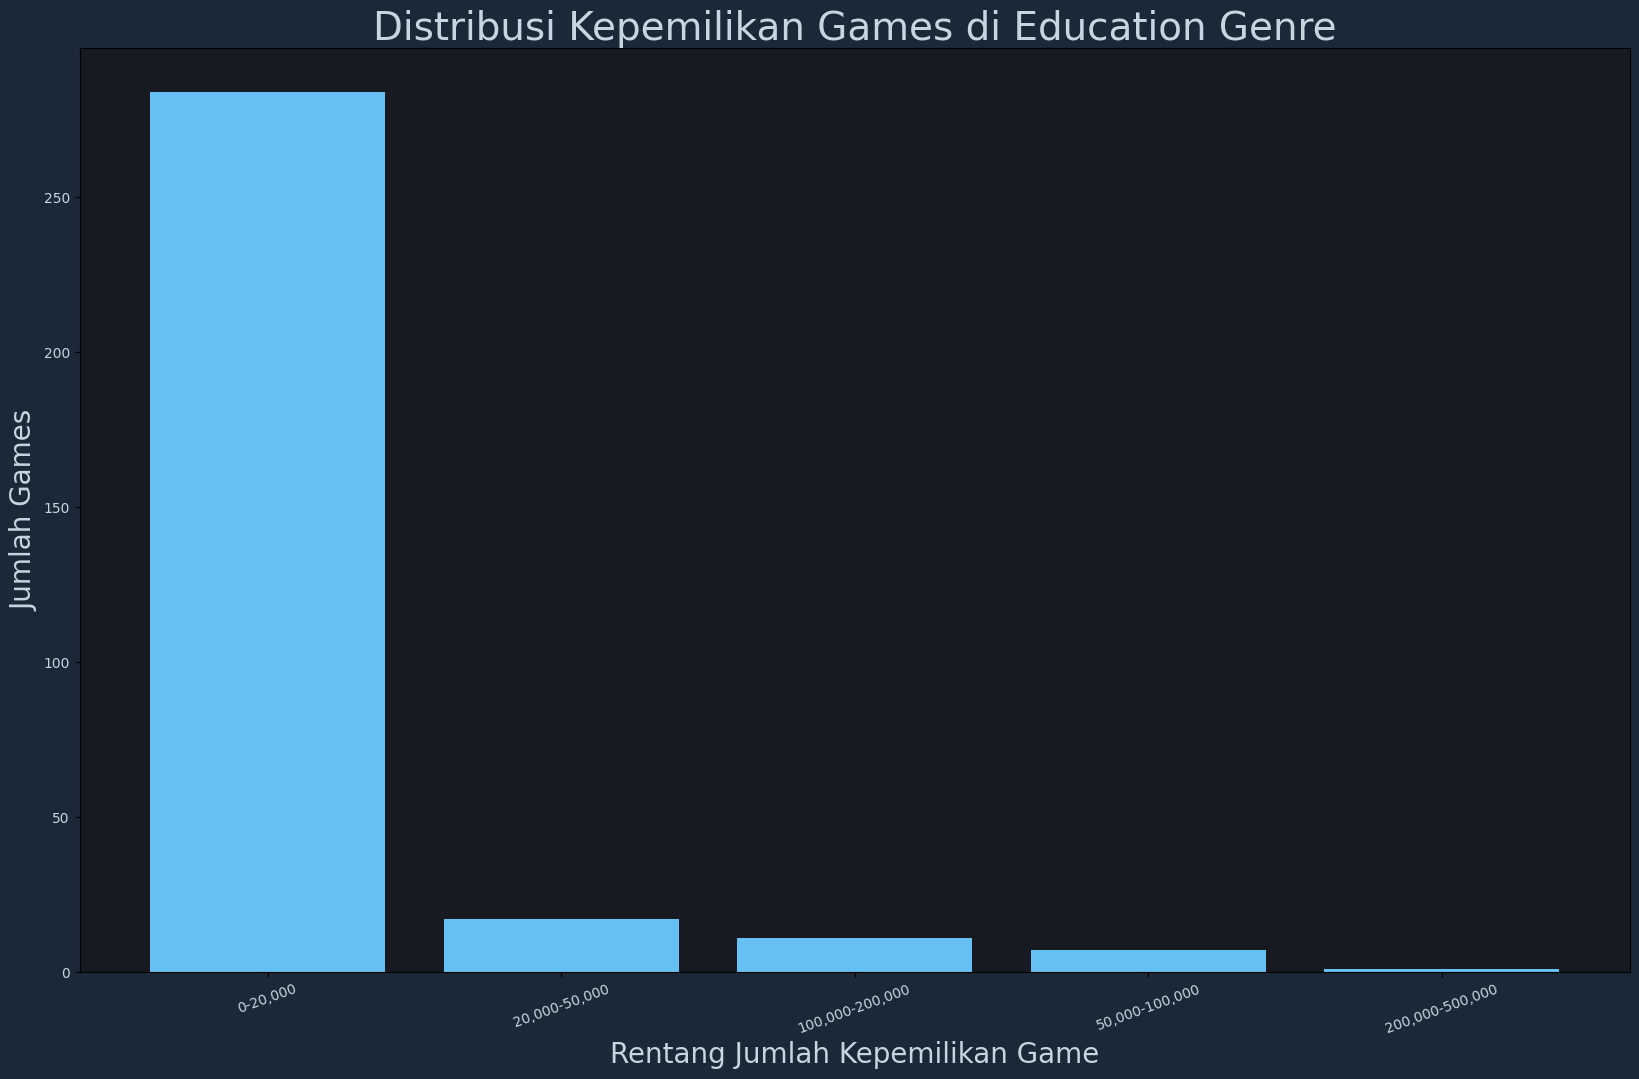

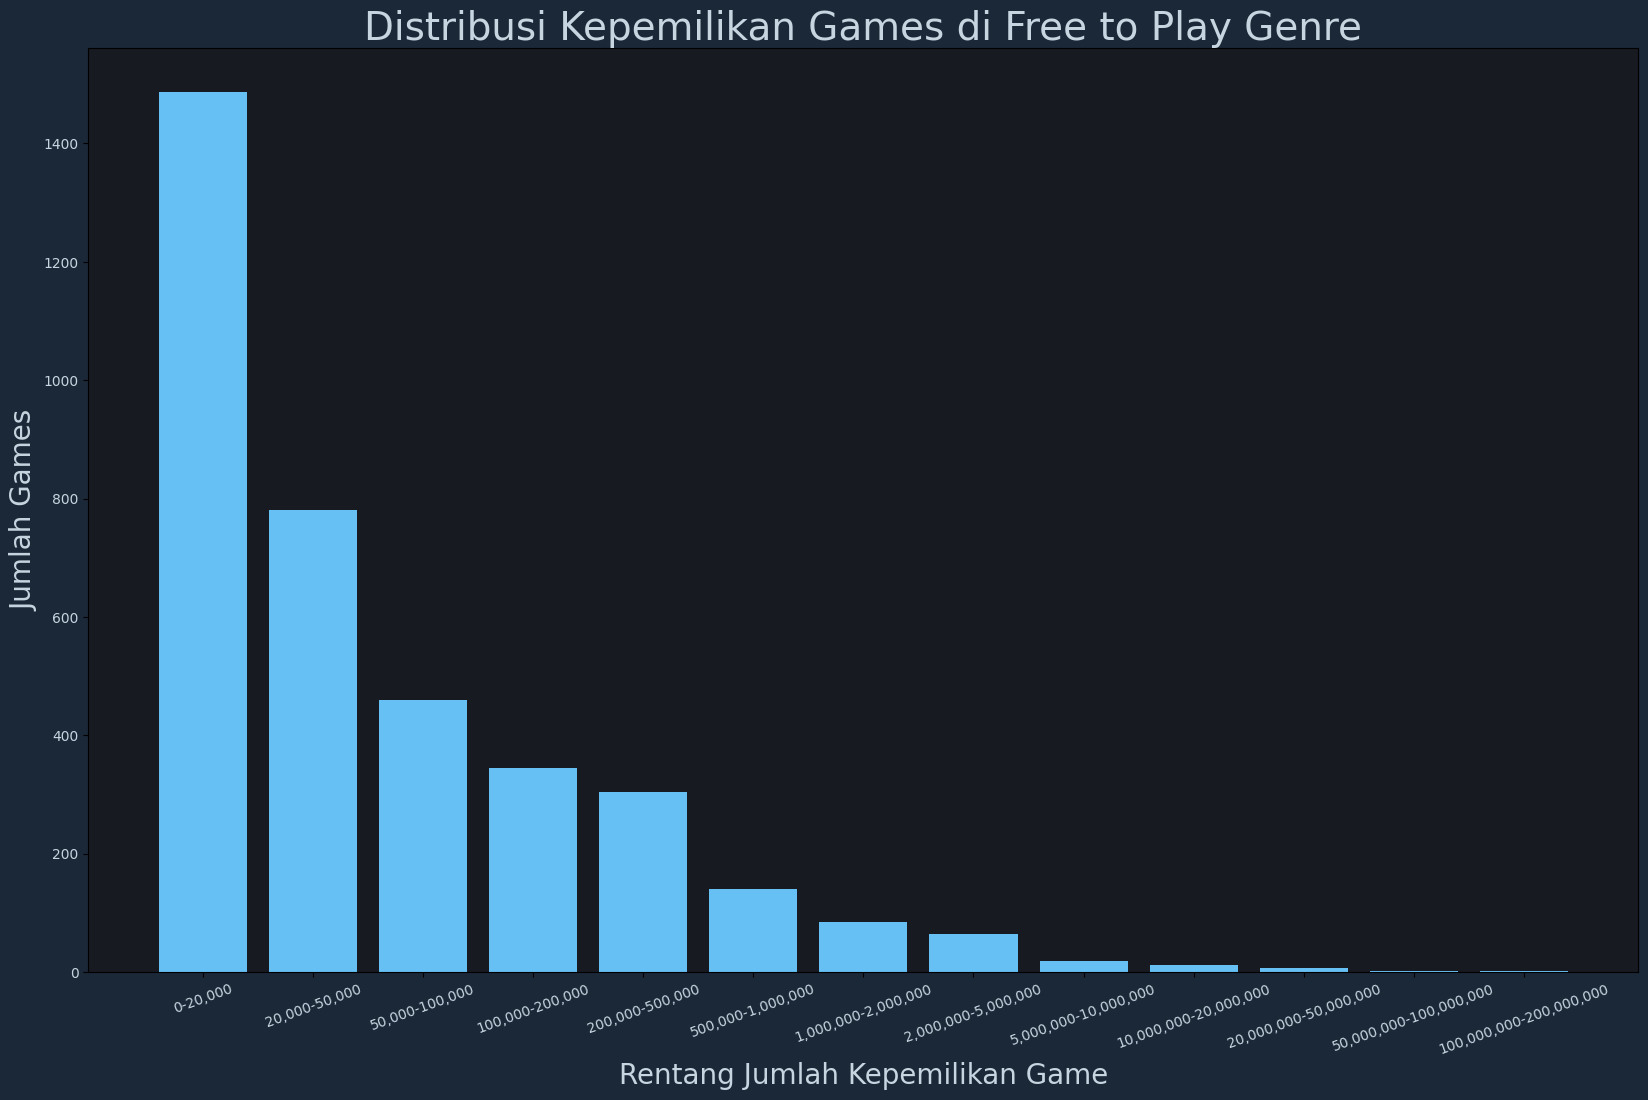

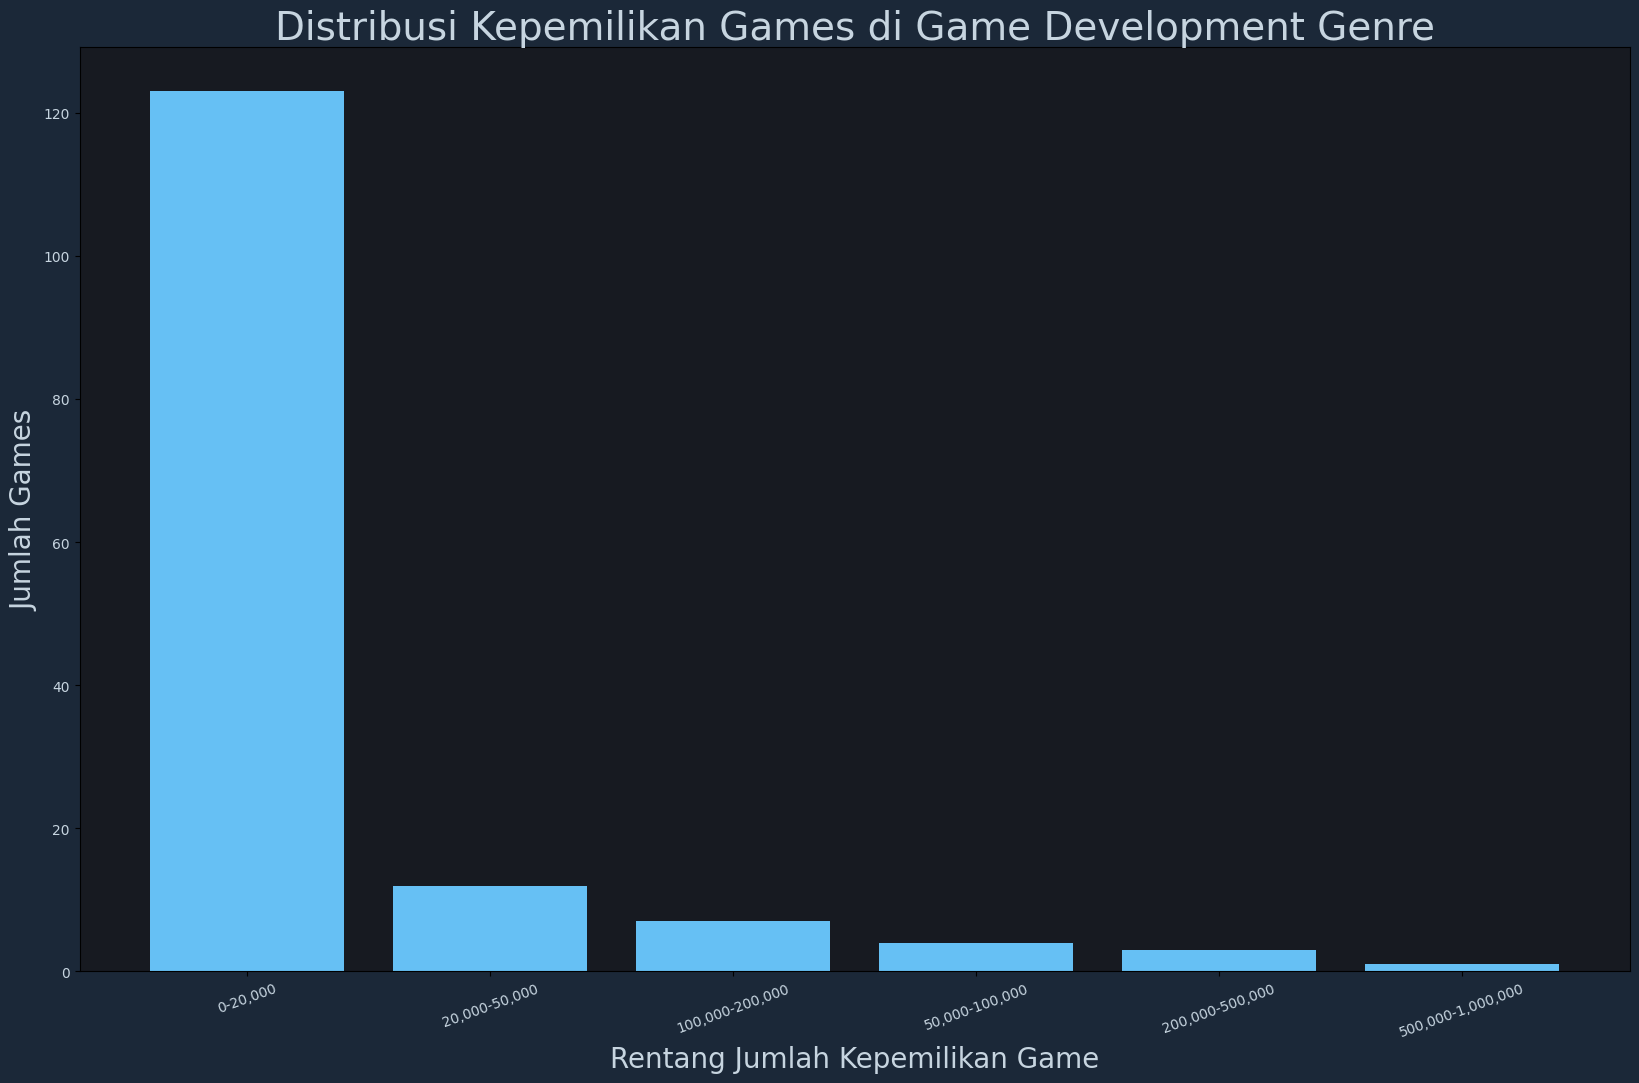

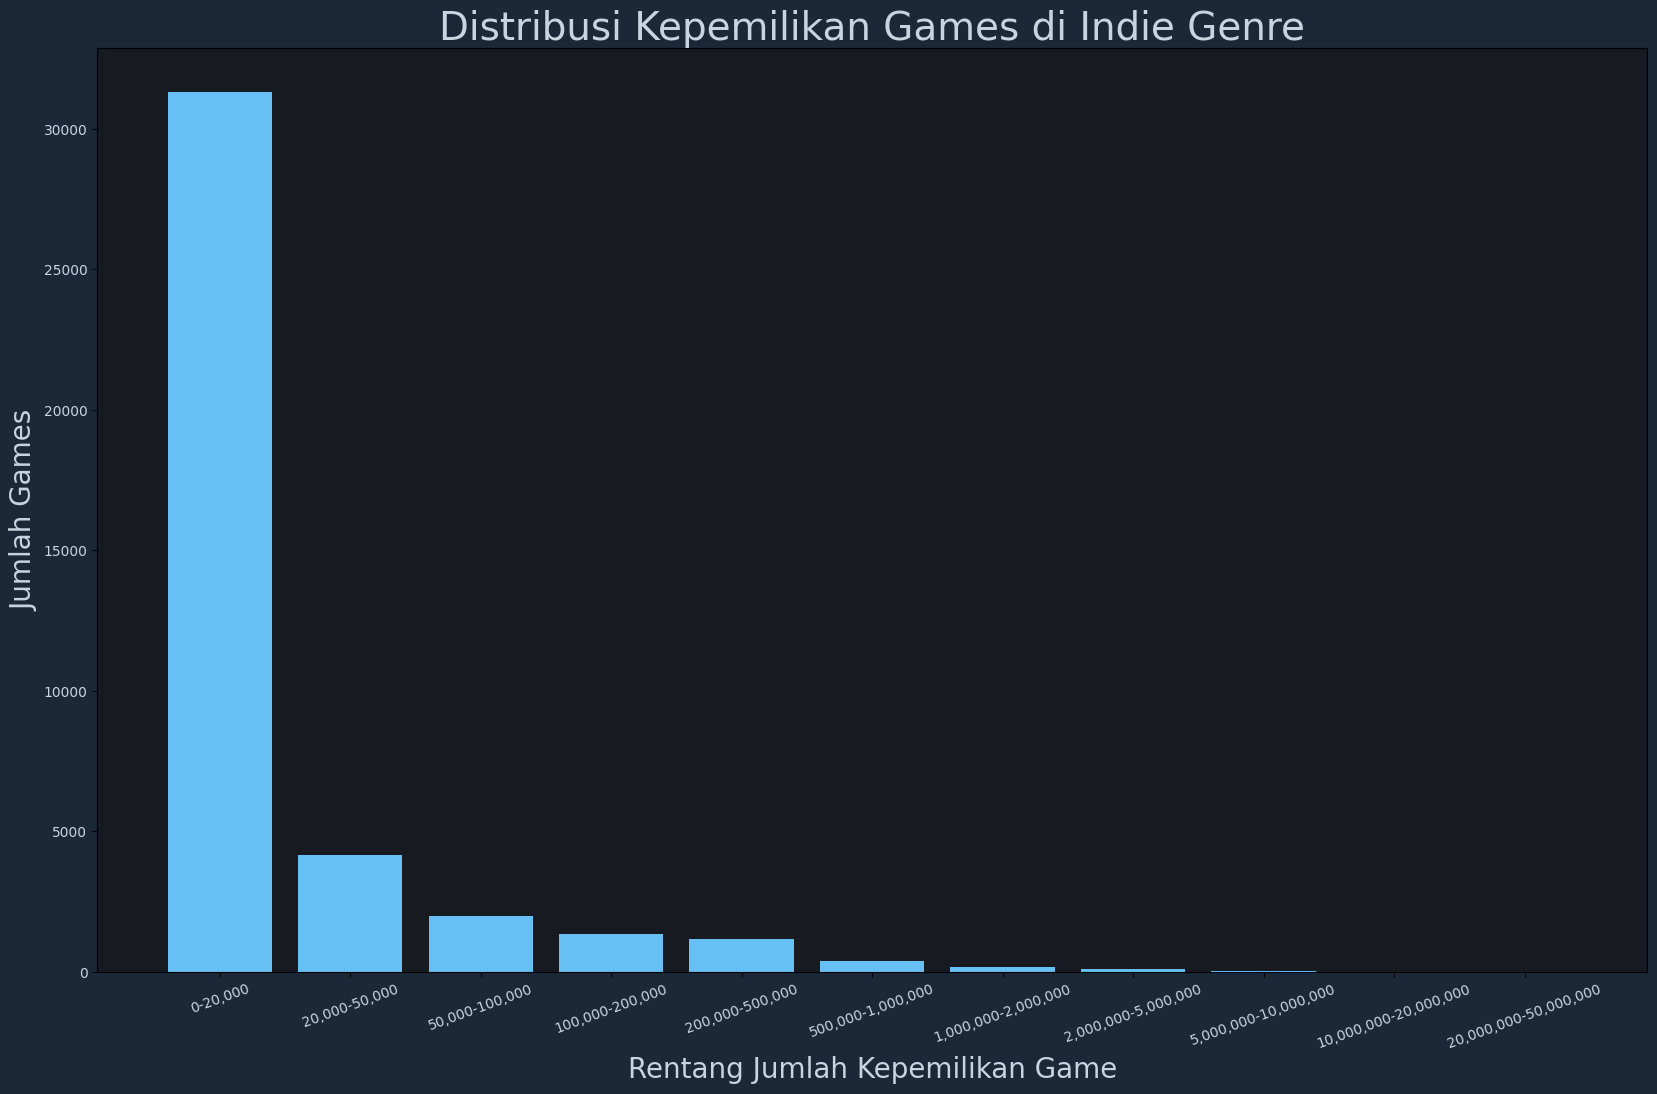

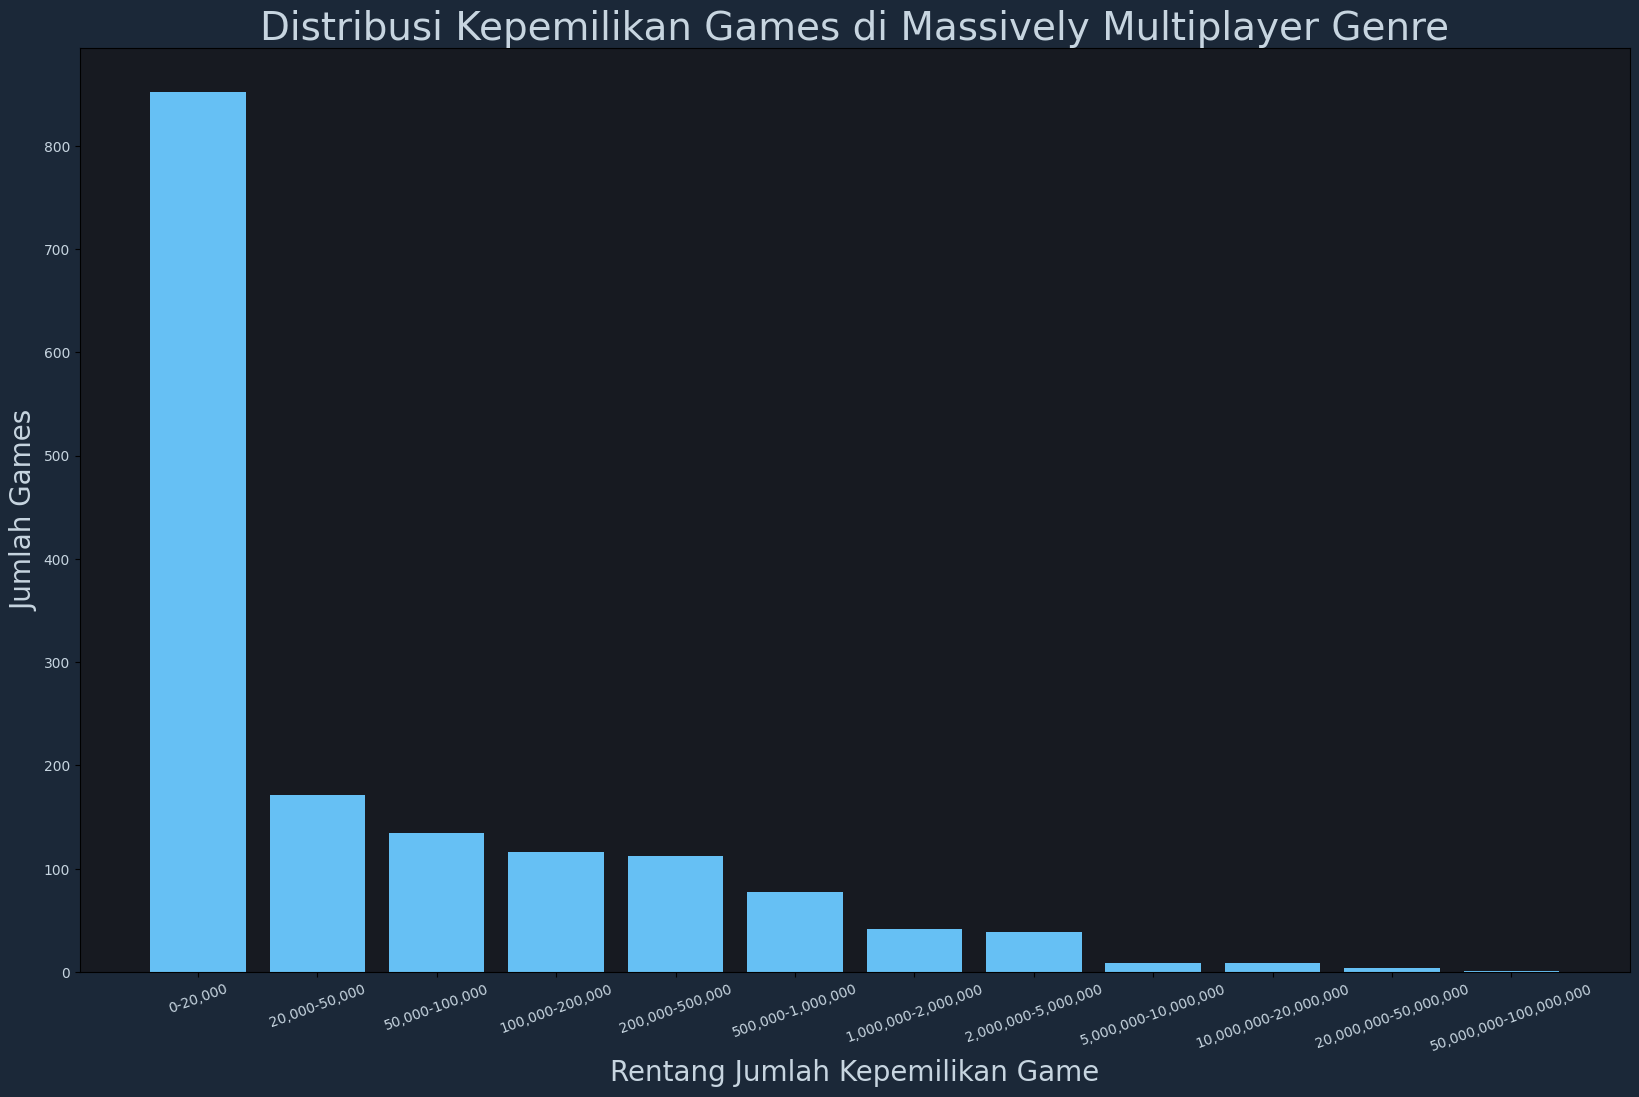

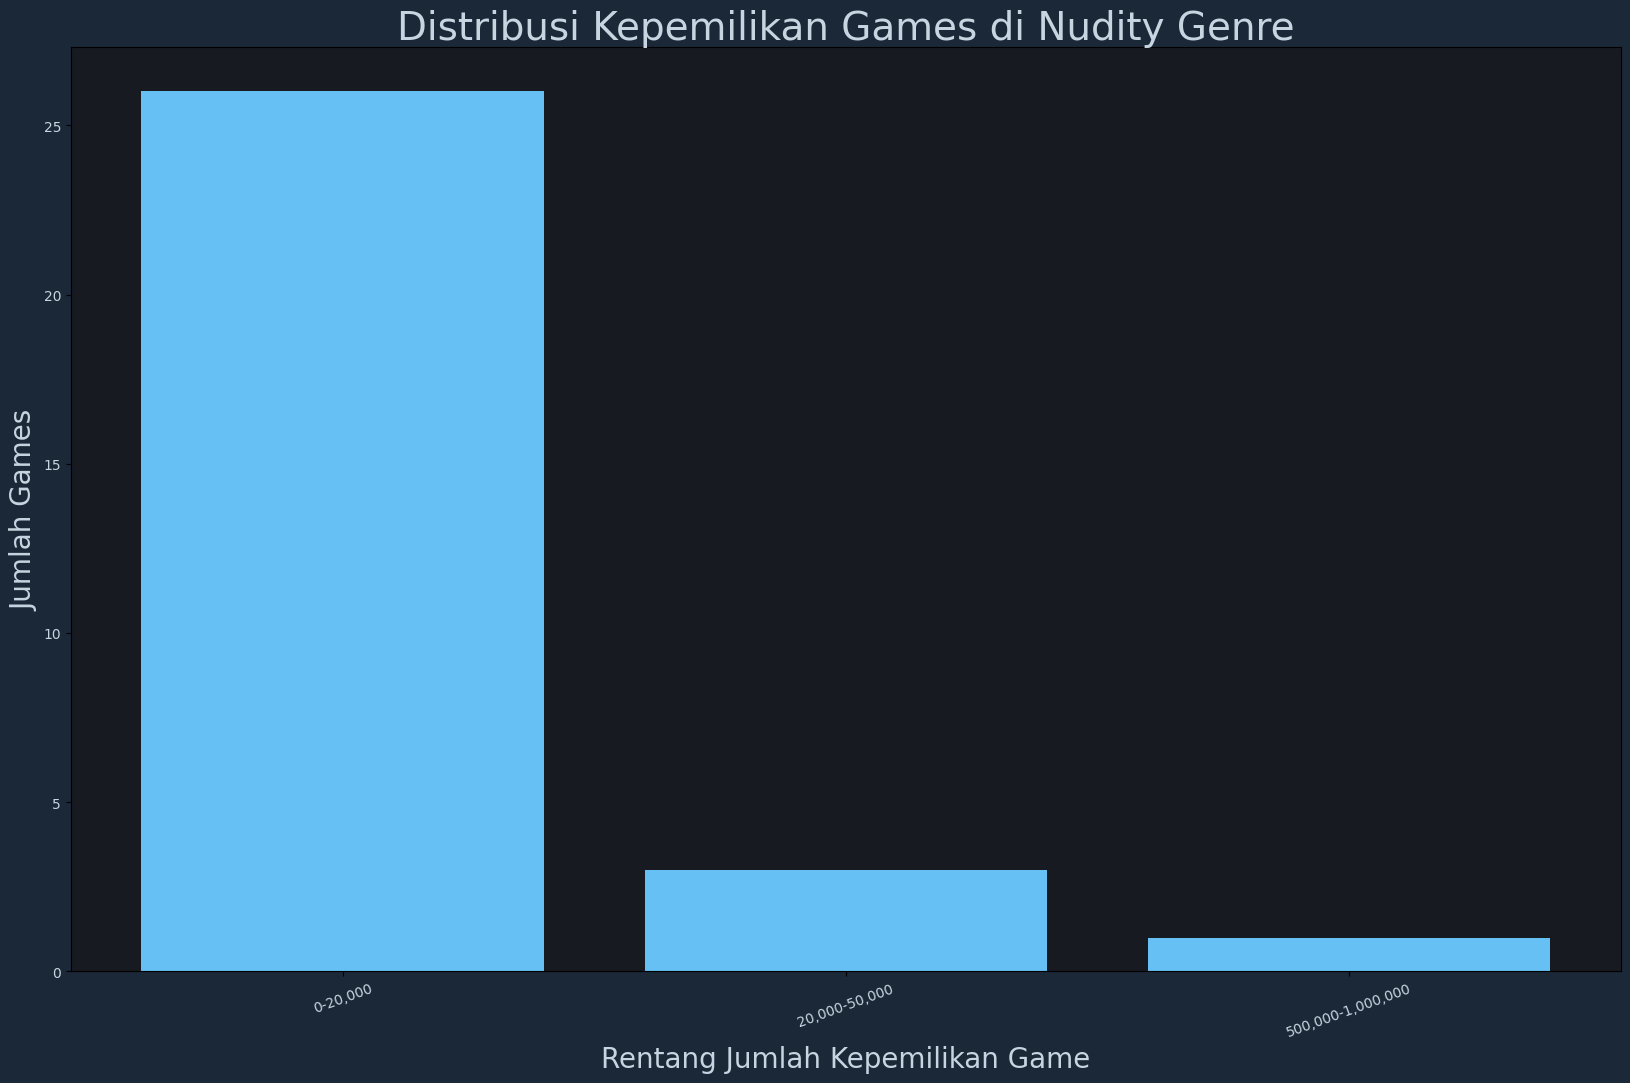

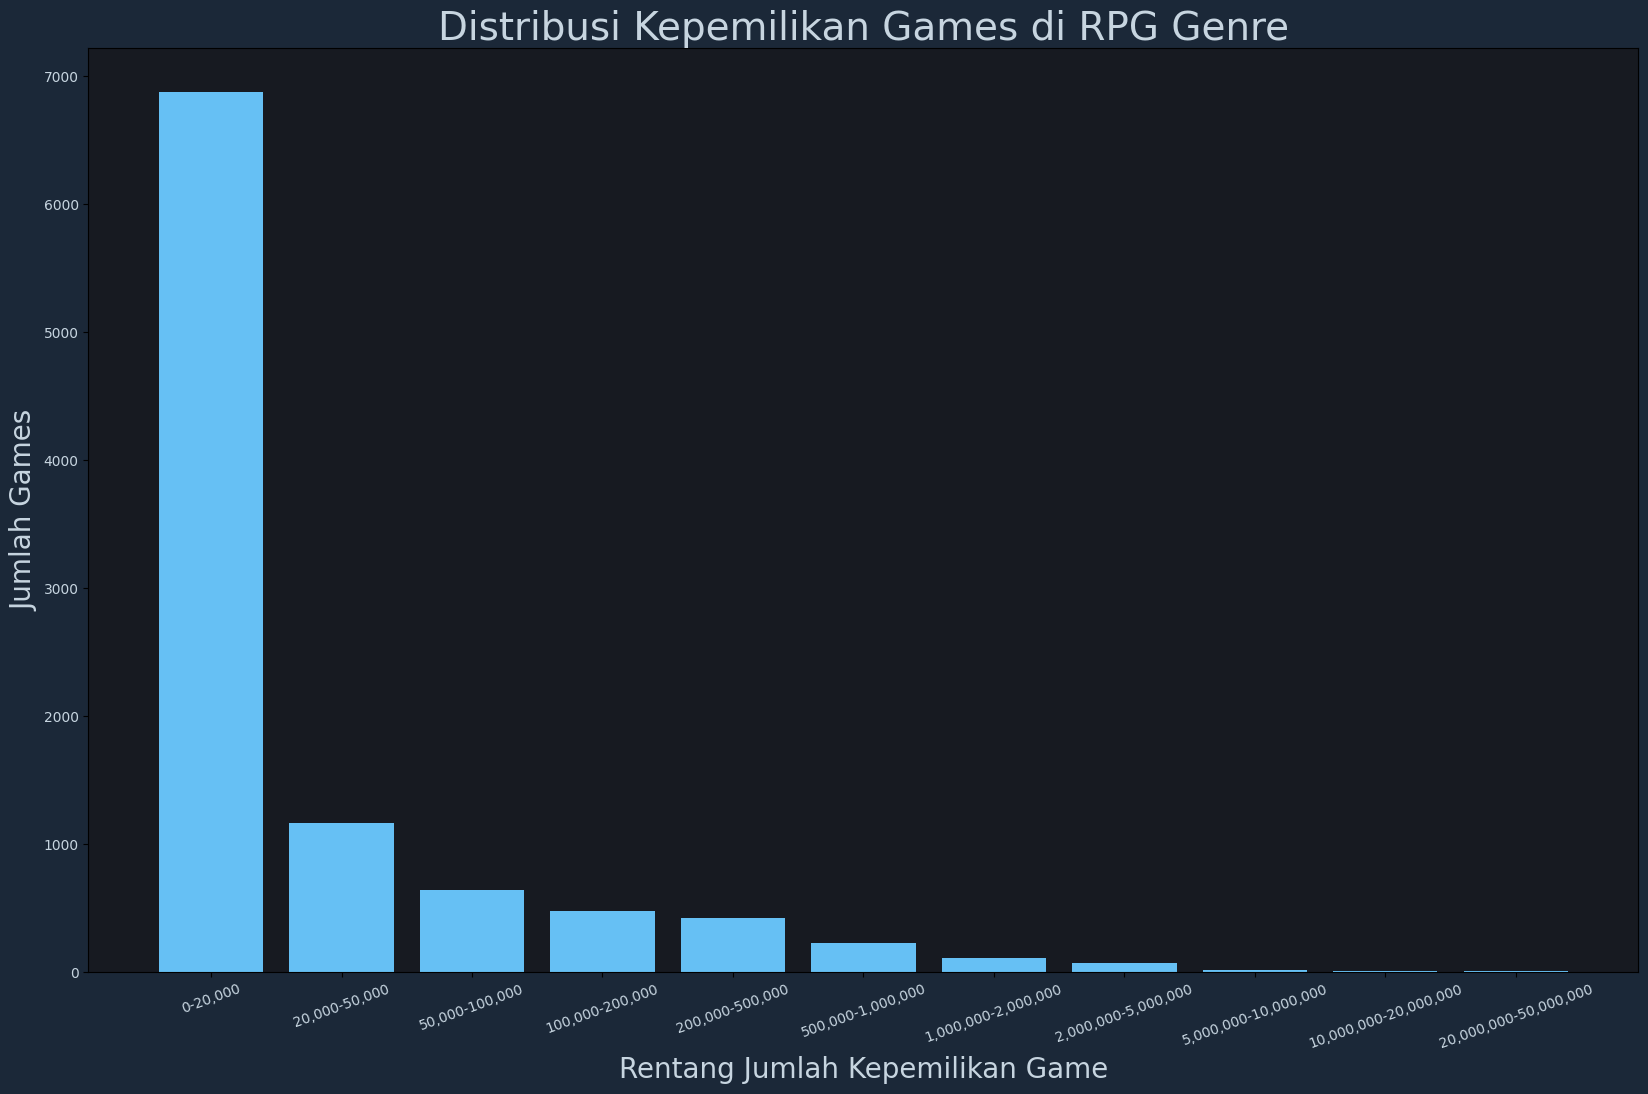

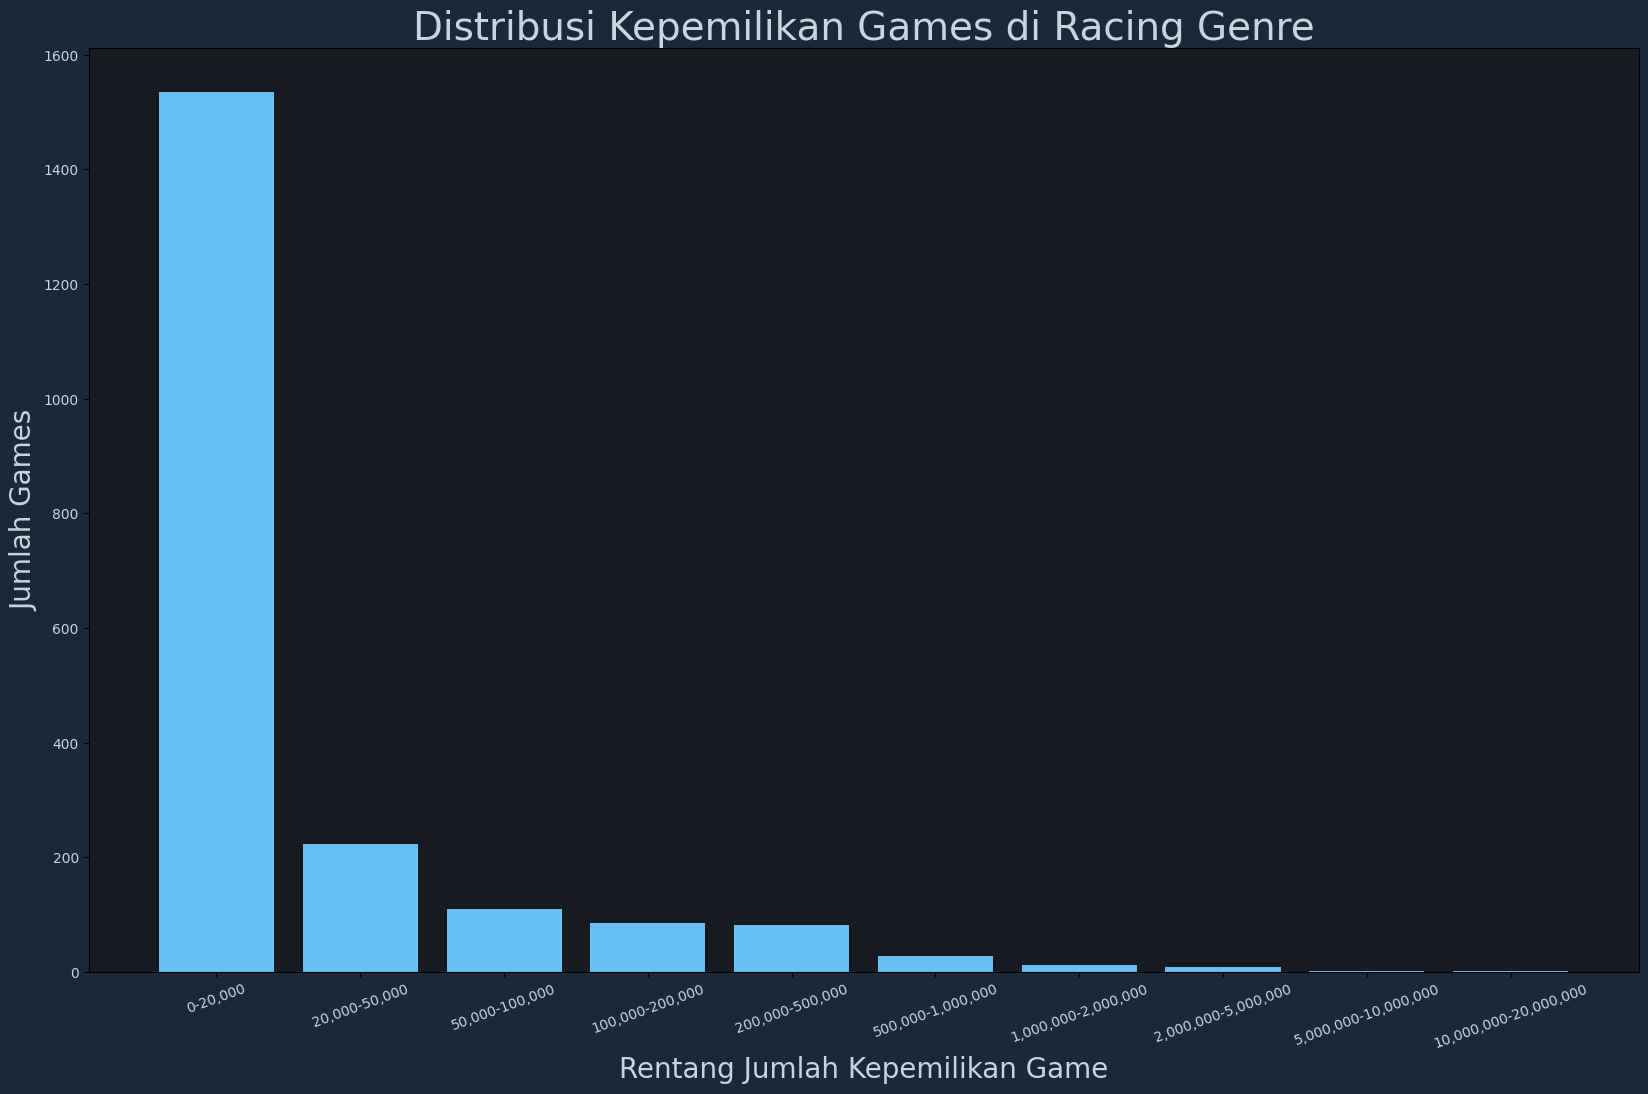

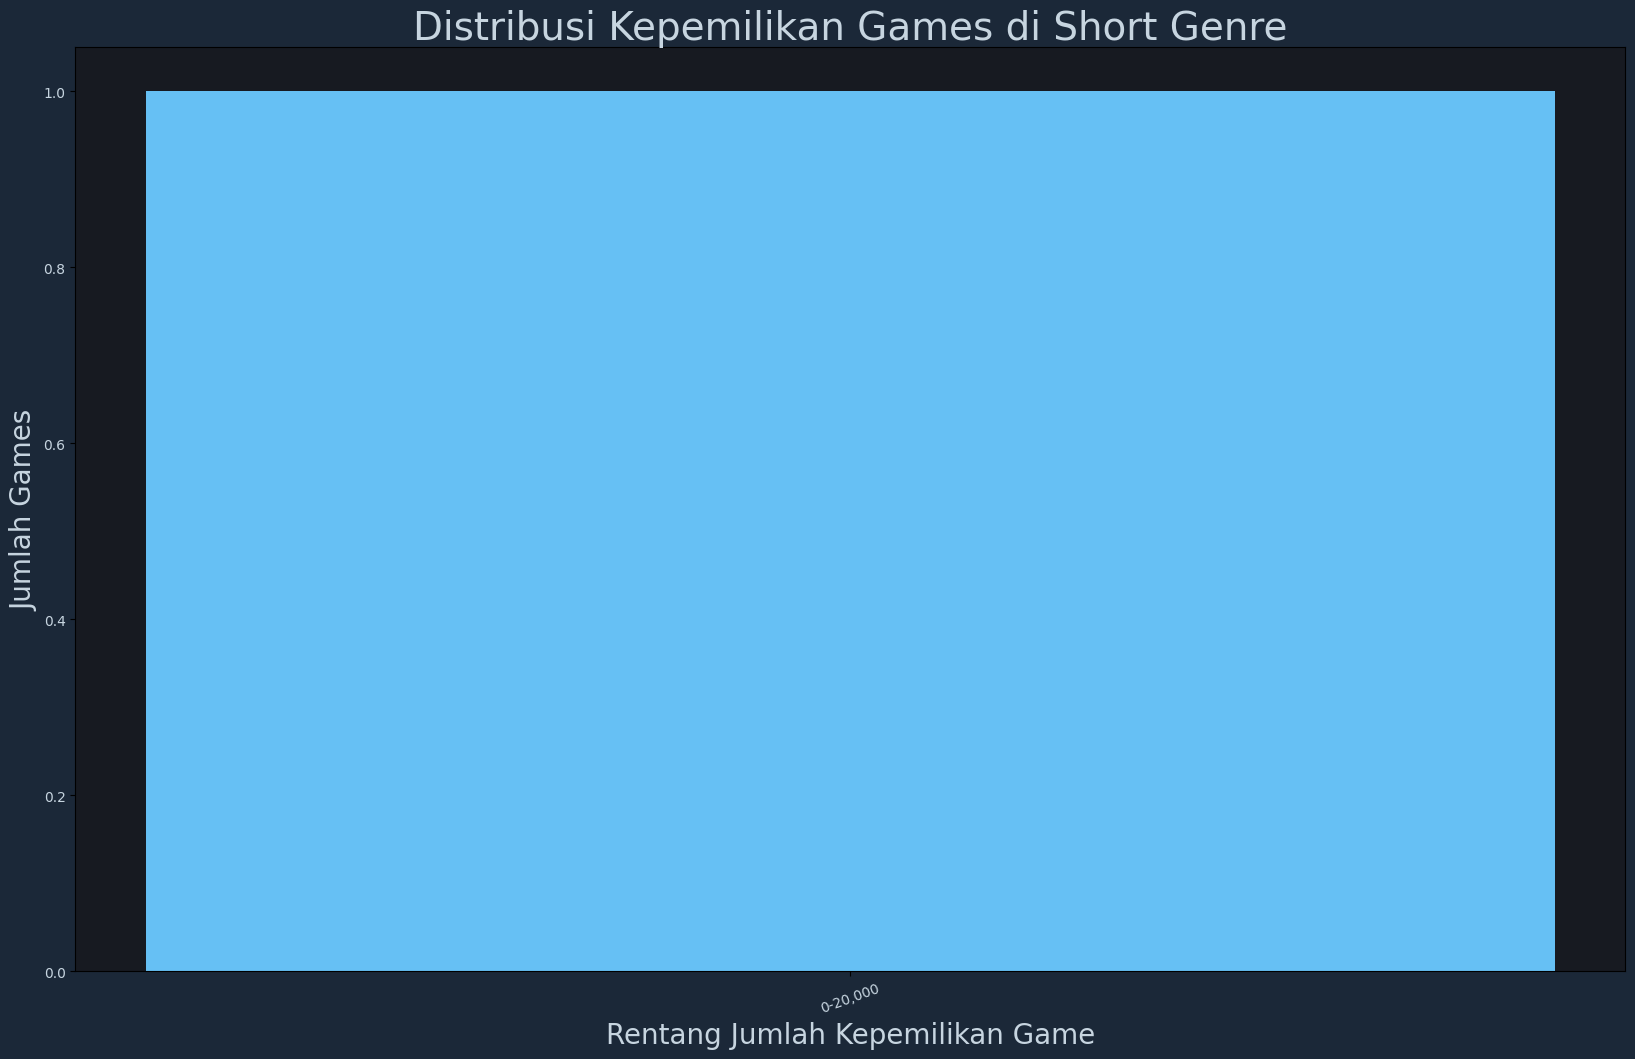

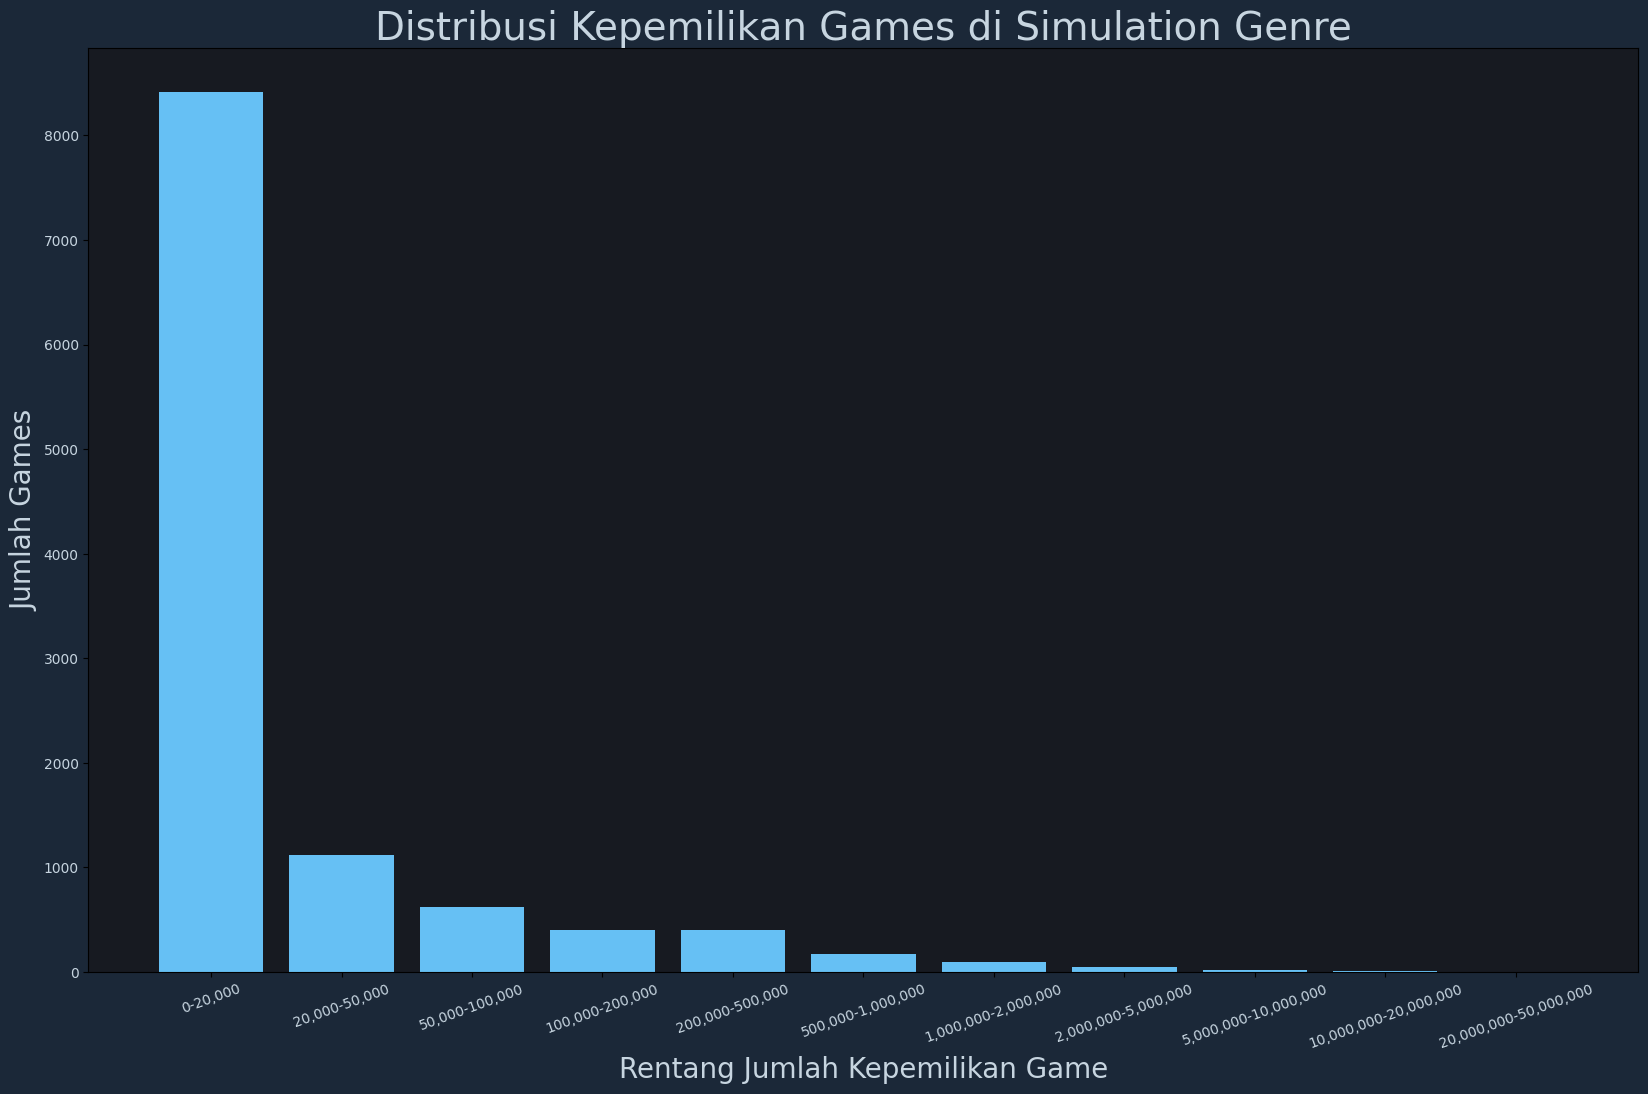

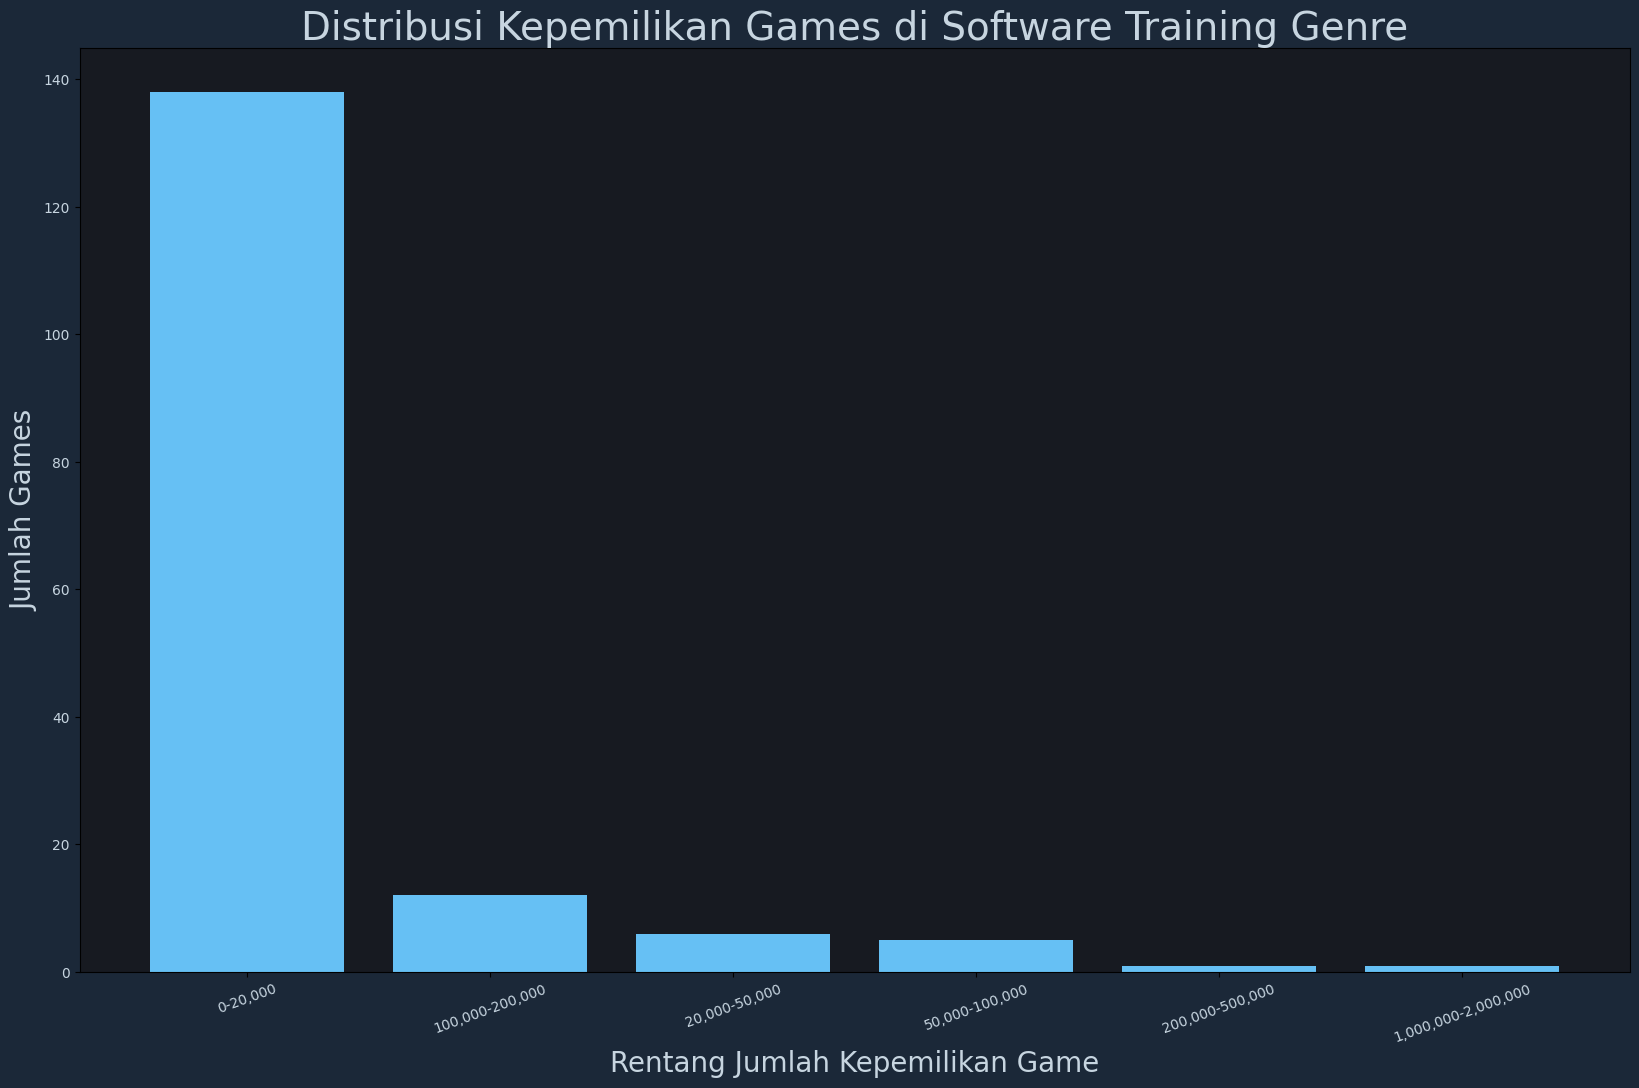

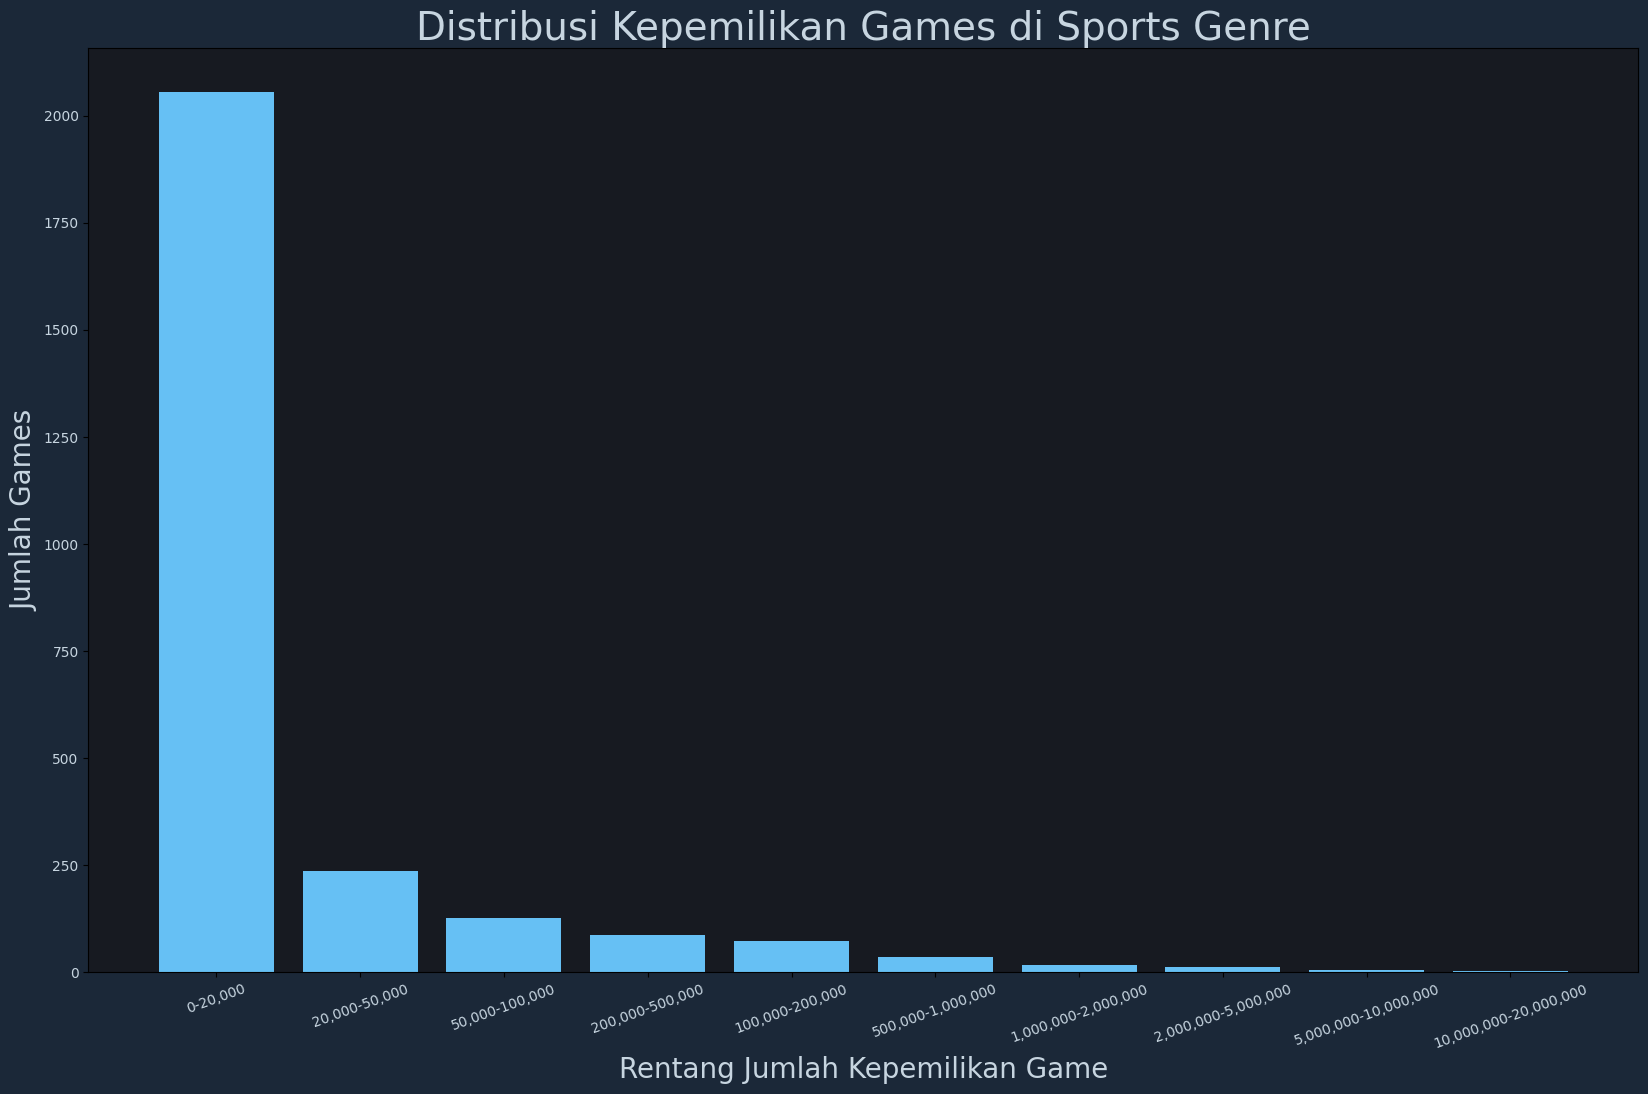

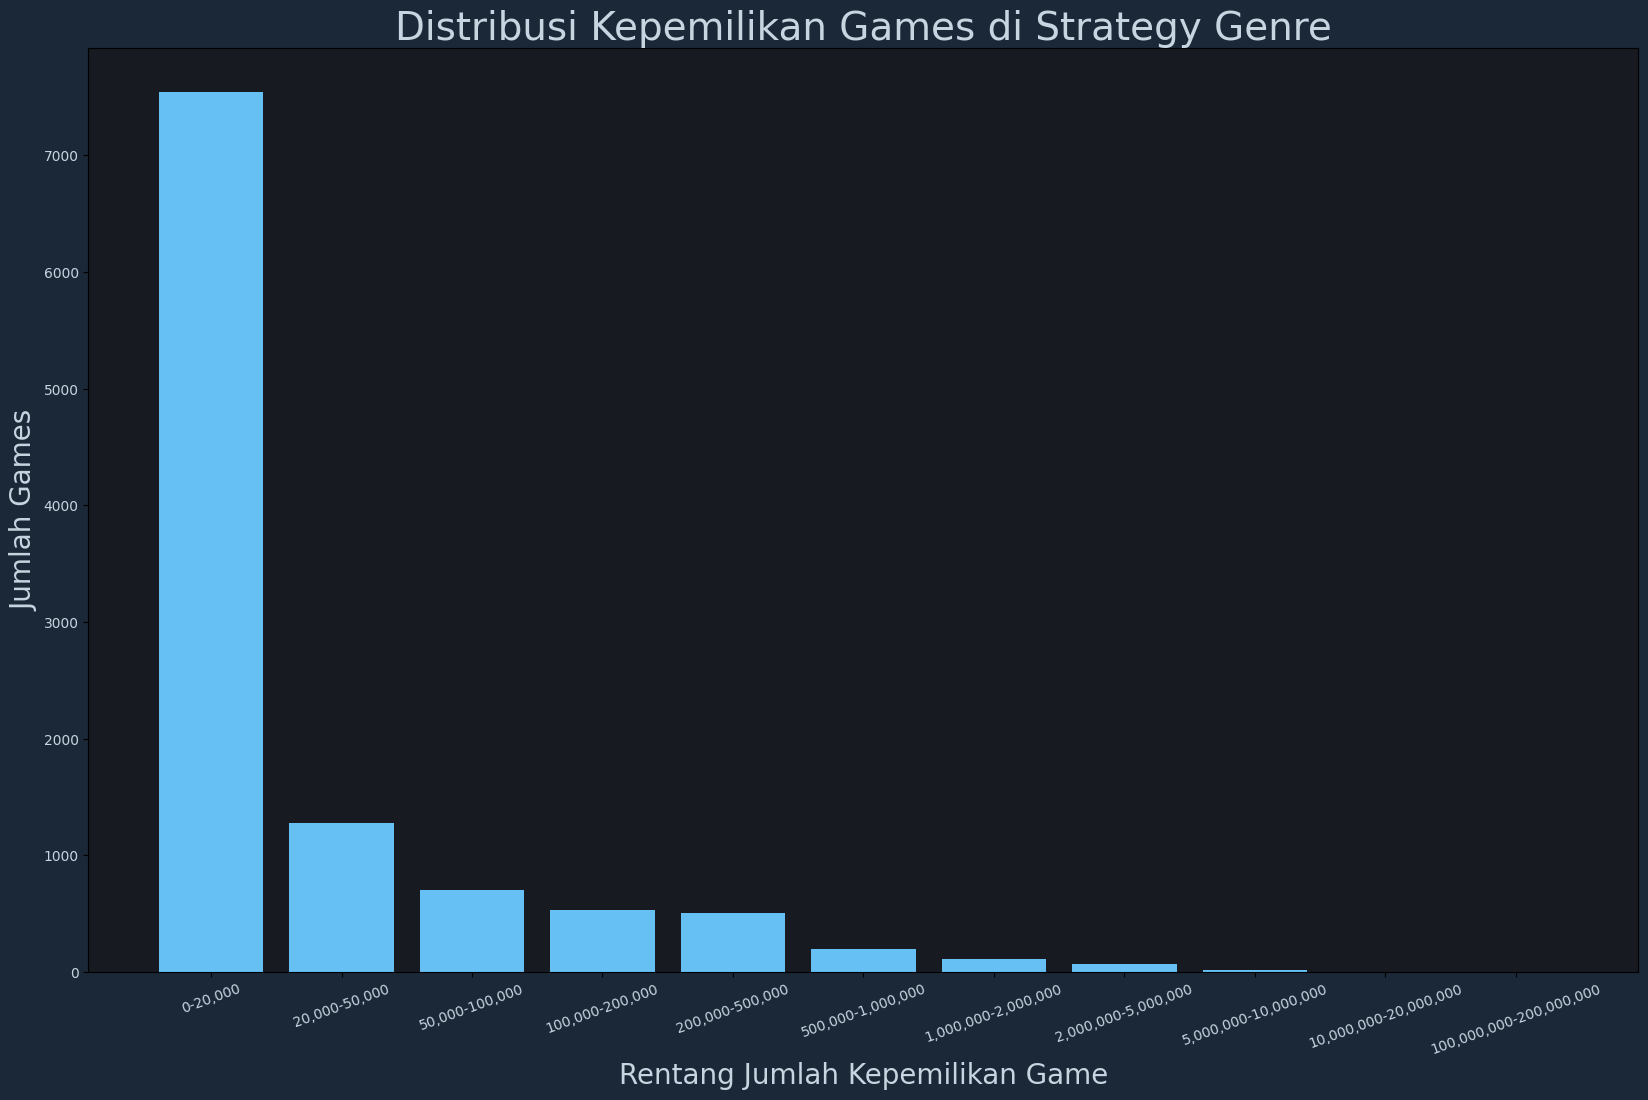

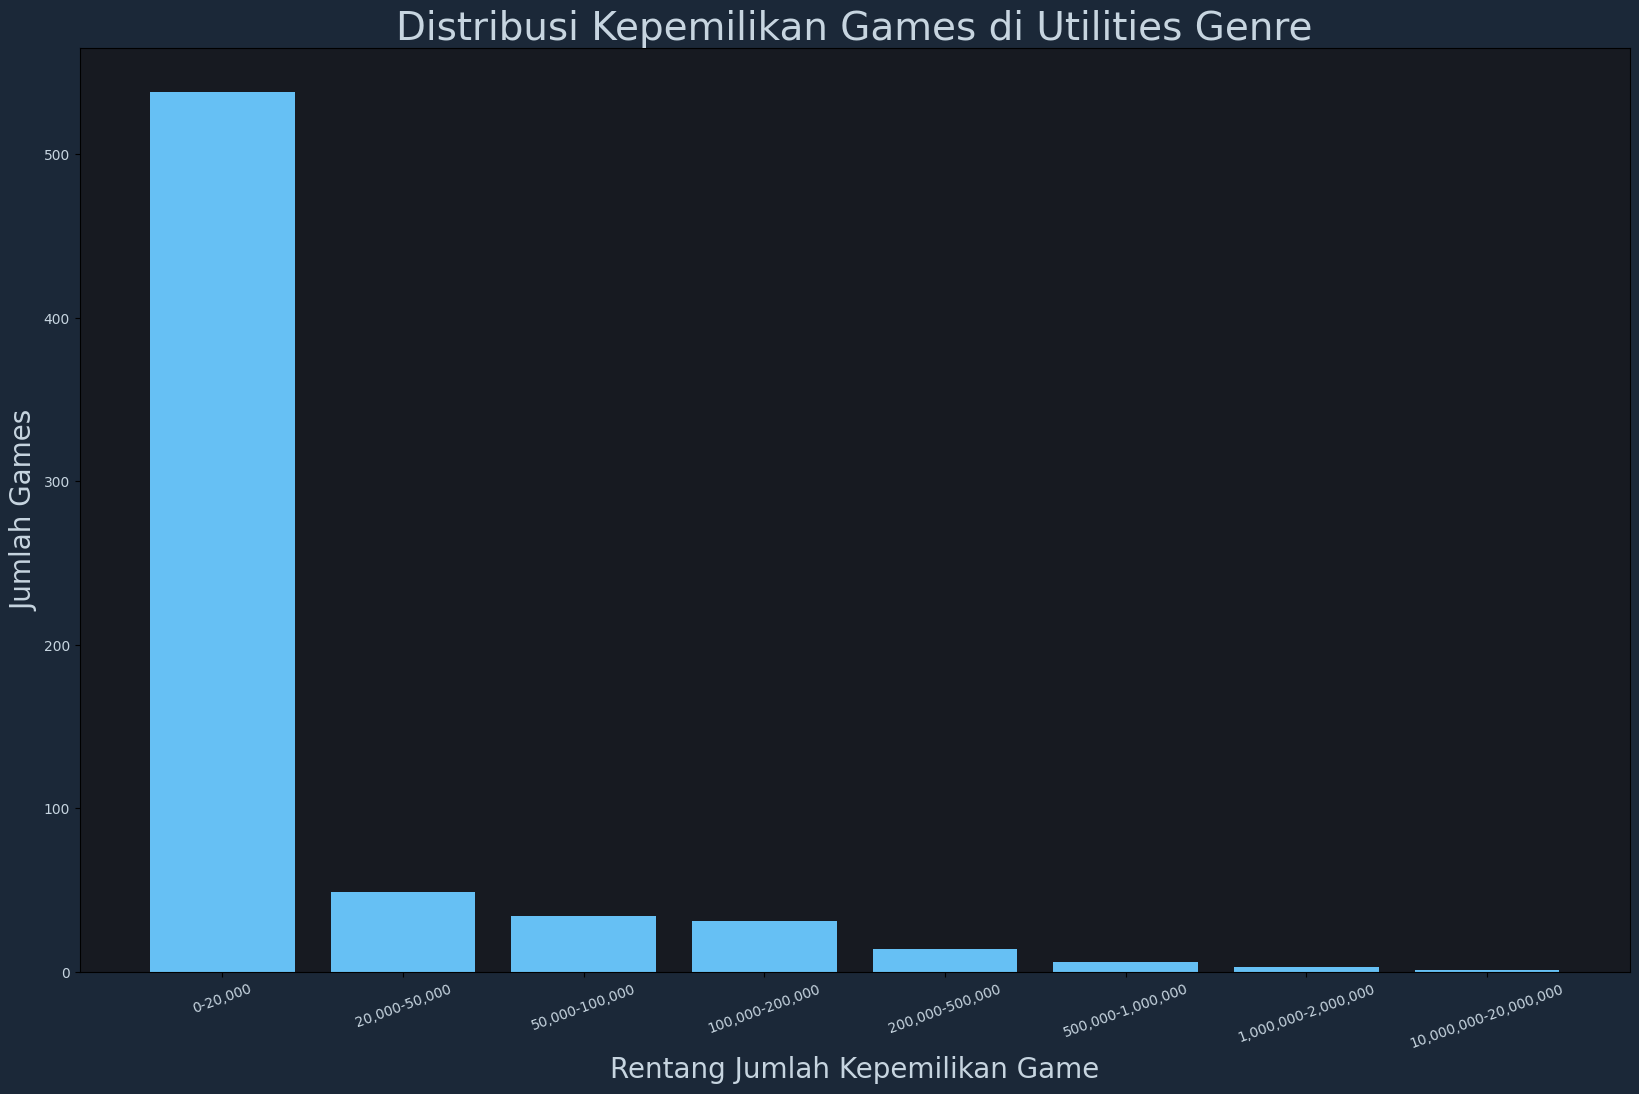

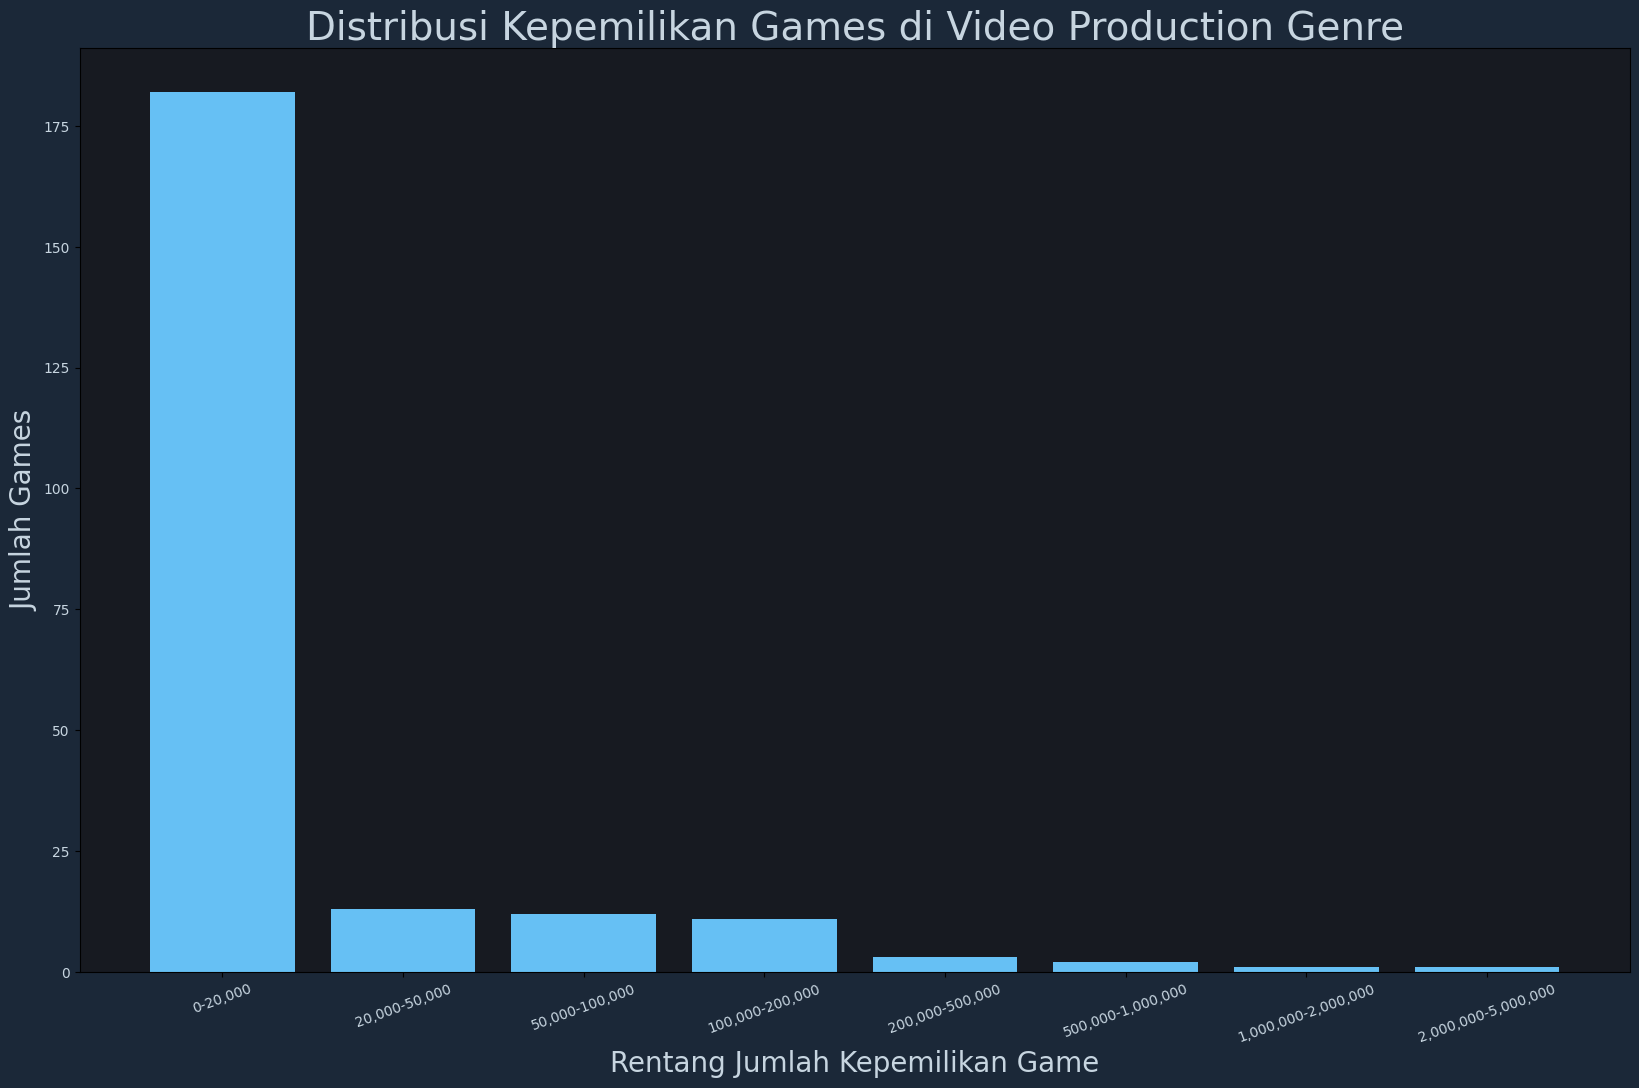

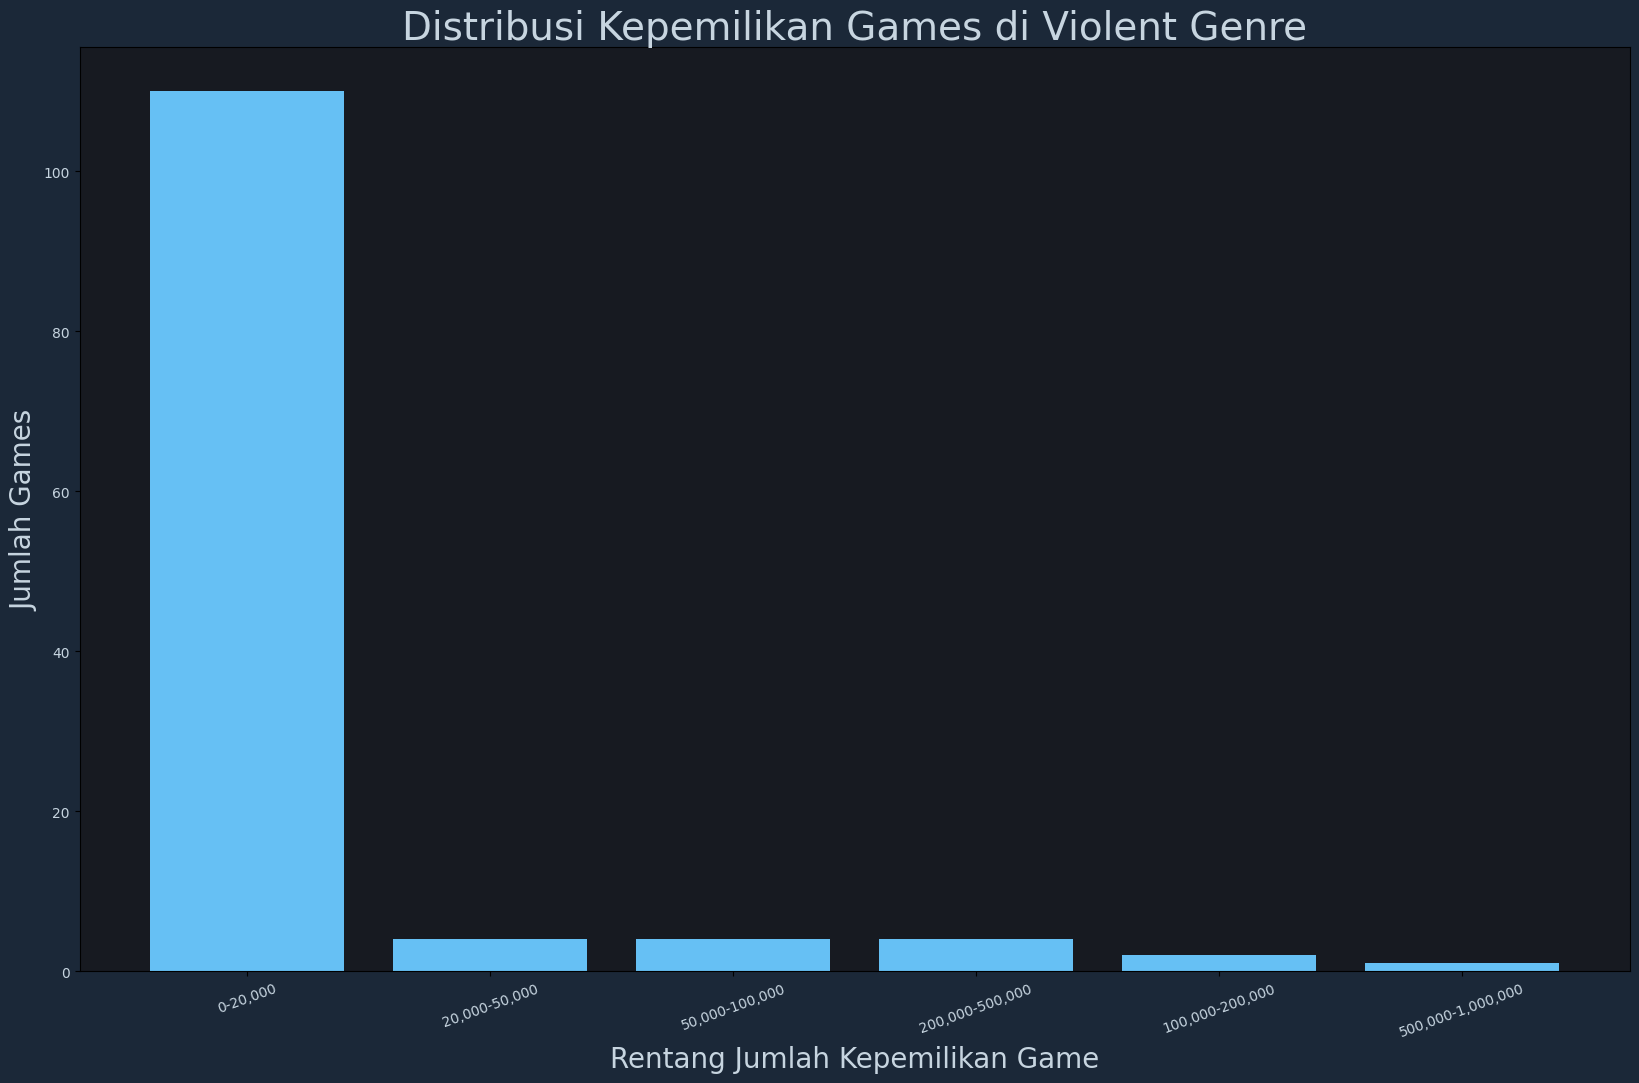

In [30]:
genre_list = list(games.loc[:,'genre_360 V' : 'genre_Web Publishing'].columns)
for genre in genre_list:
    if games[genre].sum() < 100:
        genre_list.remove(genre)
for genre in genre_list:
    generate_top_values(games[games[genre] > 0]['owners'], xlabel = 'Rentang Jumlah Kepemilikan Game', ylabel = 'Jumlah Games', title = f'Distribusi Kepemilikan Games di {str(genre[6:])} Genre', x_rot = 20)

C:\Users\ASUS ExpertBook\AppData\Local\Temp\ipykernel_10368\1424465716.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(20,12))


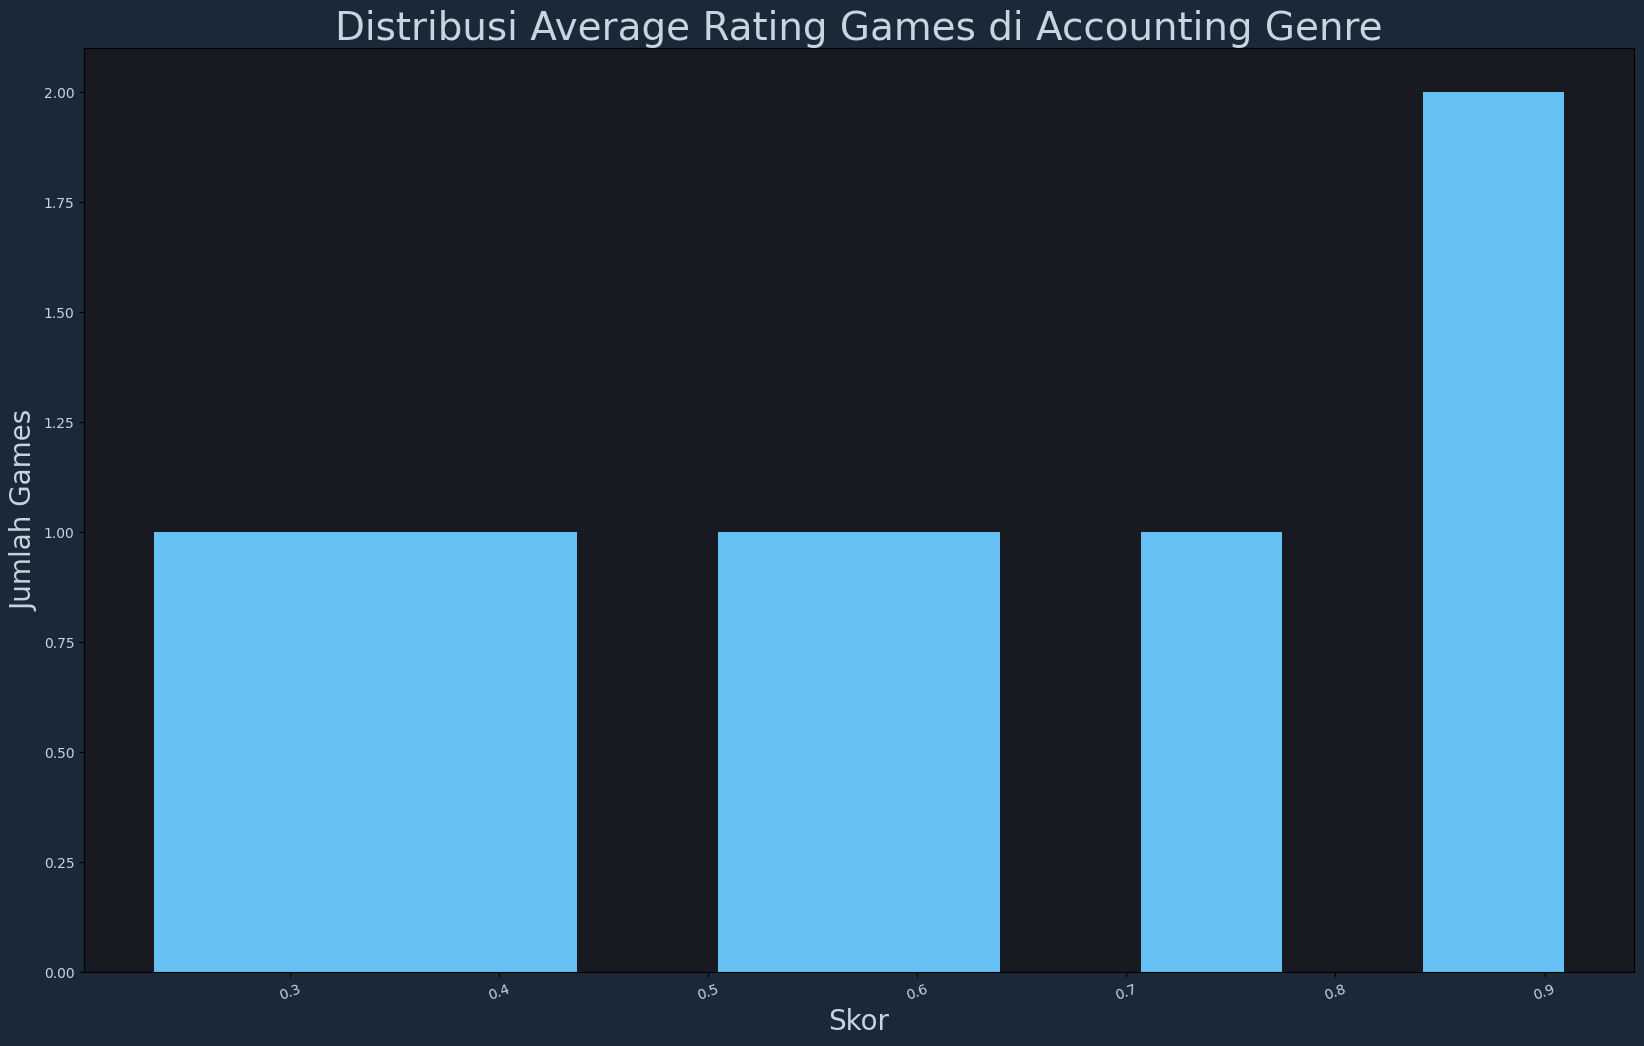

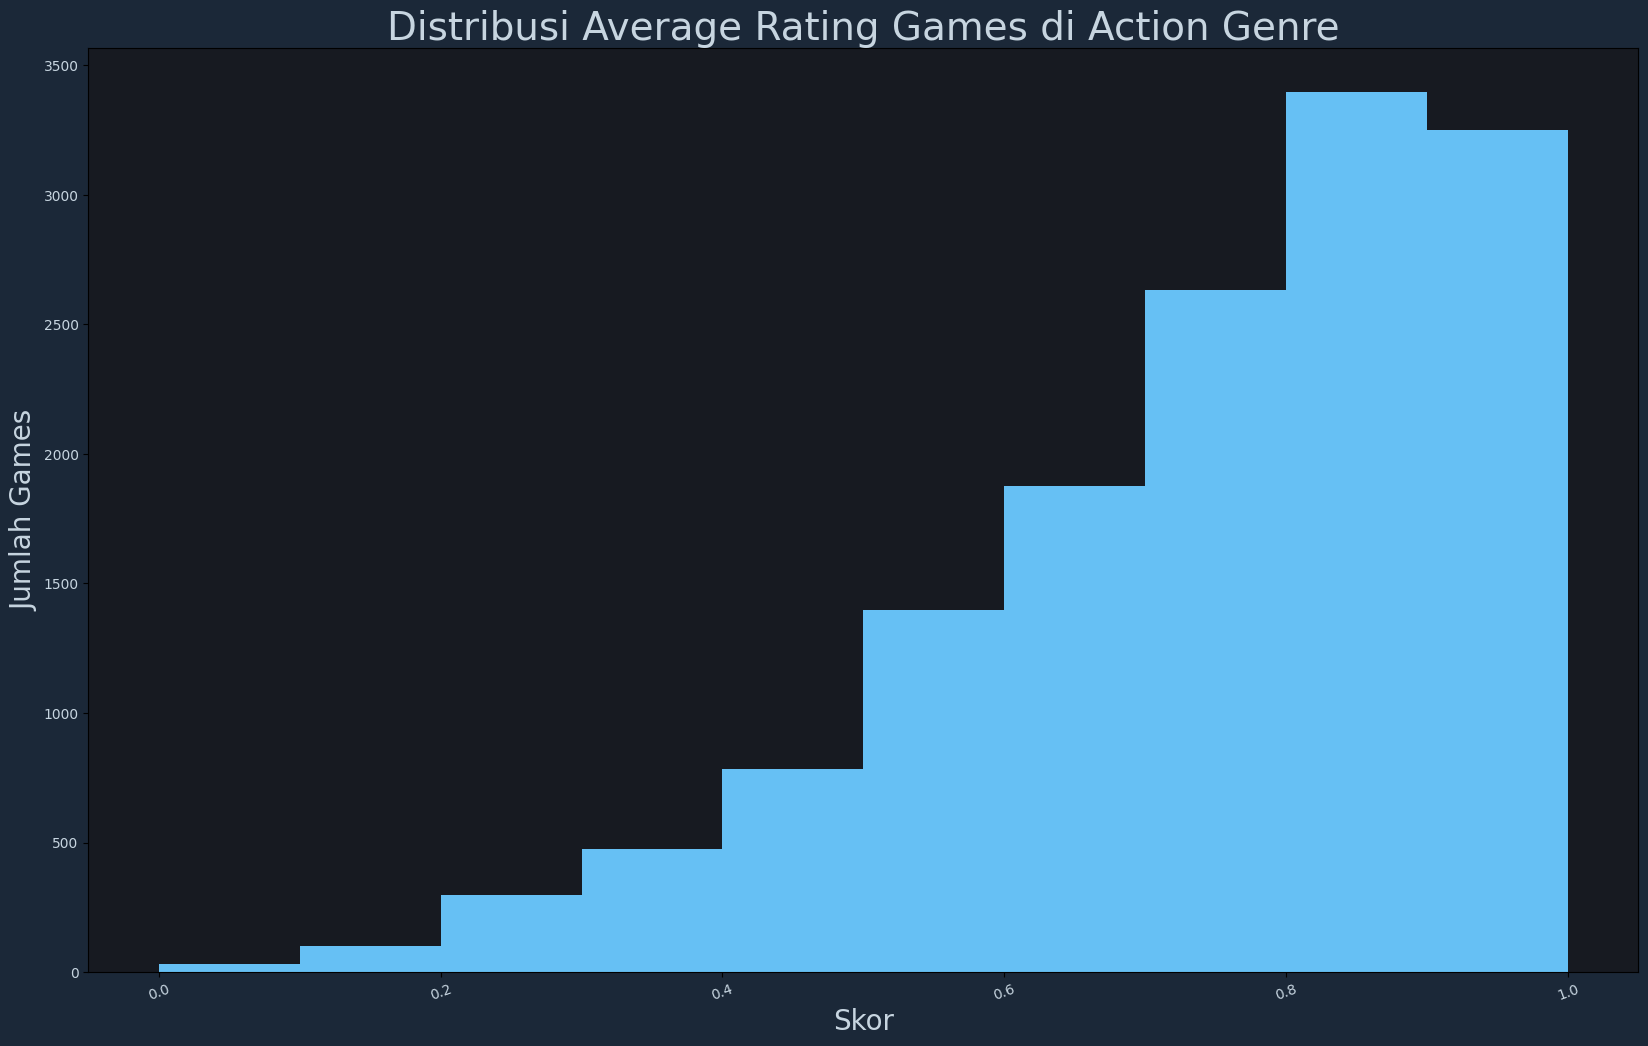

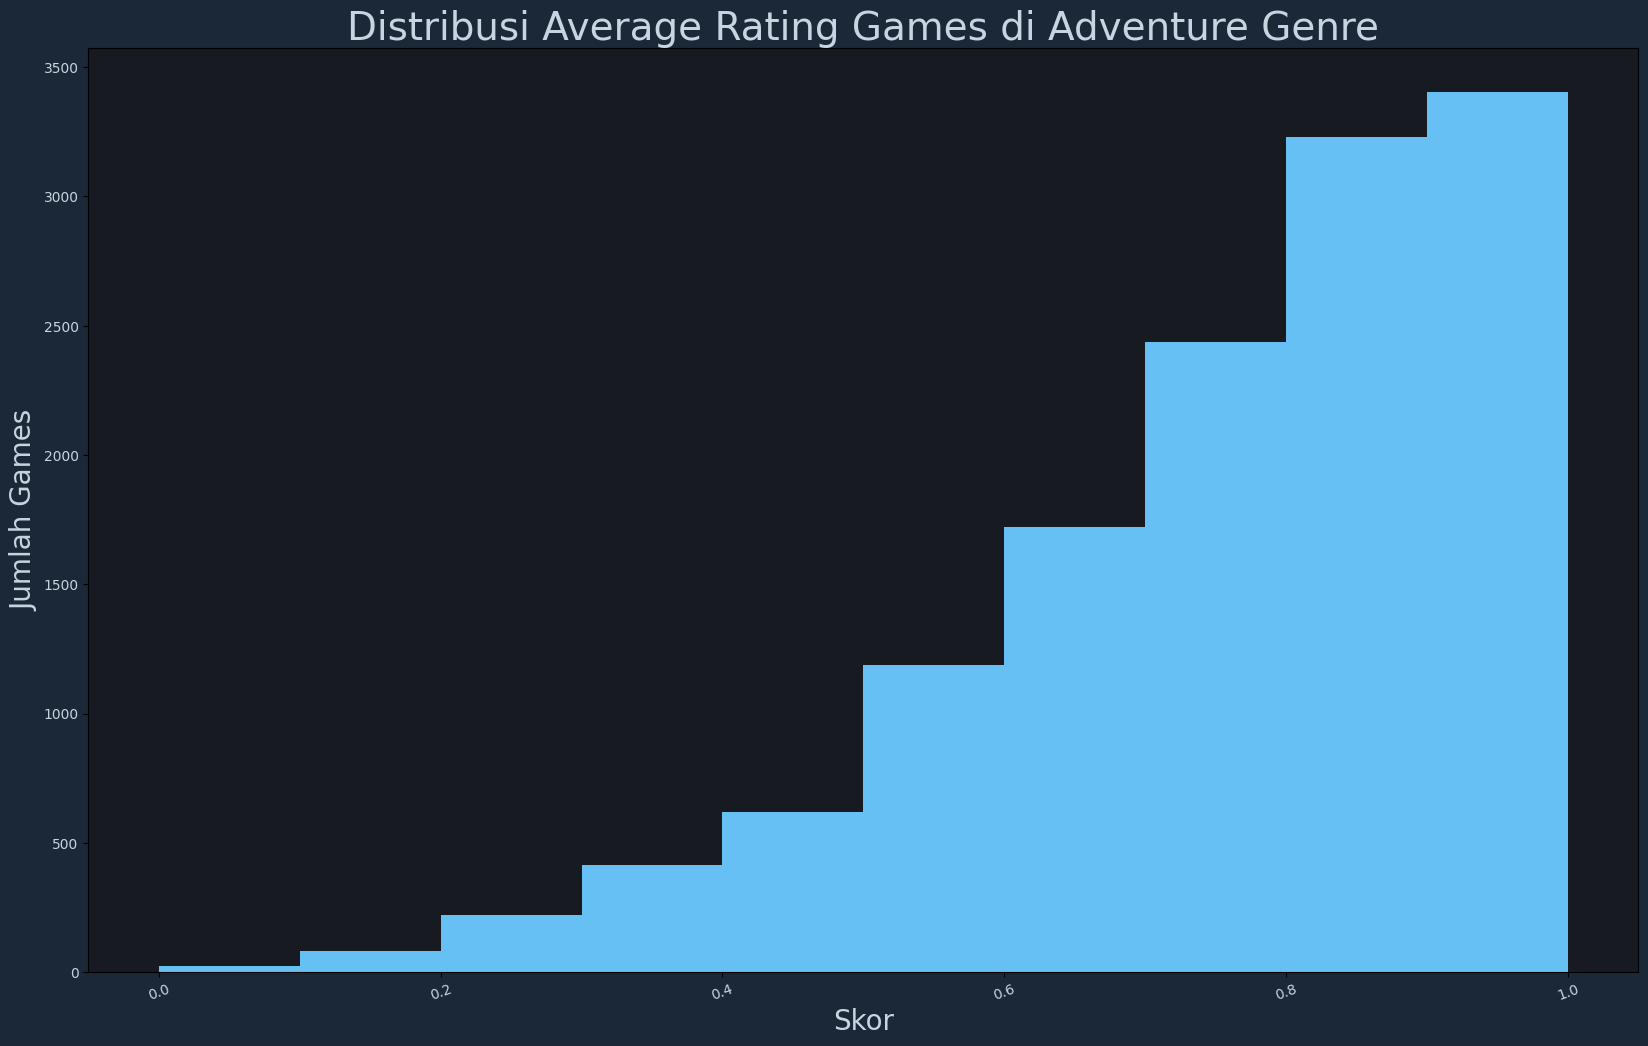

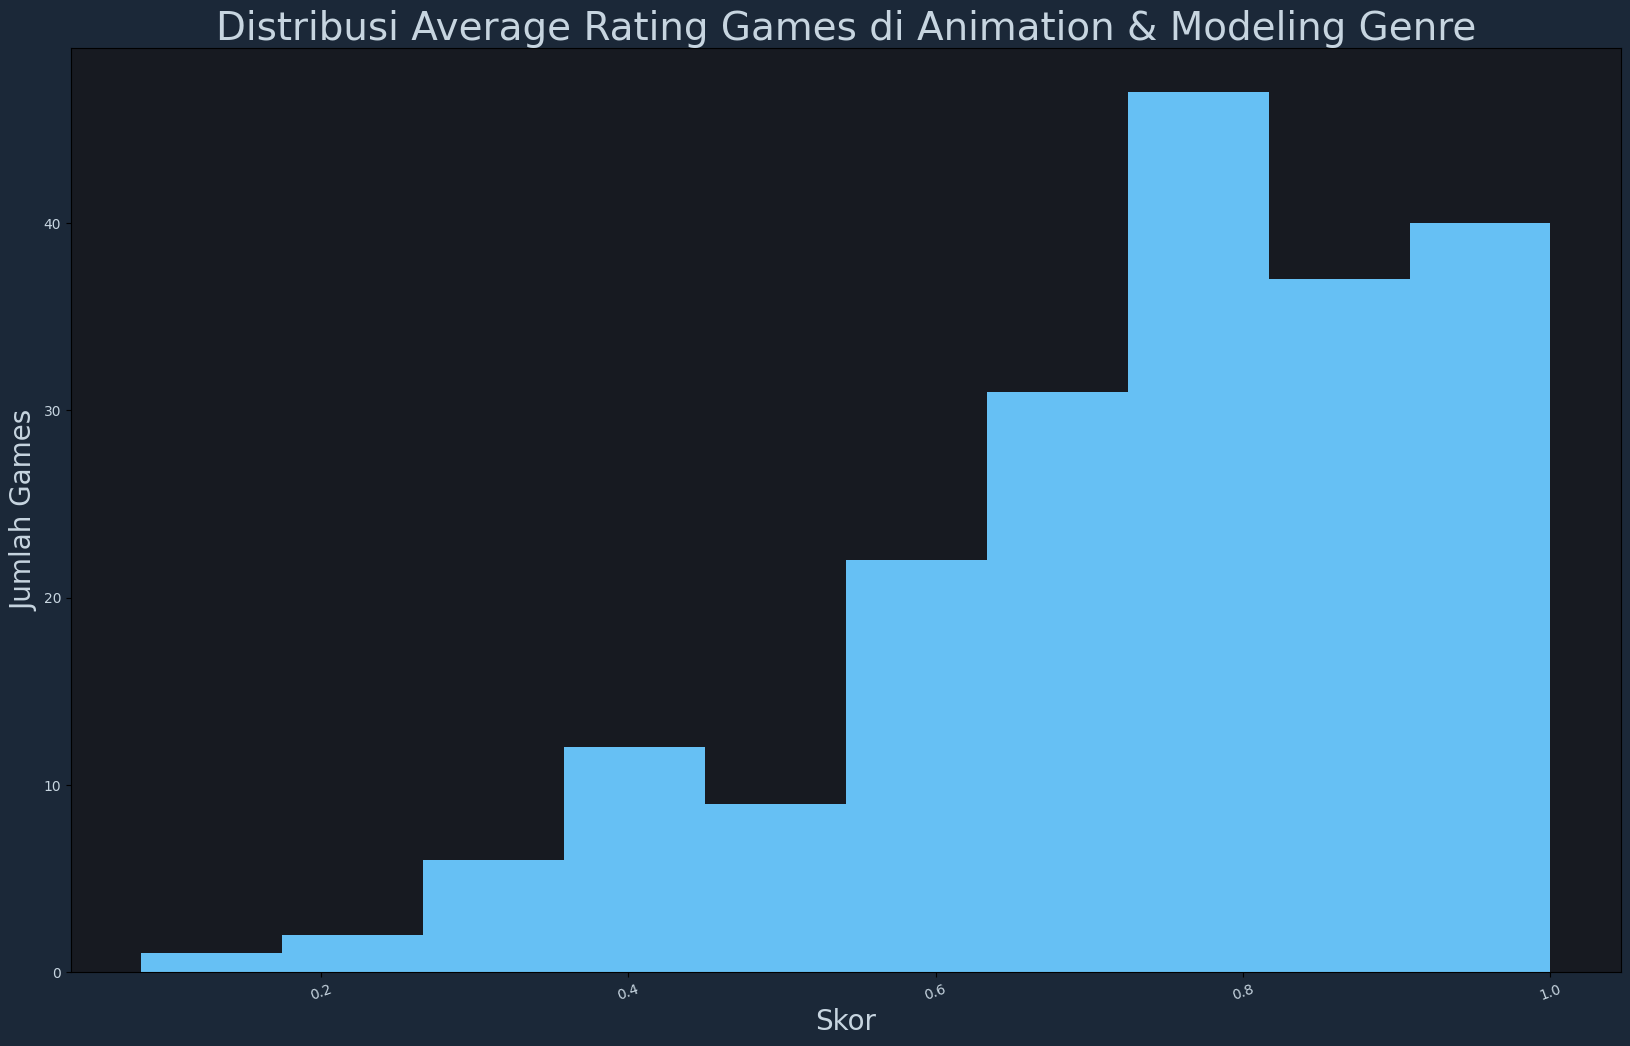

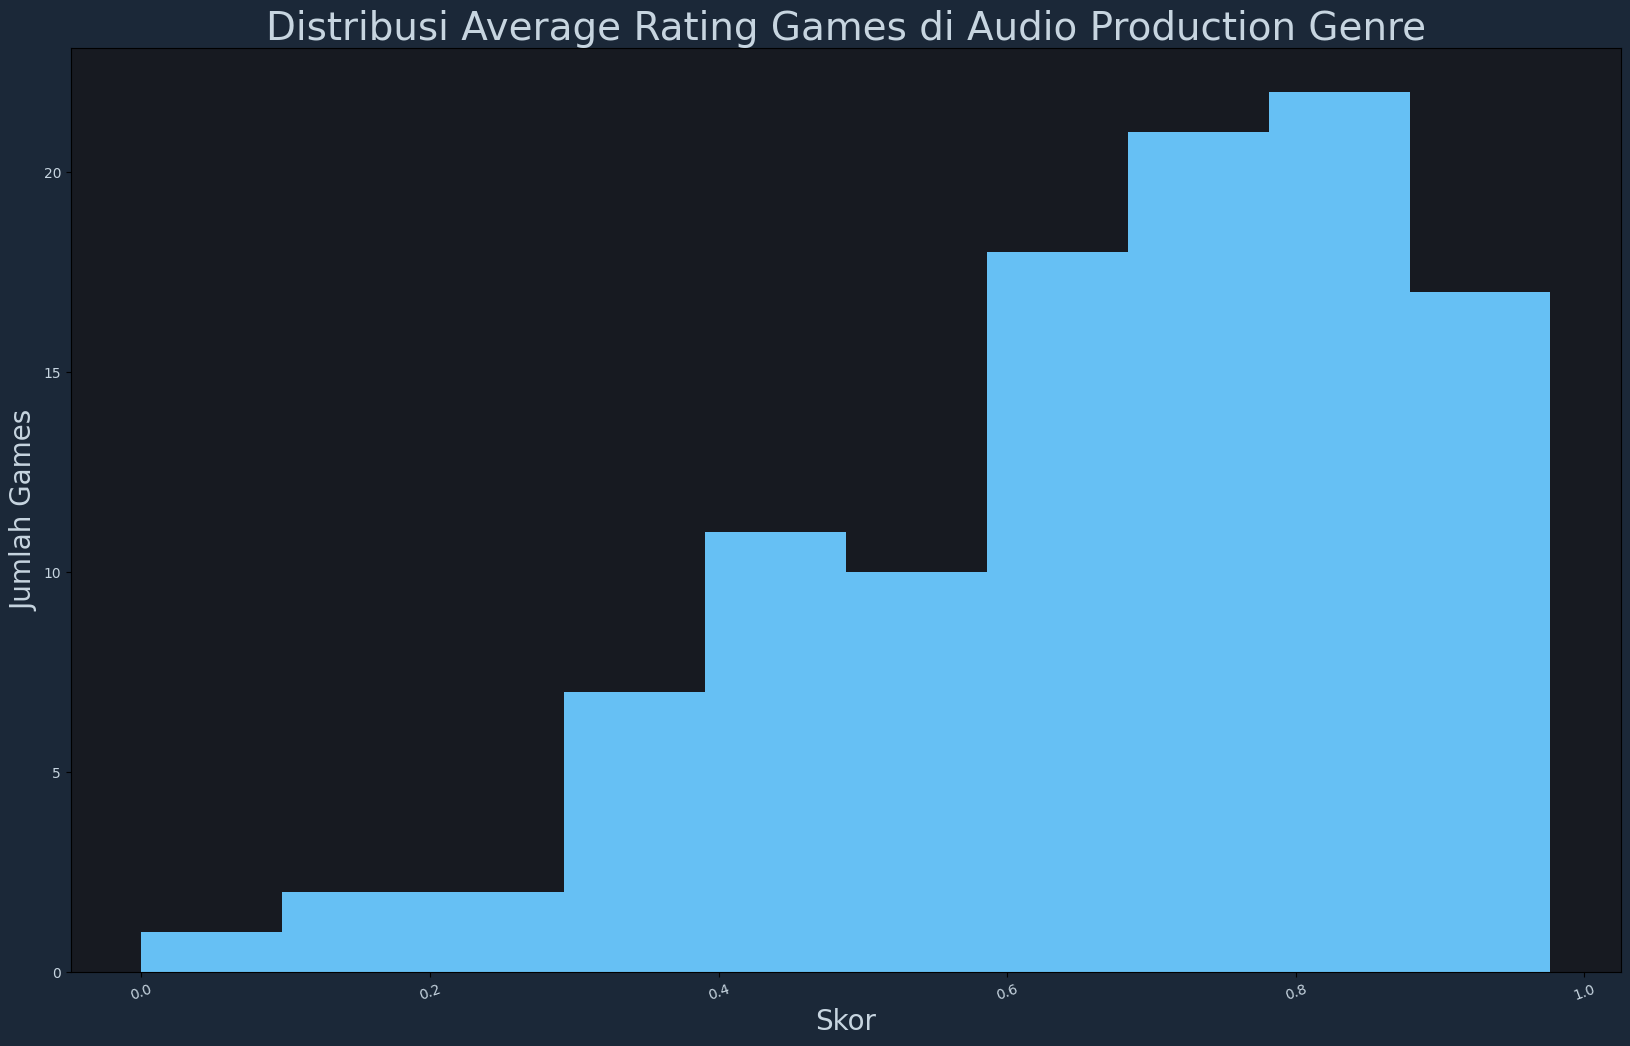

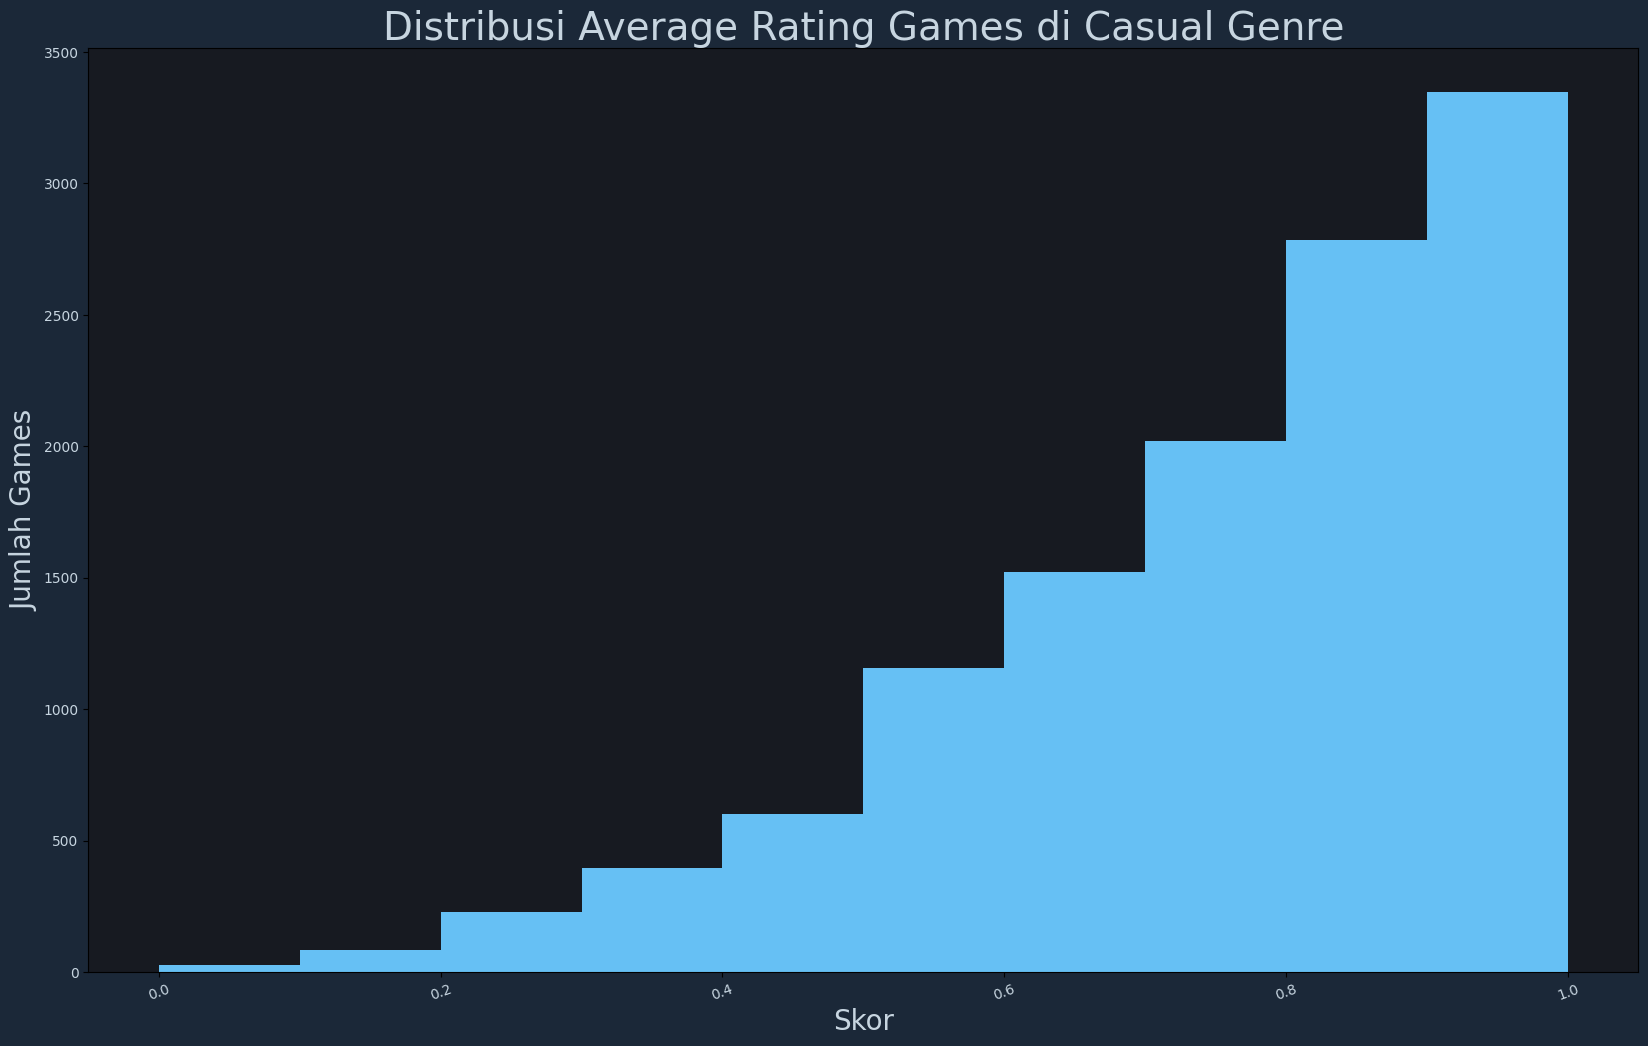

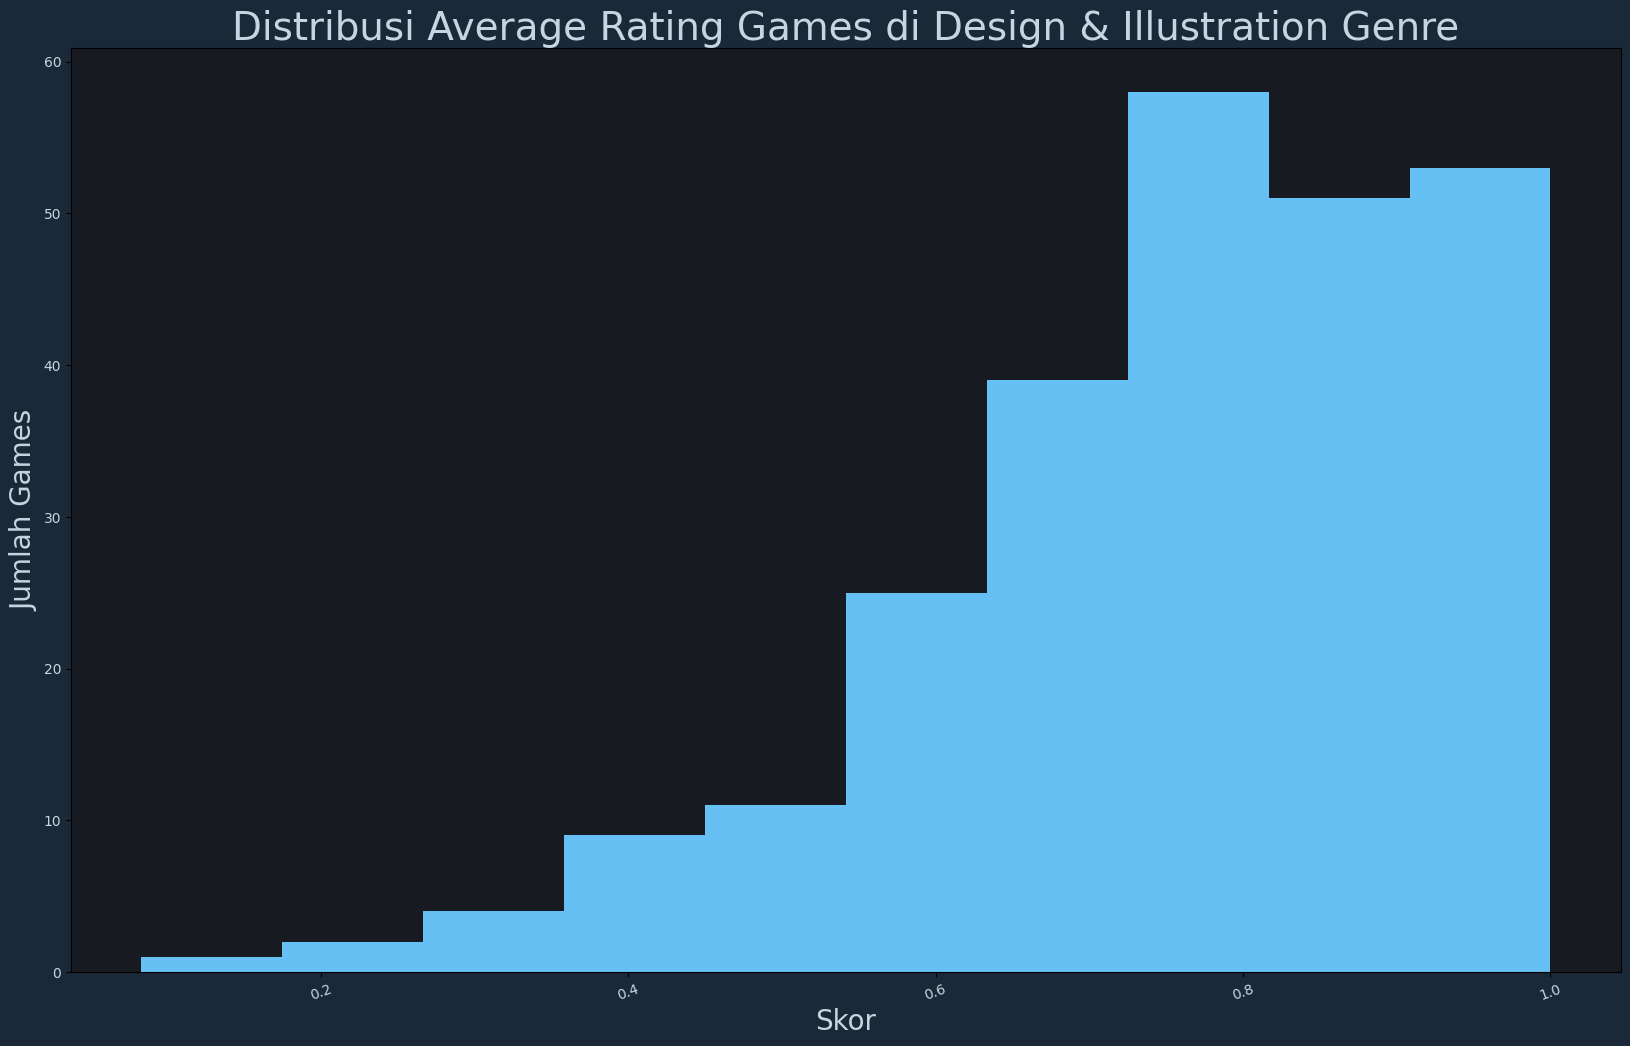

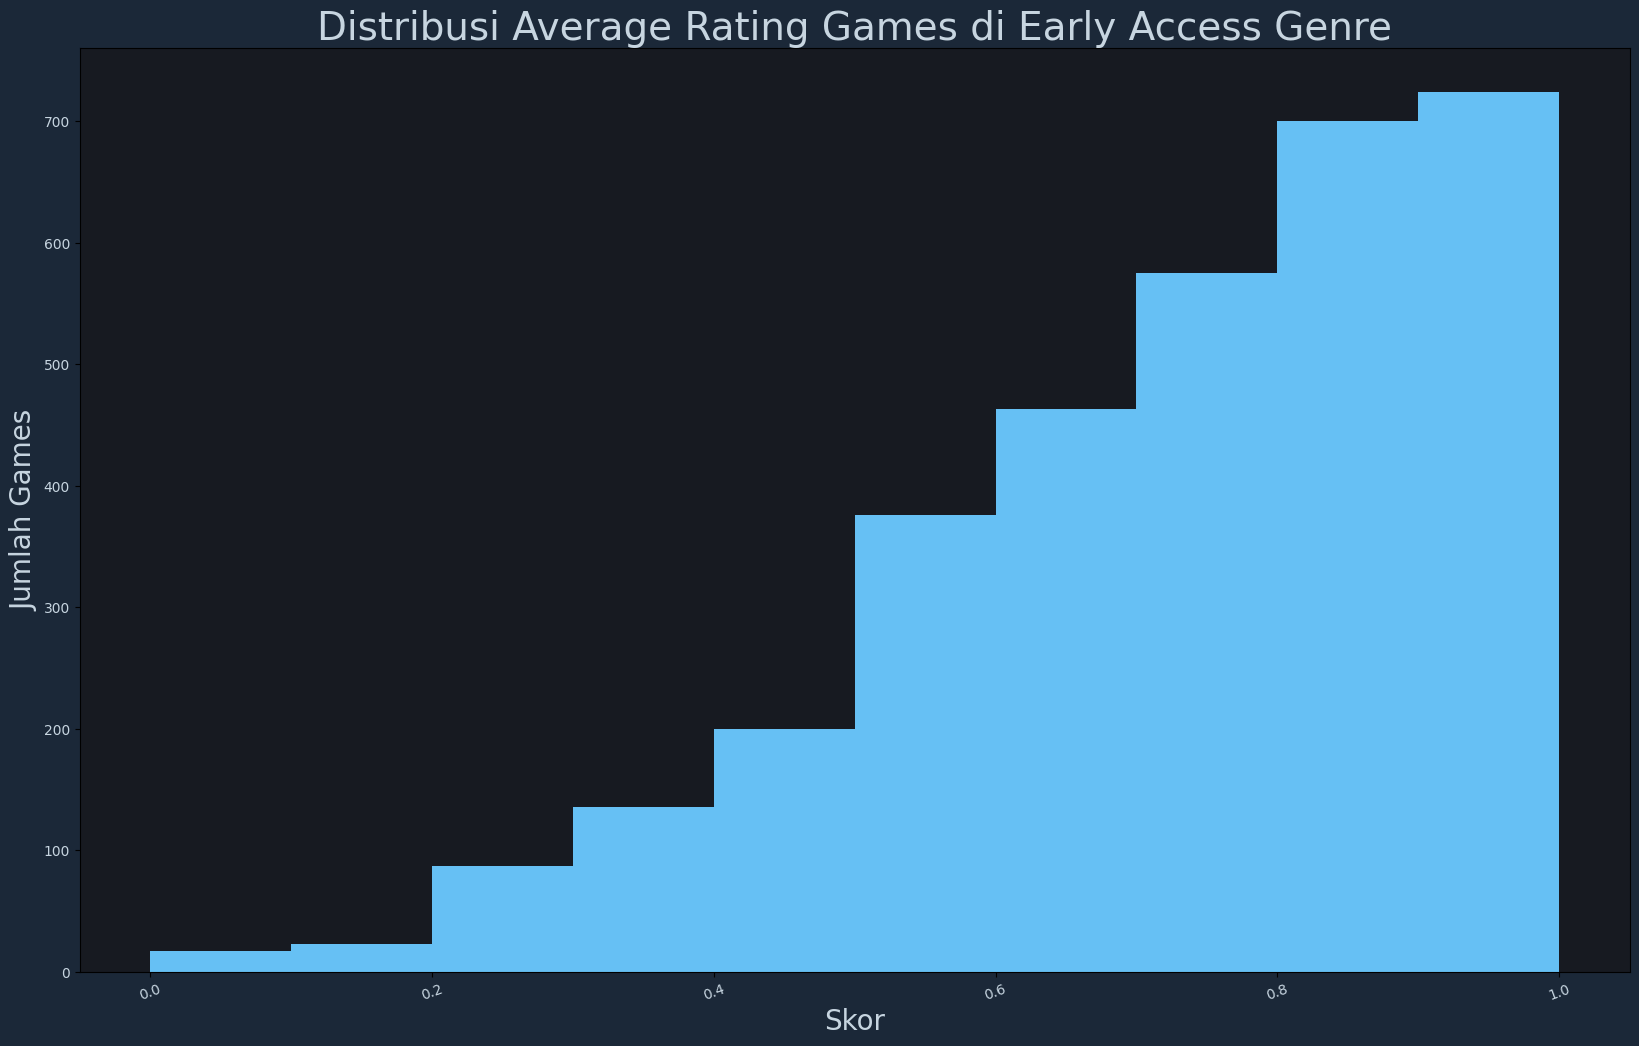

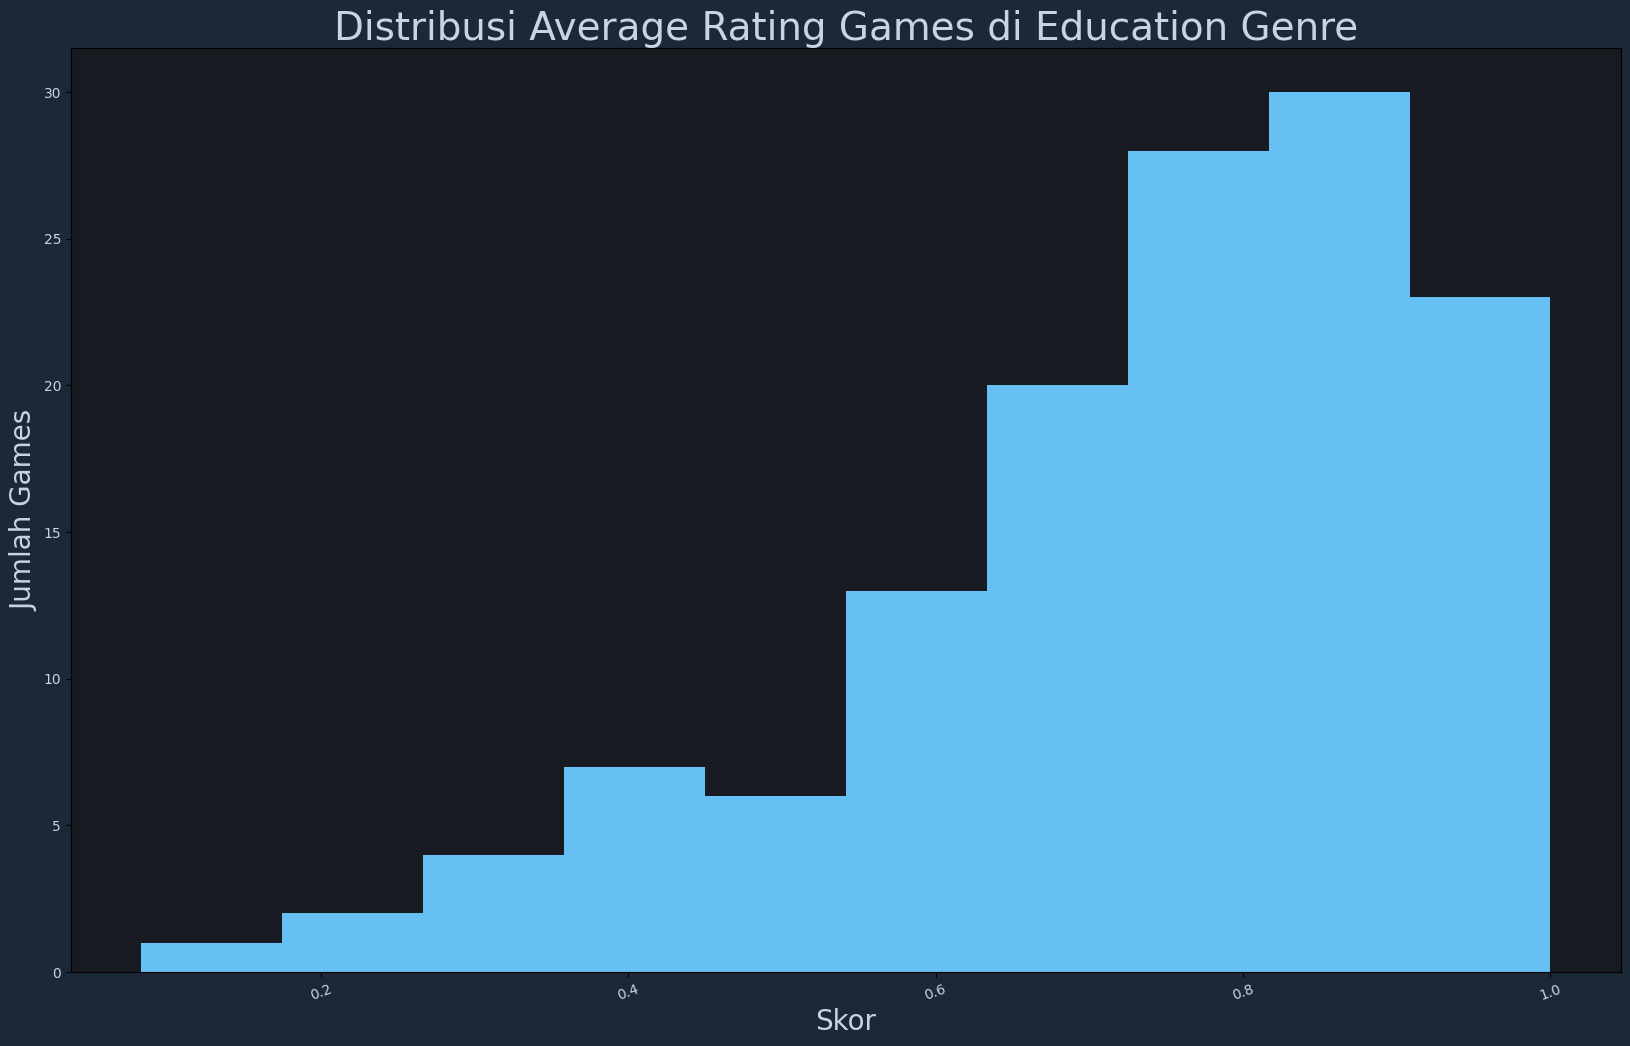

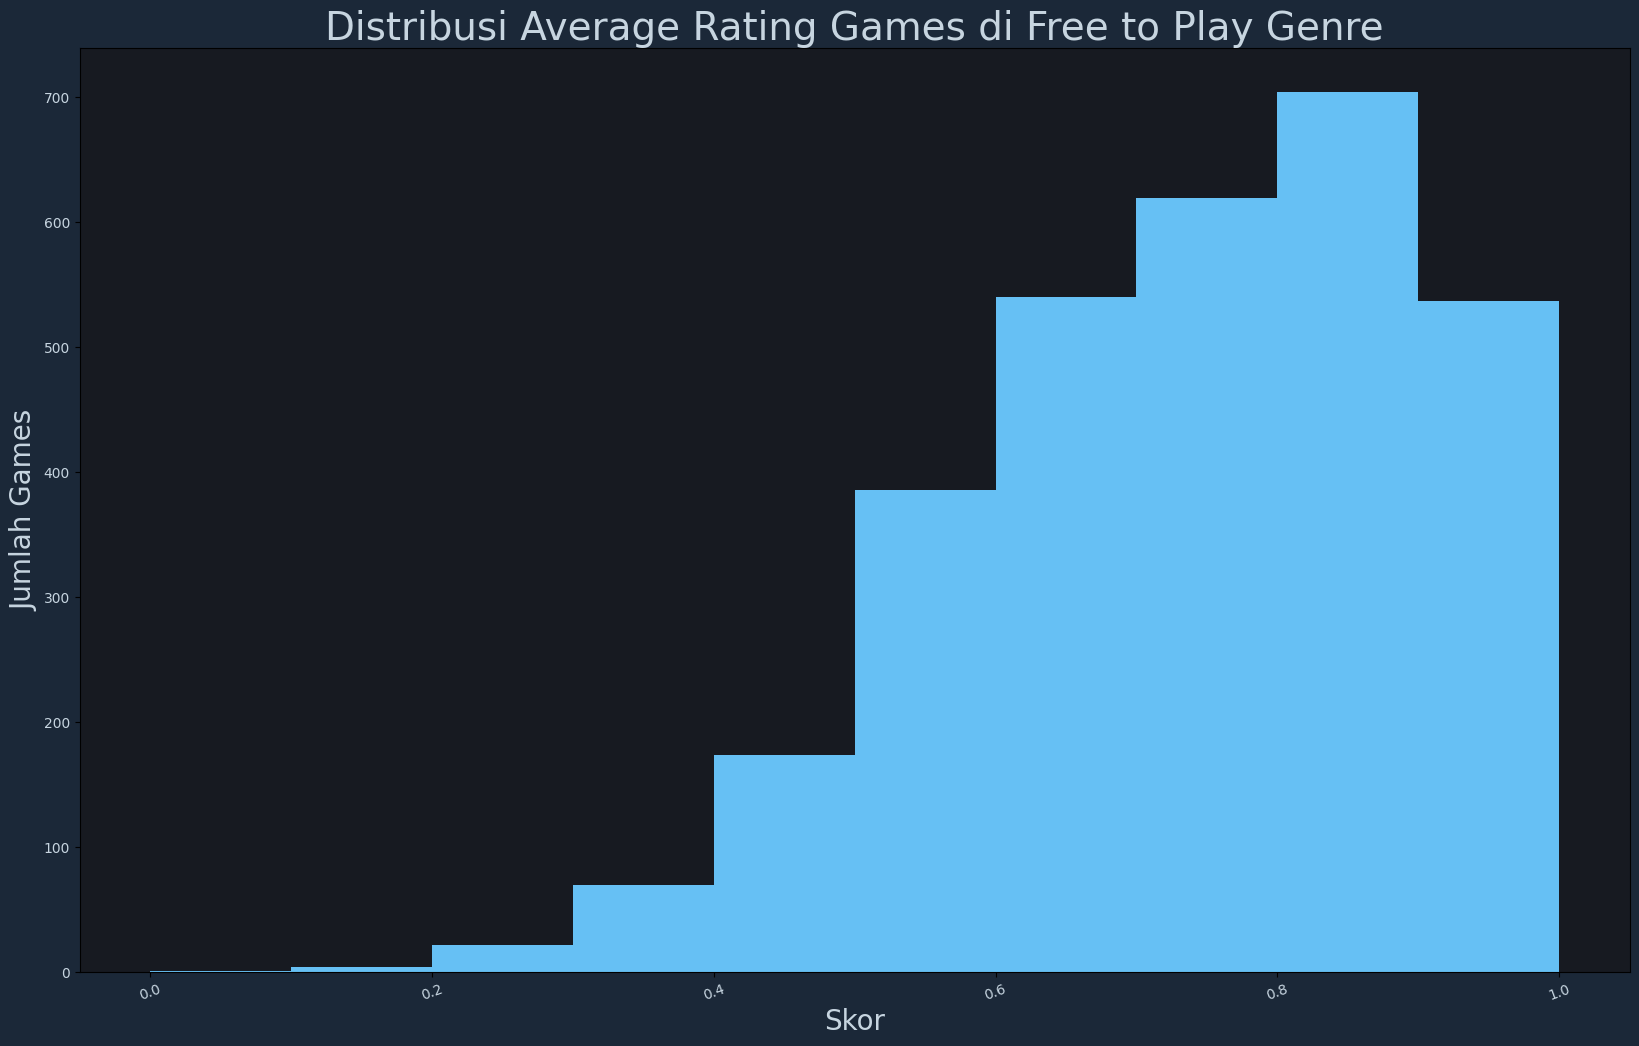

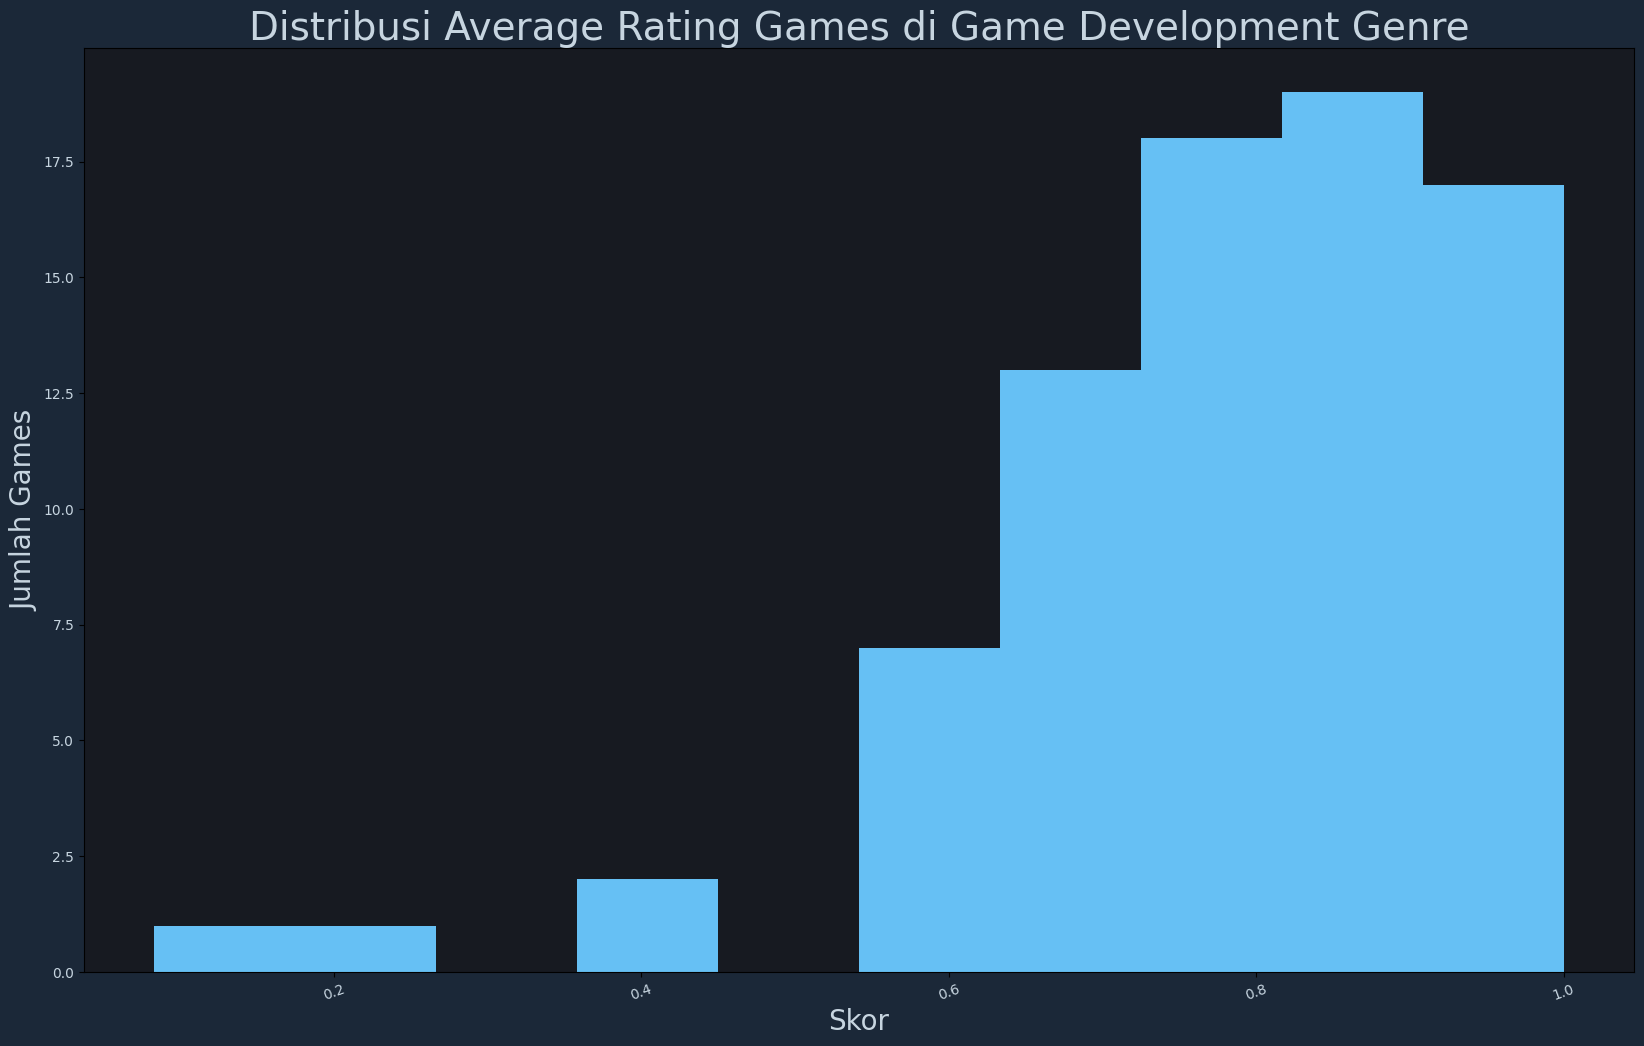

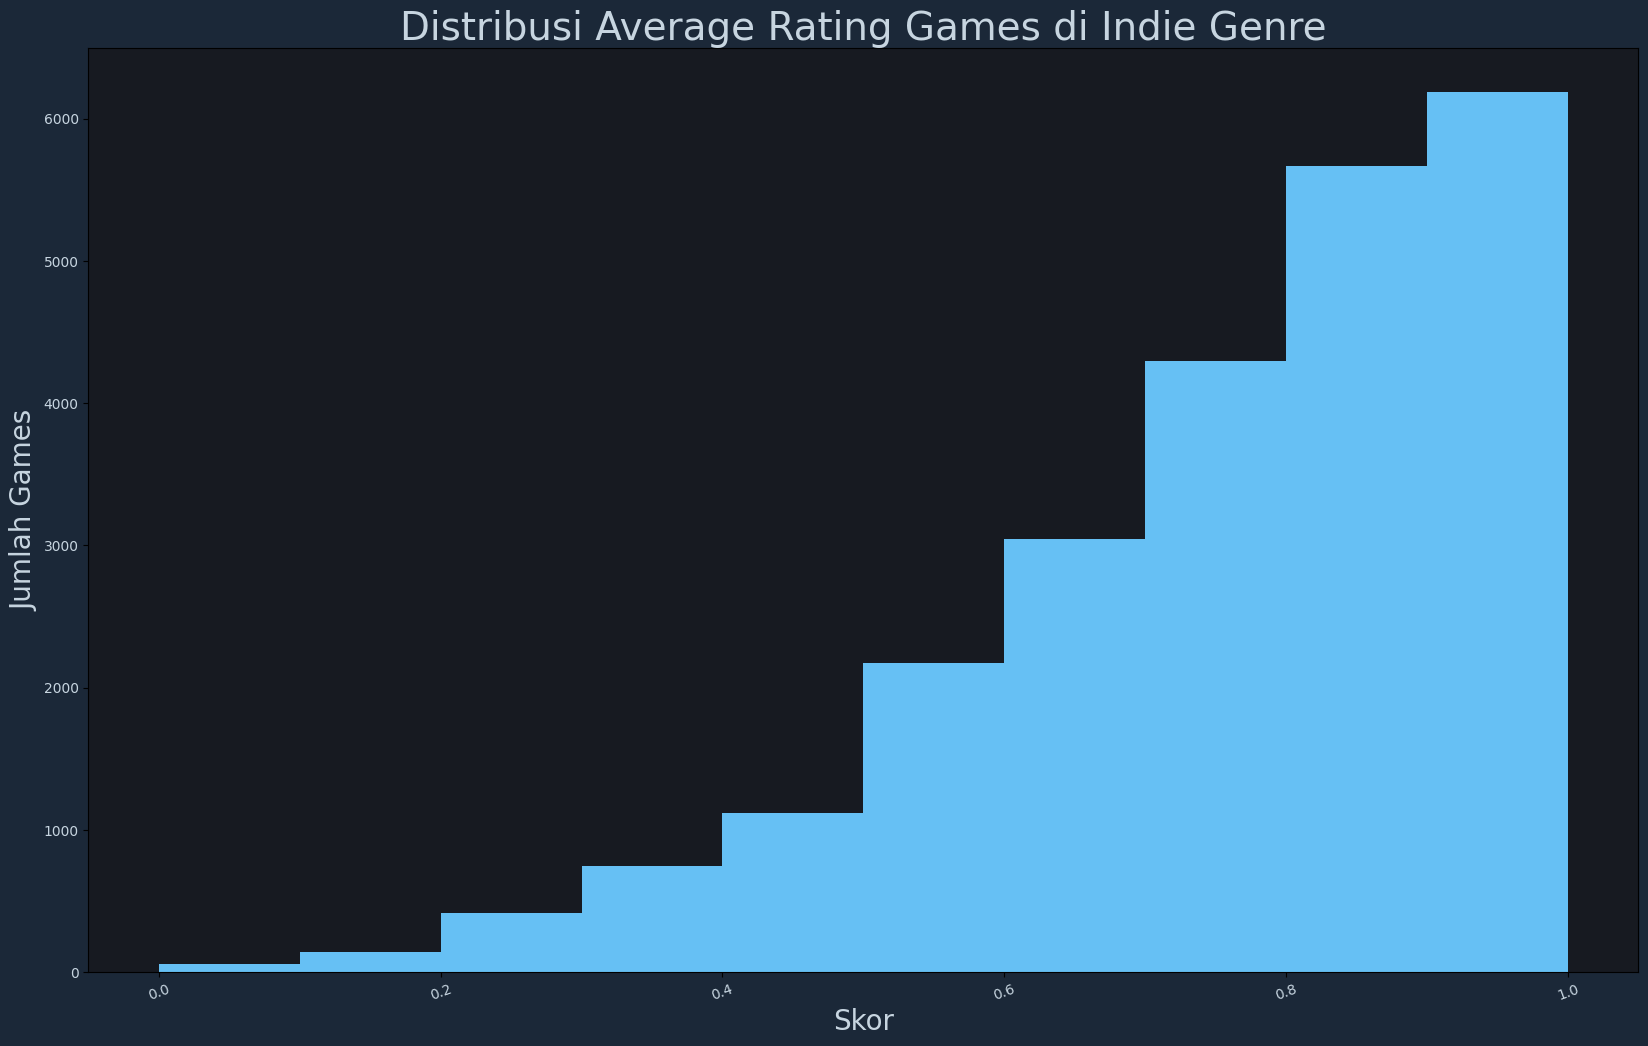

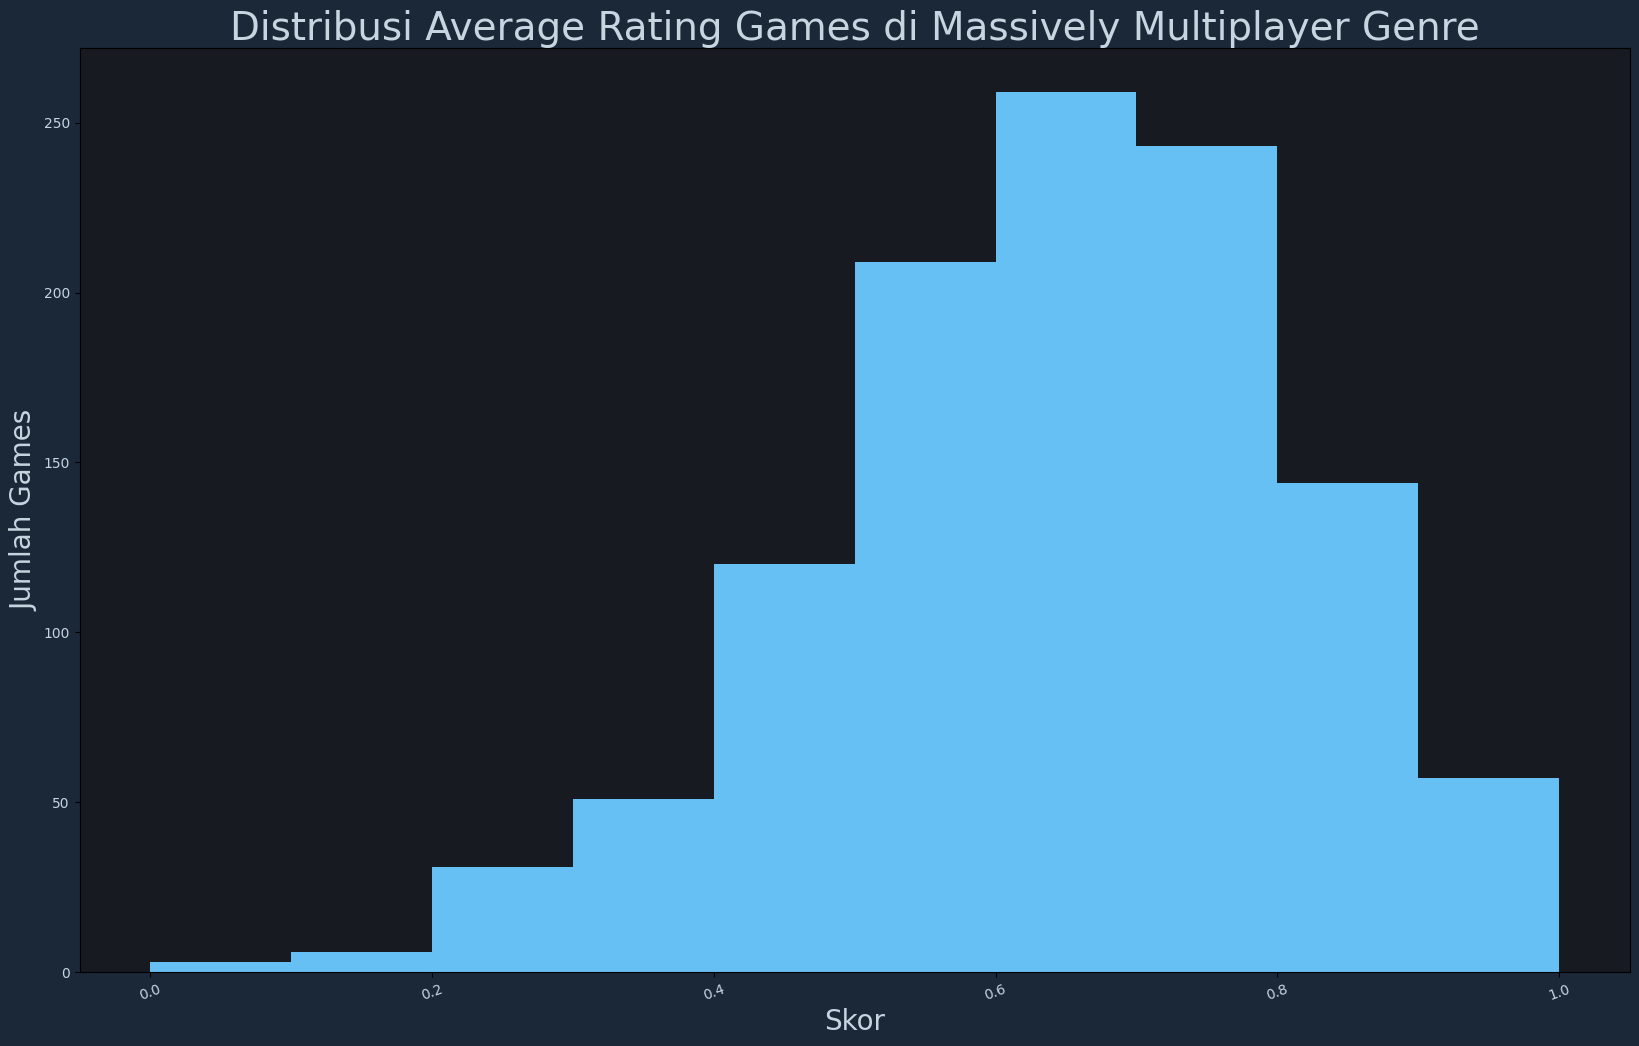

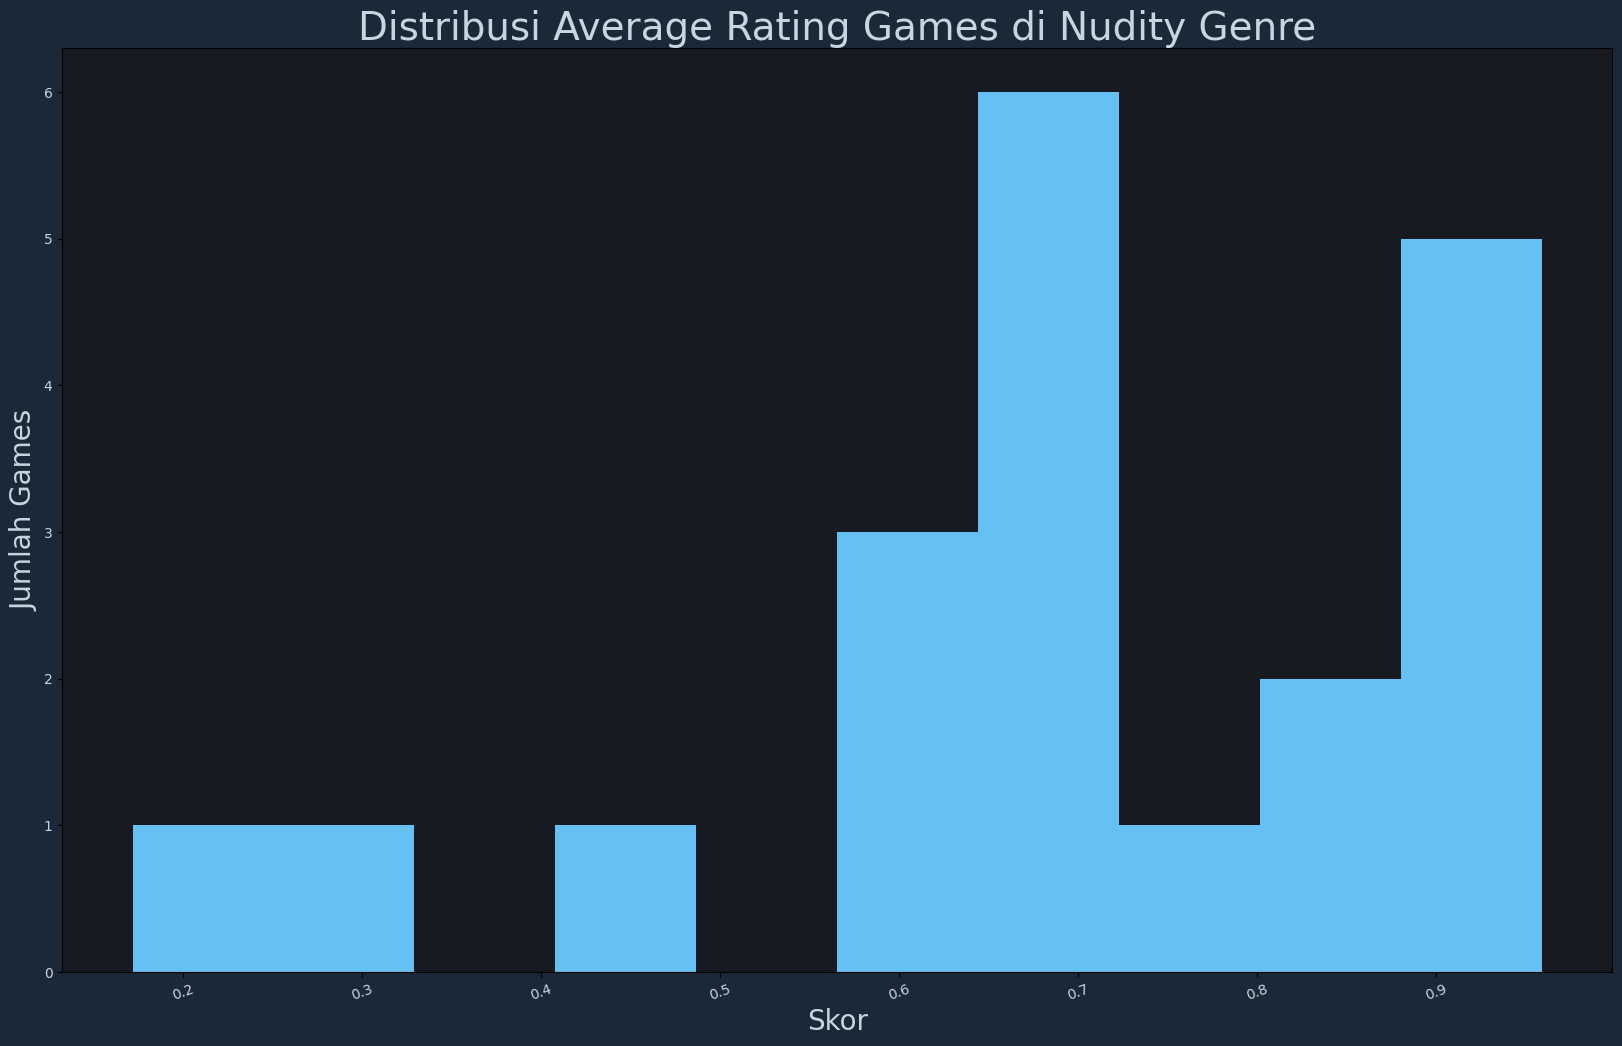

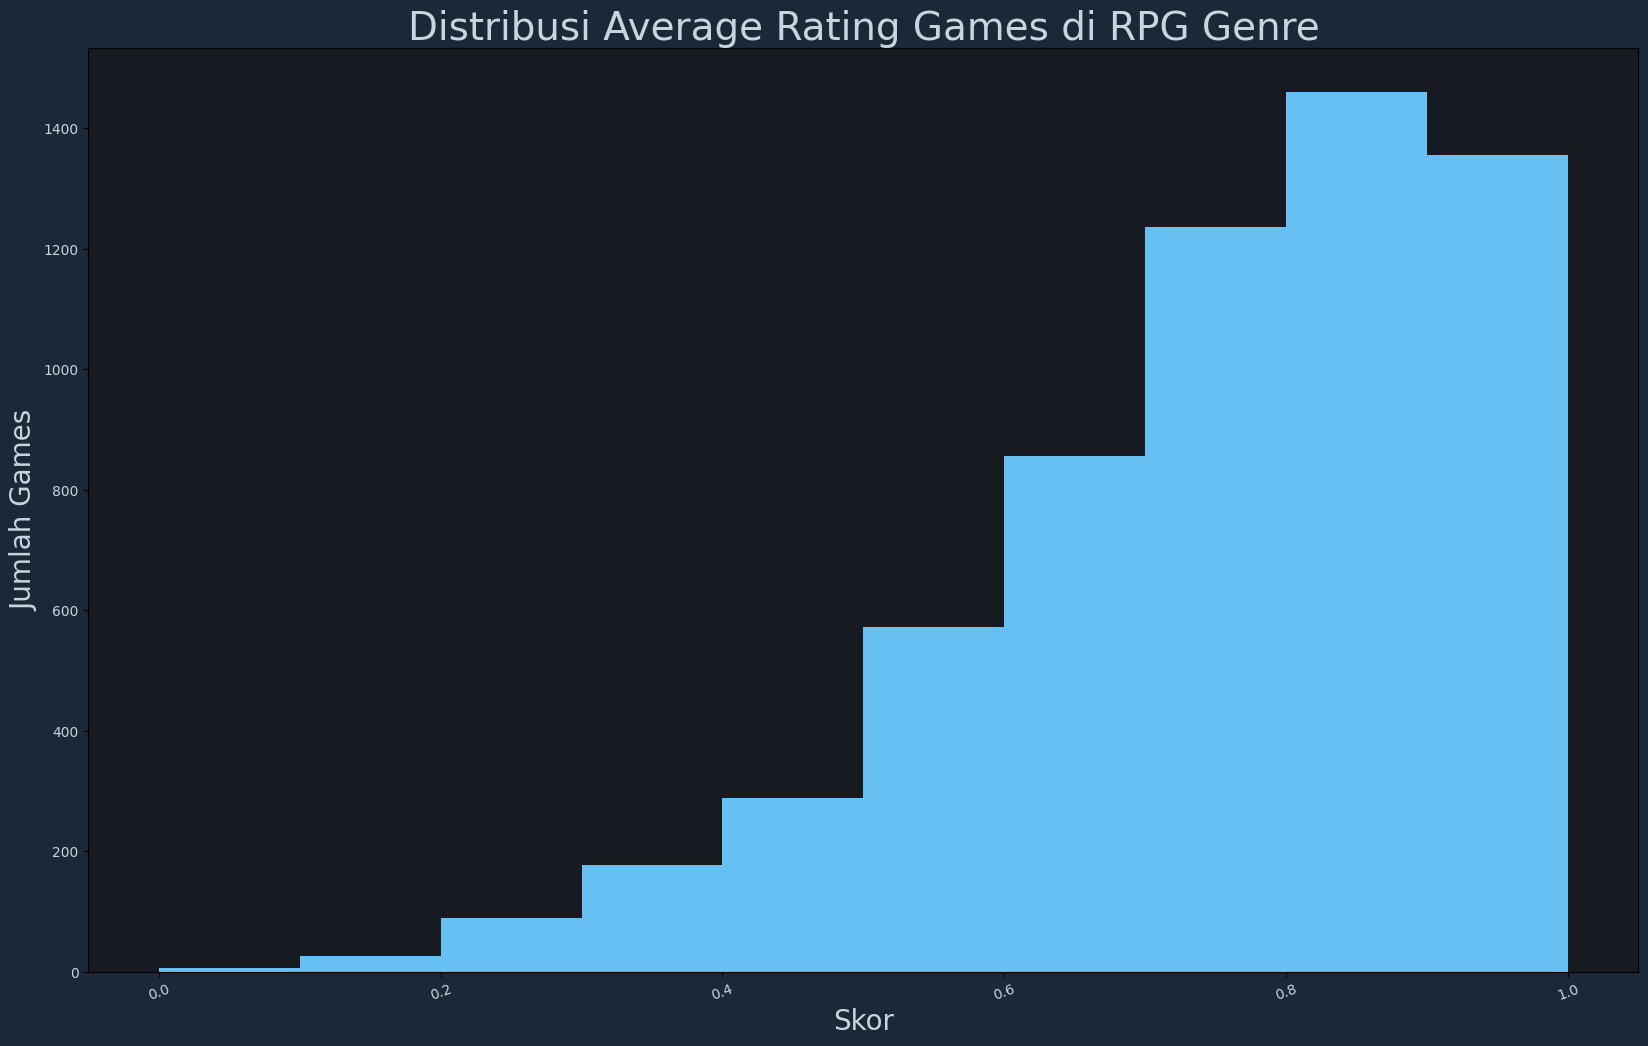

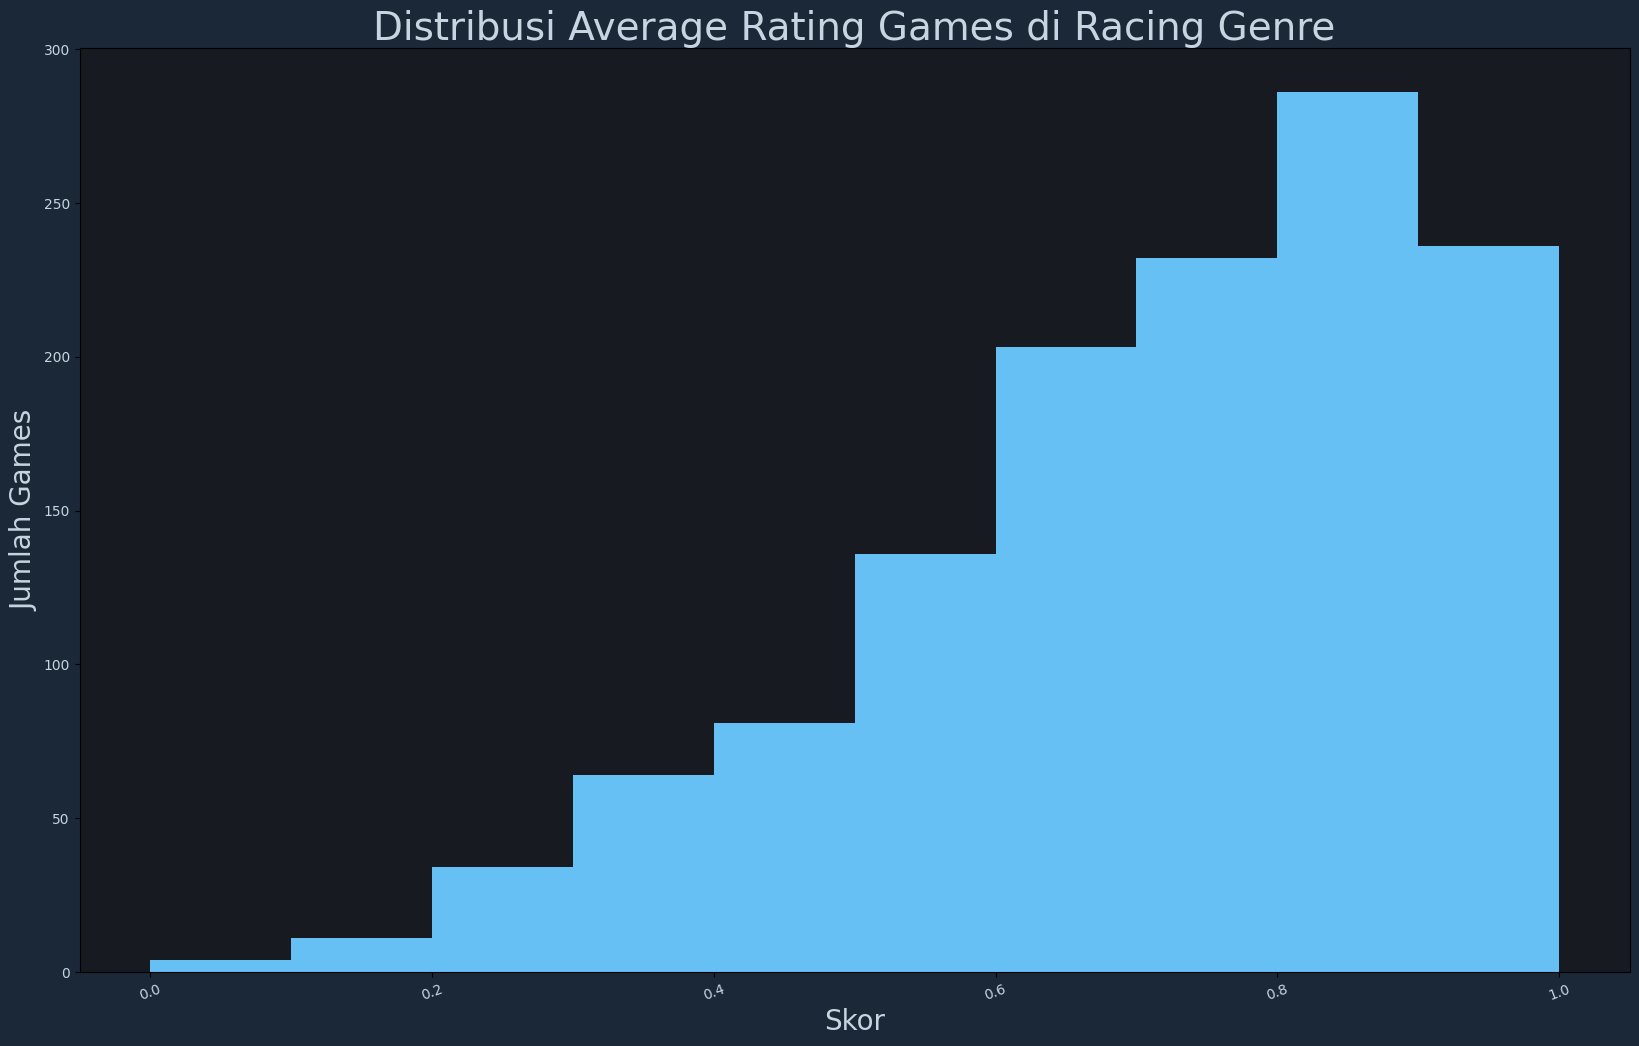

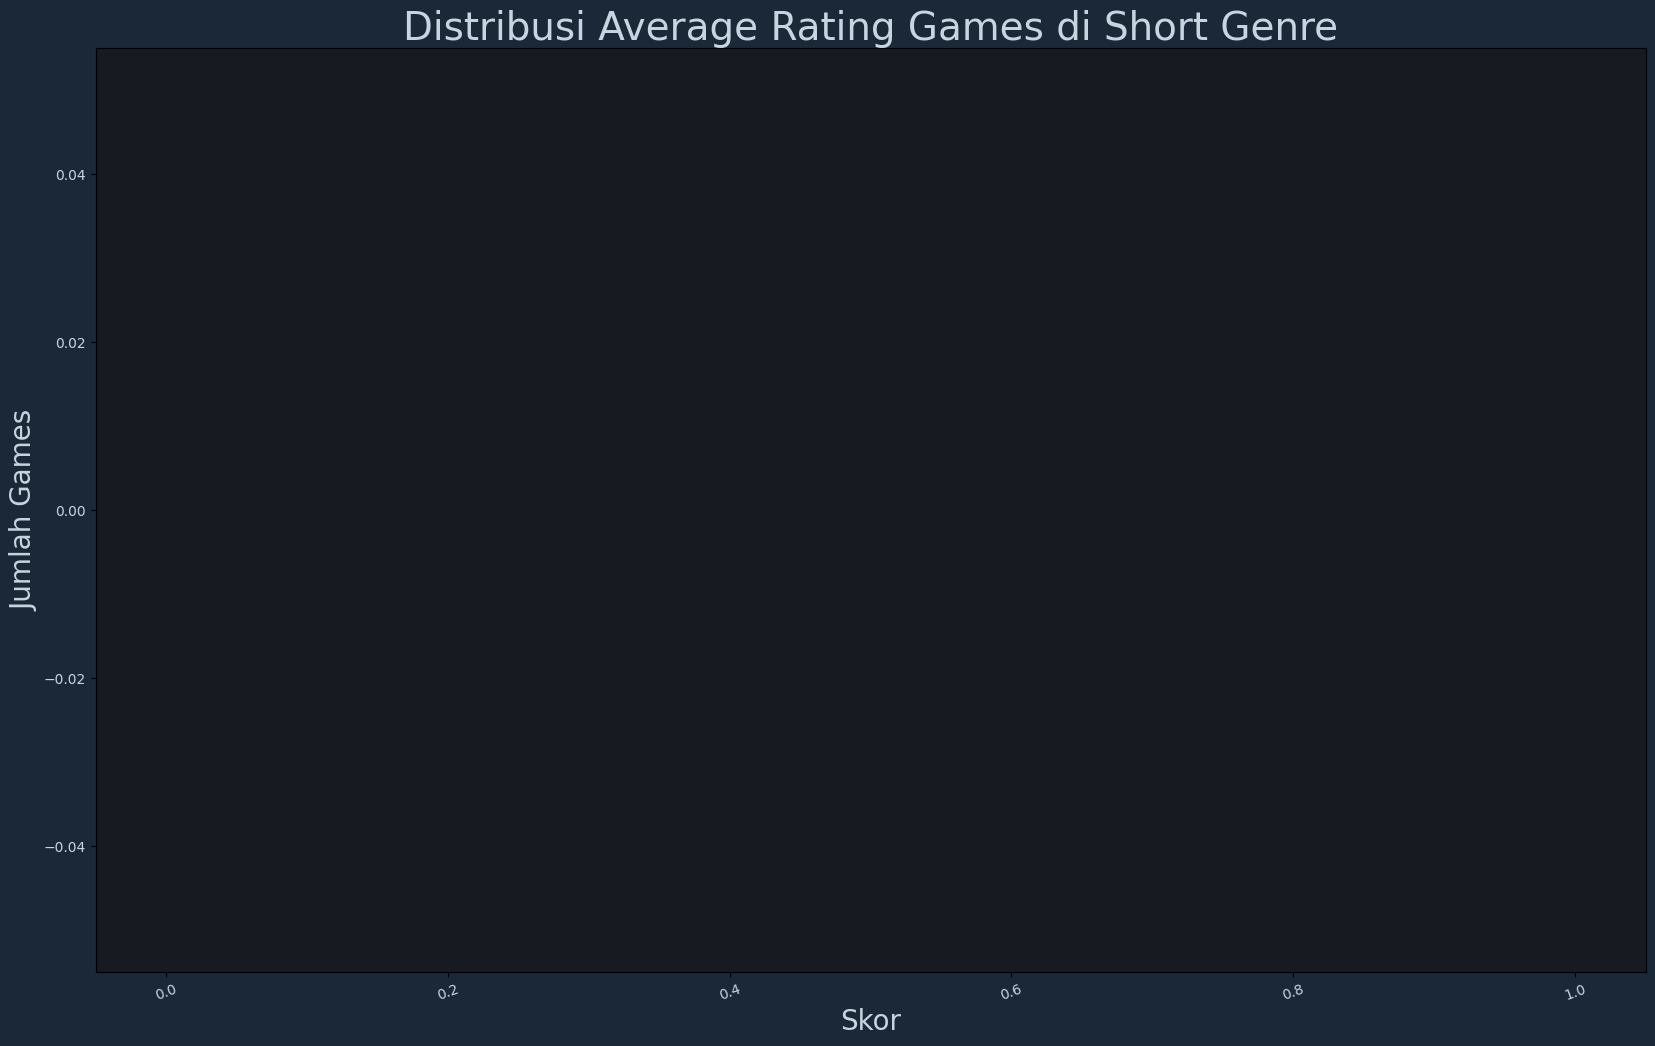

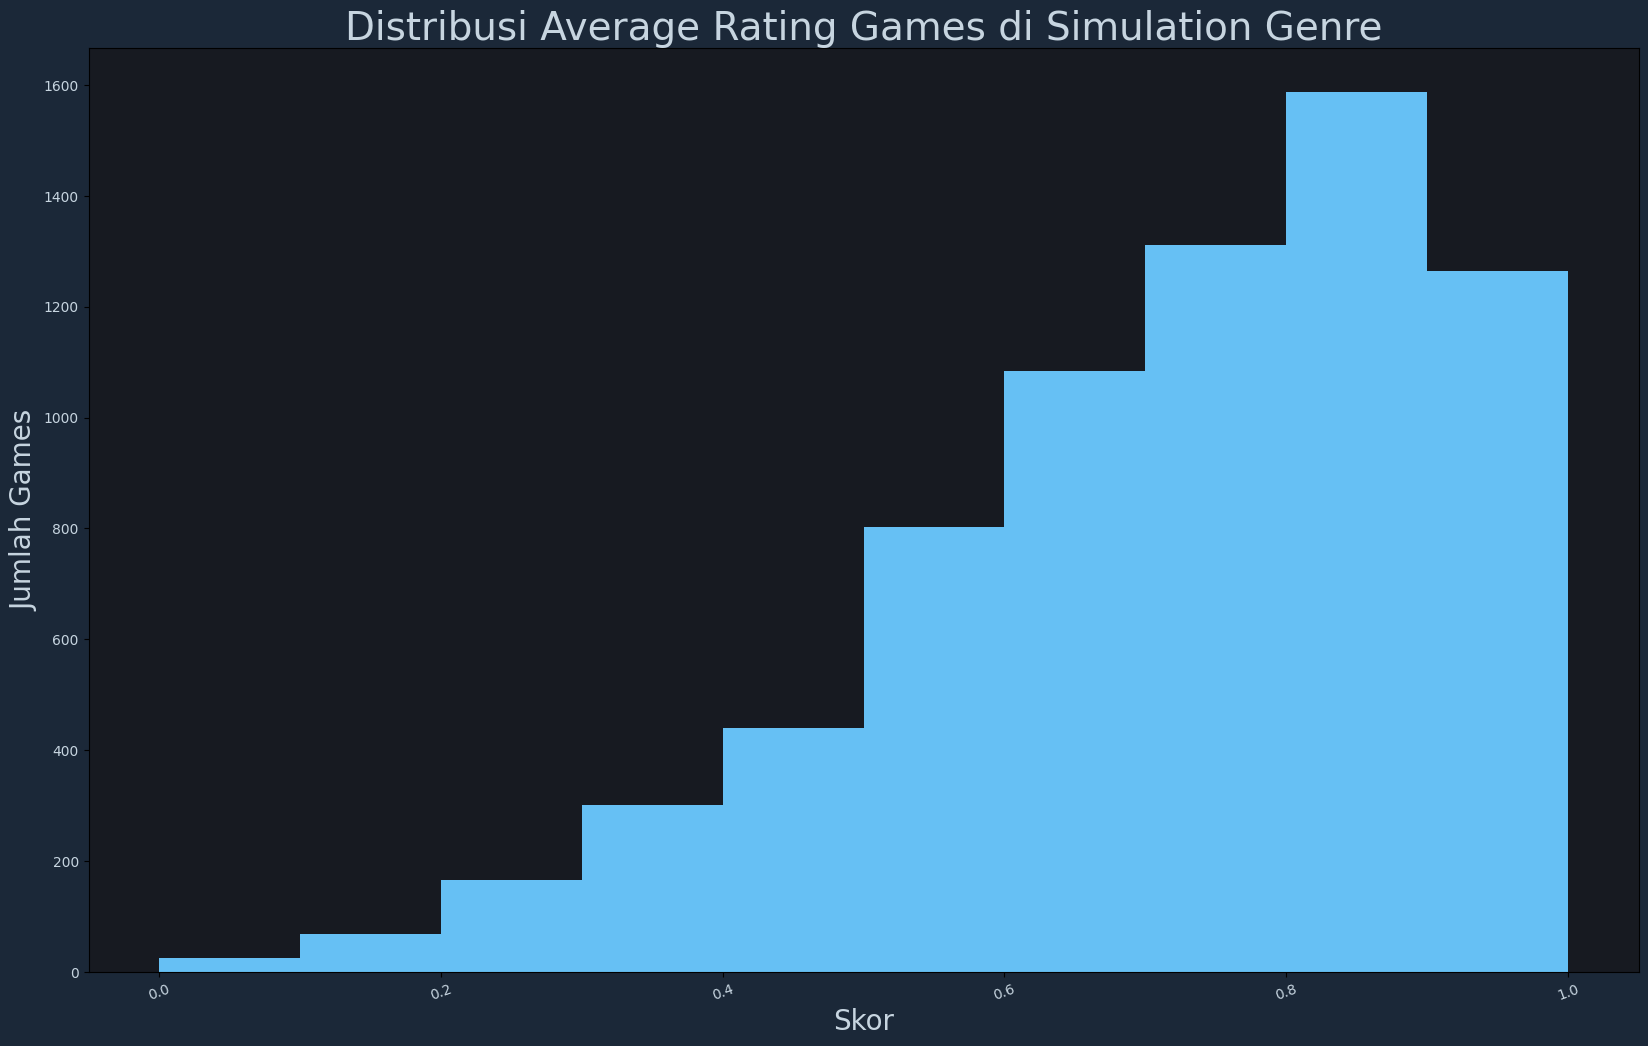

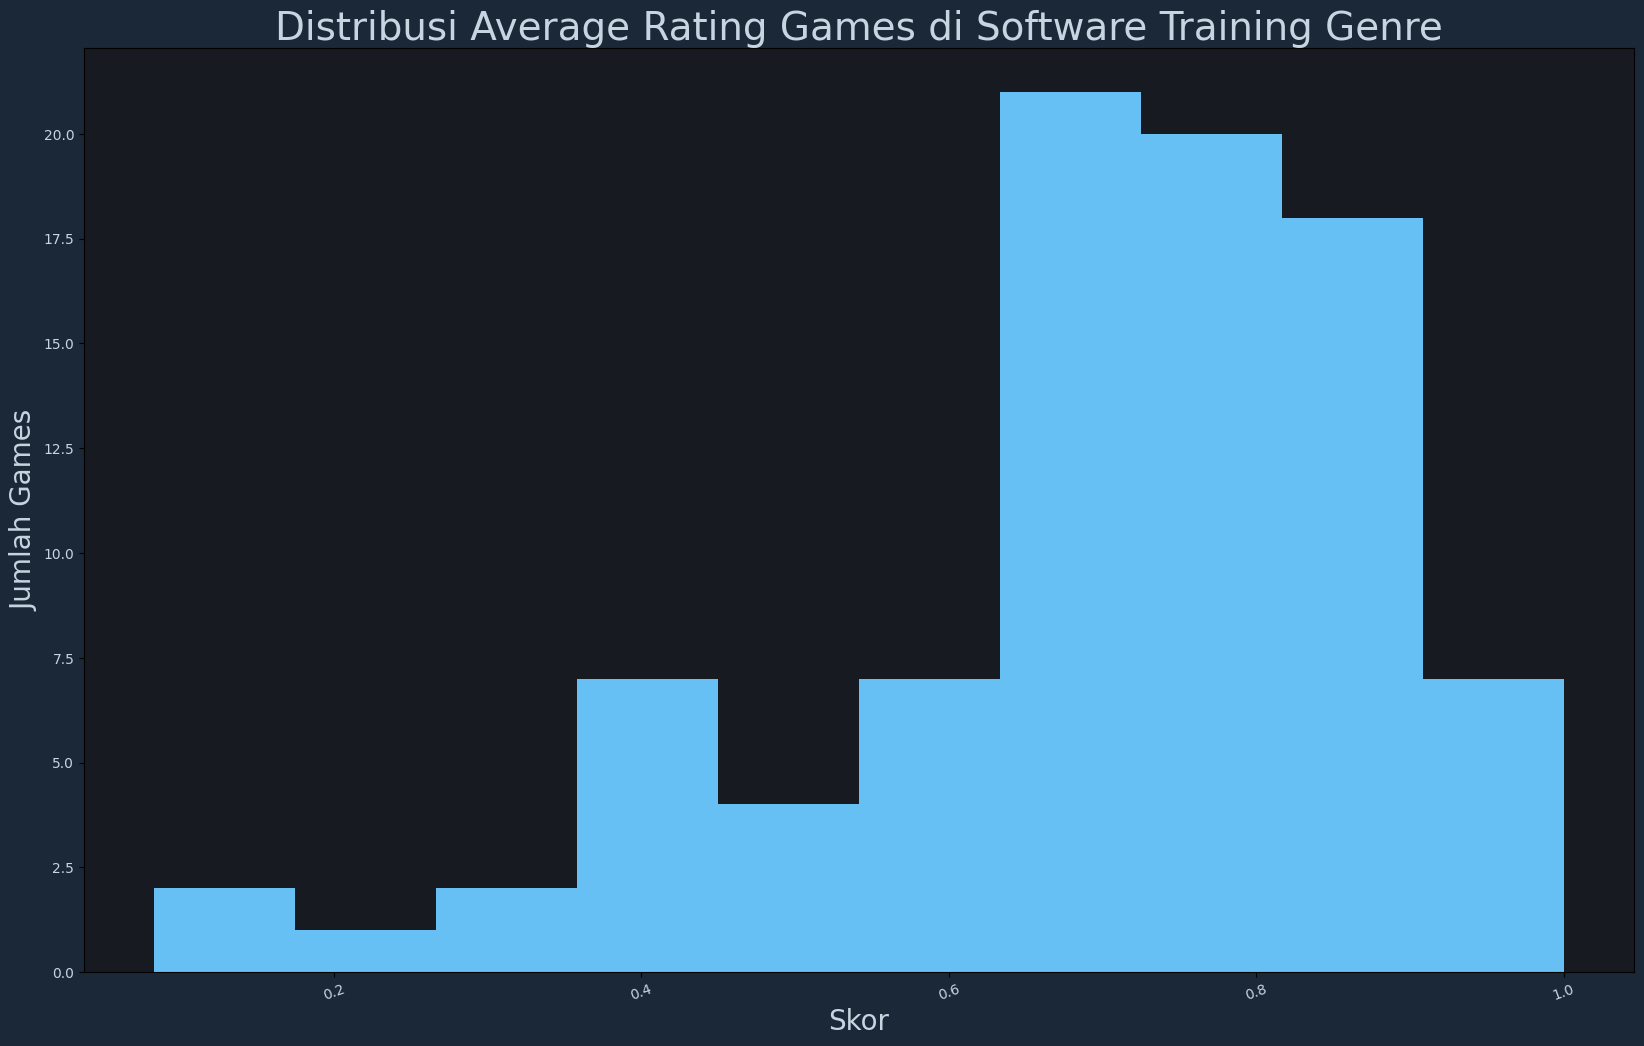

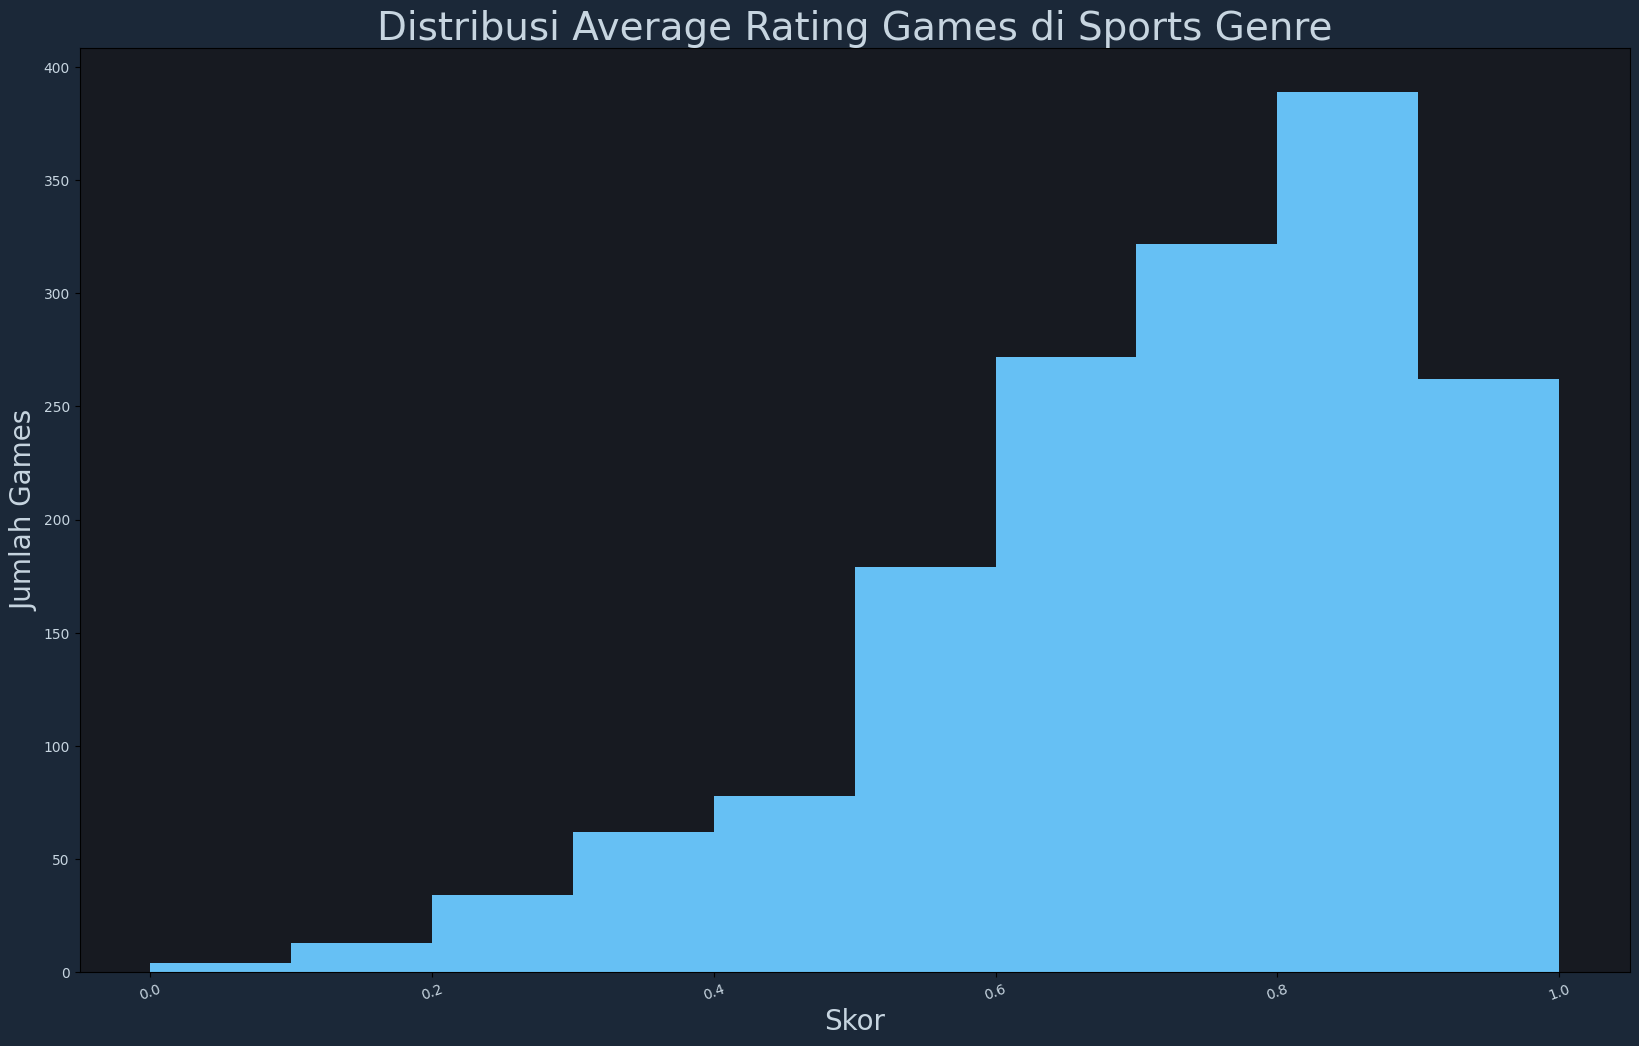

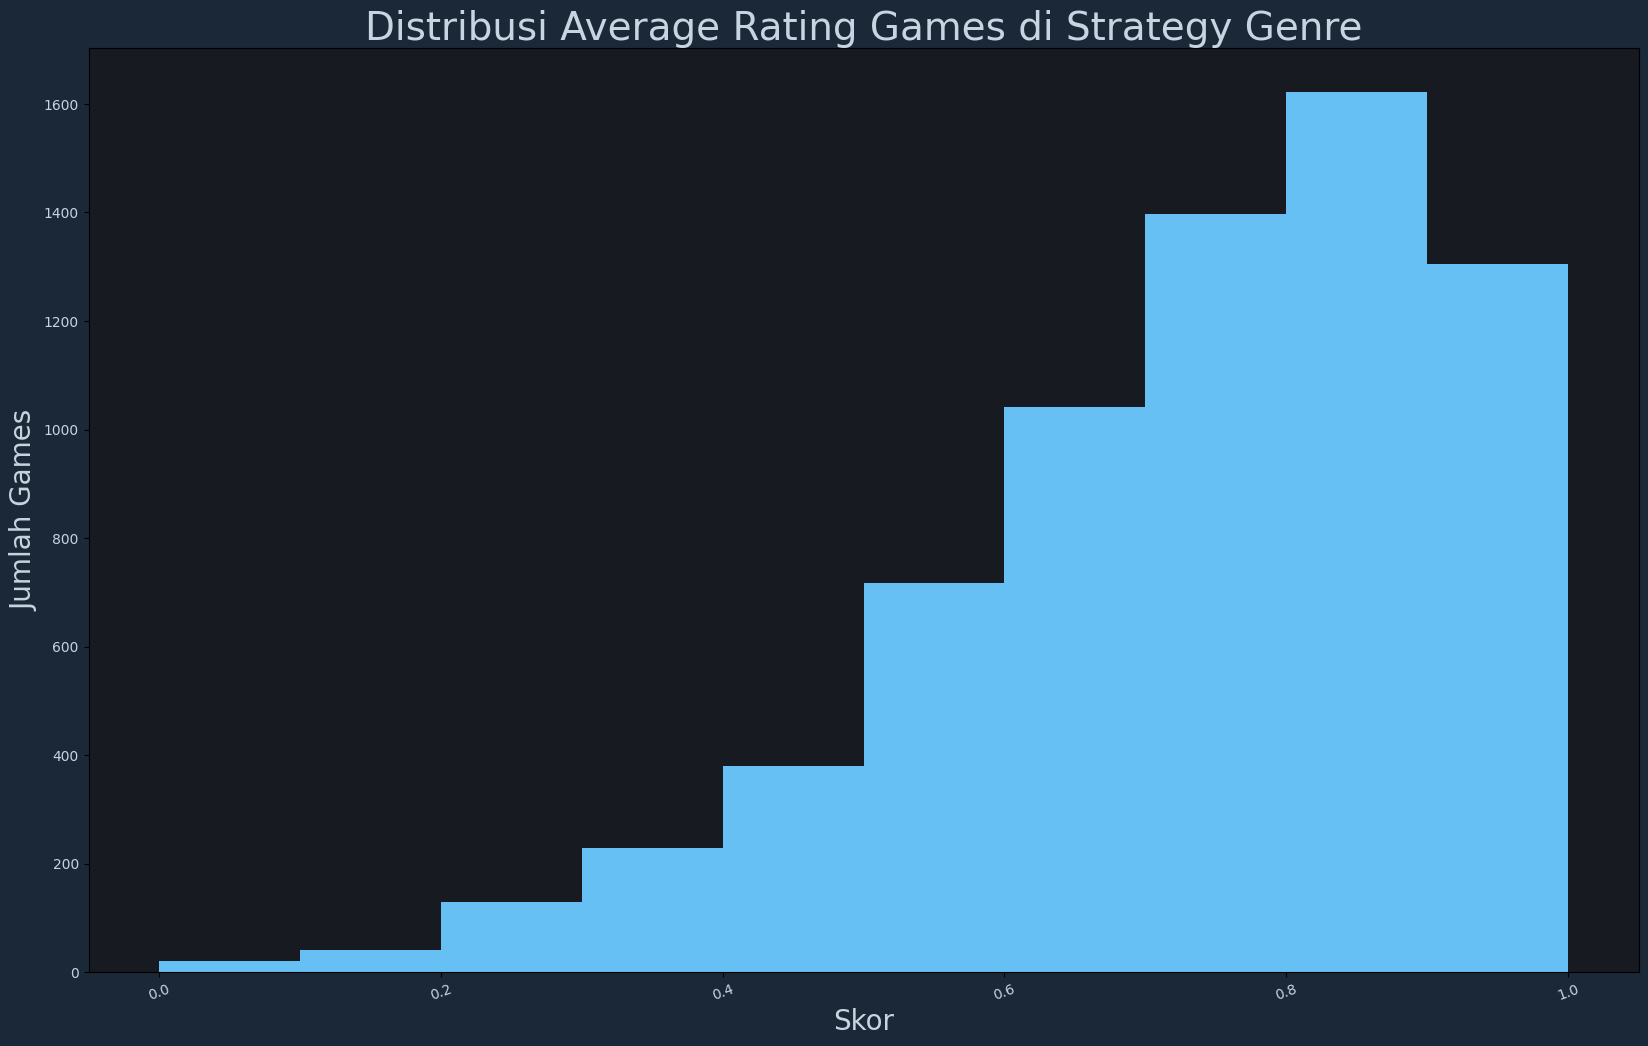

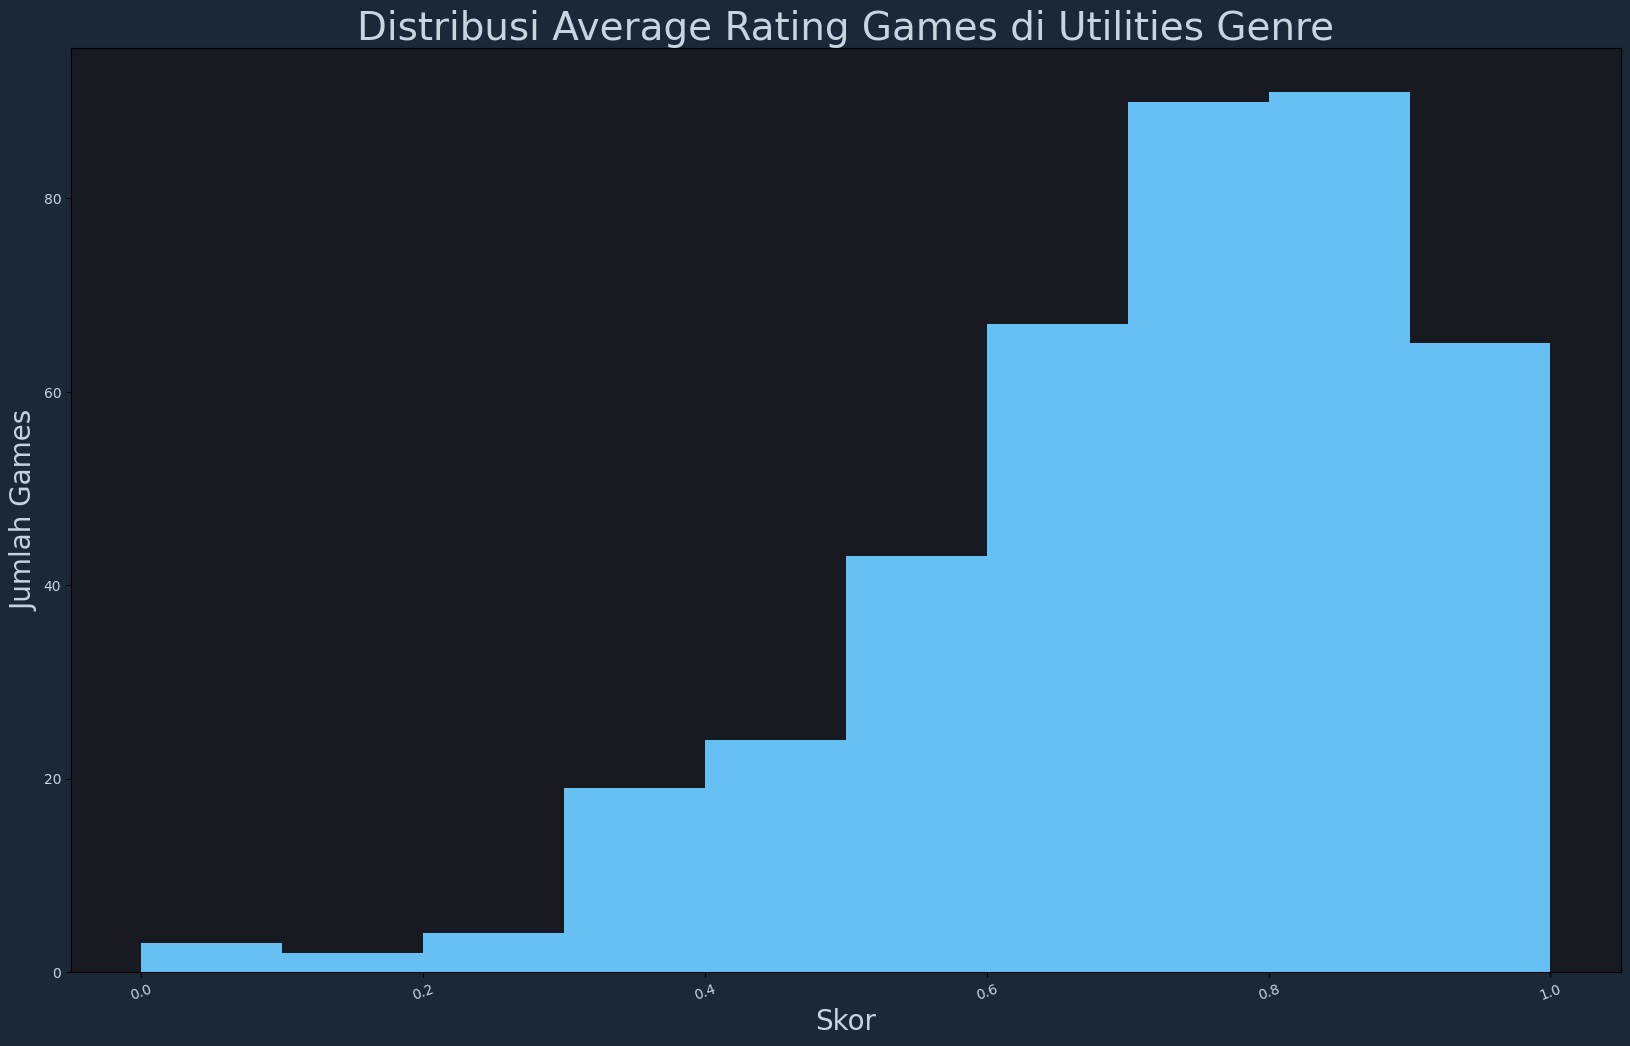

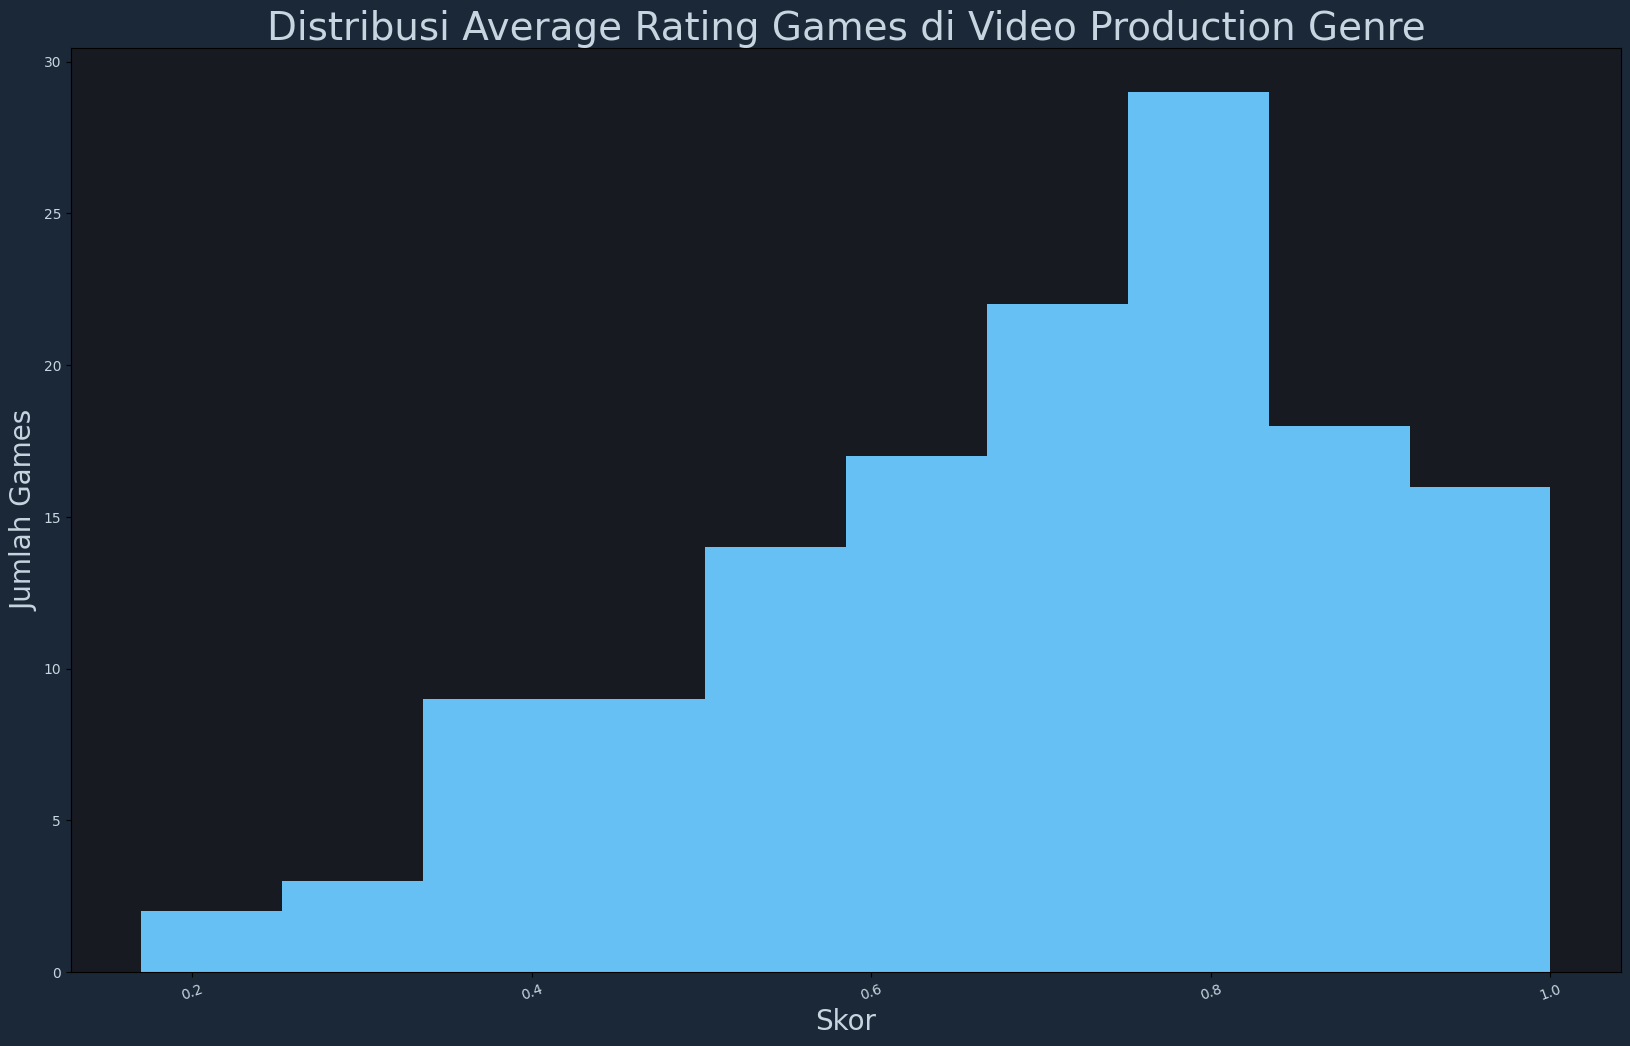

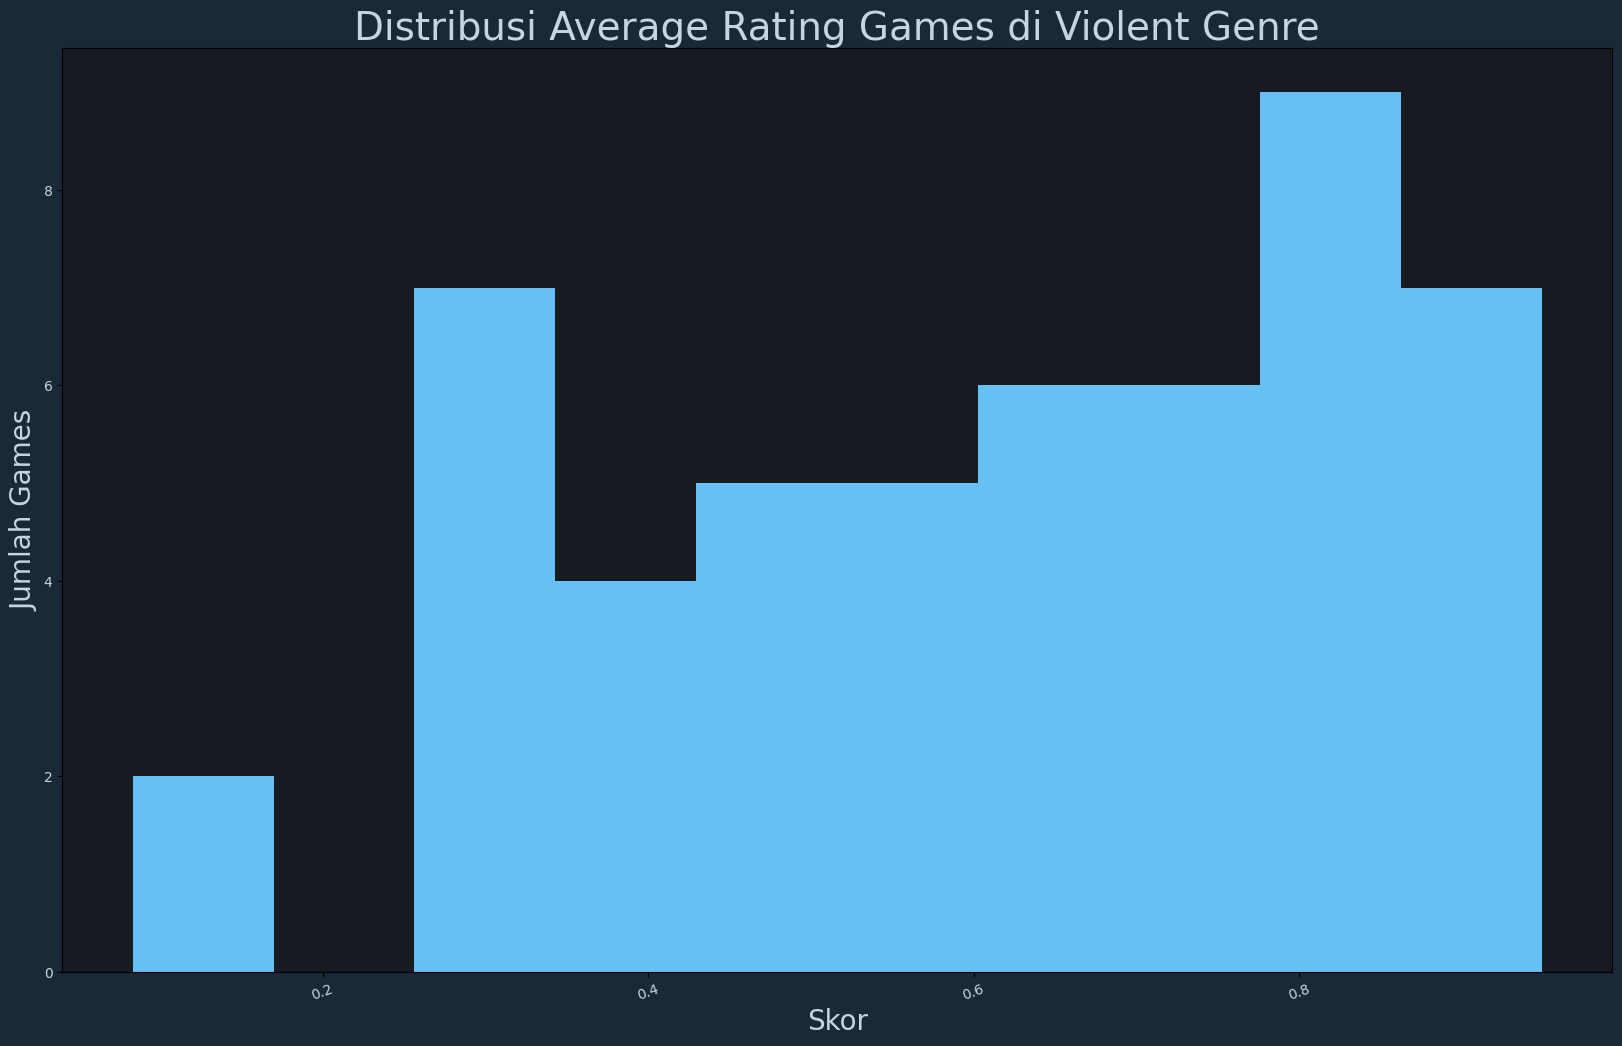

In [31]:
for genre in genre_list:
    generate_hist(games[(games[genre] > 0) & (games['total_ratings'] > 10)]['pos_rating_pct'], xlabel = 'Skor', ylabel = 'Jumlah Games', title = f'Distribusi Average Rating Games di {str(genre[6:])} Genre', x_rot = 20)